In [1]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

In [49]:
Tensor = torch.Tensor



# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# For egreedy algorithm
def calculate_epsilon(steps_done):
    import math
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay)
    
    return epsilon

# Network Class

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(num_inputs, num_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output

class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)
        self.loss_func = nn.MSELoss()
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
    
    def select_action(self, state, epsilon):
        
        random_for_egreedy = float(torch.rand(1))
        if random_for_egreedy > epsilon:
            
            with torch.no_grad():
                state = Tensor(state).to(device)
                actions_from_nn = self.nn(state) 
                action.torch.max(actions_from_nn,0)[1]
                action = action.item()
        
        else:
            action = env.action_space.sample()
        
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        #Use Bellman Equation Definitions
        state     = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        reward    = Tensor([reward]).to(device)
        
        if done: 
            target_value  = reward
        else:
            # Bellman
            new_state_values = self.nn(new_state).detach() #No need for gradient
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        

In [50]:
env = gym.make('CartPole-v0')

observation = env.reset()


# Initializations
cum_reward = 0
frames = []
shadow_run = {}
steps_total = []
f_total = 0


# Parameters
learning_rate = 0.01
num_episodes = 5
gamma = .99

egreedy = .9
egreedy_final = .02
egreedy_decay = 500

num_inputs = env.observation_space.shape[0]
num_outputs = env.action_space.n

# Network
qnet_agent = QNet_Agent()
# Loss Function and Optimizer
optimizer = optim.Adam(params=mynn.parameters(), lr=learning_rate)

for episode in range(num_episodes):
    
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    shadow_run[episode] = {}
    step = 0
    
    while True:
        
        # Add Step
        step += 1
        f_total += 1
        epsilon = calculate_epsilon(f_total)
        
        # Take Random Action
        # action = env.action_space.sample()
        
        # Use network to make decision
        action = qnet_agent.select_action(state, epsilon)
        
        # State Information
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)

        #Frames is the largest collection
        frames.append(rendered)
      
        if done:
            steps_total.append(step)
            shadow_run[episode]["actions"] = actions
            shadow_run[episode]["states"] = states
            shadow_run[episode]["shots"] = shots
            shadow_run[episode]["steps"] = step
            
            print("Episode finished after %i steps" % step )
            break
               
        # Update state
        state = new_state

print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

UnboundLocalError: local variable 'action' referenced before assignment

In [ ]:
display_frames_as_gif(frames,"total_")

In [ ]:
eval("new_state")

In [ ]:
new_state

In [ ]:
display_frames_as_gif(frames, "last")

In [ ]:
steps_total

In [ ]:
for i in range(0,steps_total[0] + 1):
    plt.imshow(frames[i], alpha = .25)
plt.axis('off');

In [ ]:
import matplotlib

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
W = 2
b = .3
x = Variable(torch.arange(100).unsqueeze(1))

y = W * x + b

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch.autograd import Variable

# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

W = 2
b = 0.3

#x = torch.arange(100,dtype=torch.float32).to(device).unsqueeze(1)
x = torch.arange(100).to(device = device, dtype = torch.float32).unsqueeze(1)

print(x.type()) 

y = W * x + b

###### PARAMS ######
learning_rate = 0.01
num_episodes = 1000


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(1,1)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
mynn = NeuralNetwork().to(device)
    
loss_func = nn.MSELoss()
#loss_func = nn.SmoothL1Loss()

optimizer = optim.Adam(params=mynn.parameters(), lr=learning_rate)
#optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)

for i_episode in range(num_episodes):
    
    predicted_value = mynn(x)
    
    loss = loss_func(predicted_value, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i_episode % 50 == 0:
        print("Episode %i, loss %.4f " % (i_episode, loss.item()))

In [ ]:
import gym
import torch
import random

import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

num_episodes = 10

steps_total = []

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    shadow_run[episode] = {}
    step = 0

    while True:
        
        step += 1
        action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        
        #print(new_state)
        #print(info)
        
        #env.render()
        
        if done:
            steps_total.append(step)
            print("Episode finished after %i steps" % step )
            break
        

print("Average reward: %.2f" % (sum(steps_total)/num_episodes))
print("Average reward (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='green')
plt.show()

env.close()
env.env.close()

In [ ]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 1000
gamma = 0.85

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = 500

####################

number_of_inputs = env.observation_space.shape[0]
number_of_outputs = env.action_space.n

def display_frames_as_gif(frames, title = ""):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[0]["shots"][0].shape[1] / 72.0, shadow_run[0]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(number_of_inputs,number_of_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[i_episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[i_episode]["actions"] = actions
            shadow_run[i_episode]["states"] = states
            shadow_run[i_episode]["shots"] = shots
            shadow_run[i_episode]["steps"] = step
            
            print("Episode {} finished after {} steps".format(i_episode, step))
            break
        
        state = new_state


print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

In [5]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import gym

import math
%config InlineBackend.figure_format = 'retina'

In [16]:
# if gpu is to be used
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 1000
gamma = 0.85

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = 500

####################

number_of_inputs = env.observation_space.shape[0]
number_of_outputs = env.action_space.n

In [17]:
def display_frames_as_gif(frames, title = ""):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[0]["shots"][0].shape[1] / 72.0, shadow_run[0]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon


class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(number_of_inputs,number_of_outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

Episode finished after 34 steps
Episode finished after 10 steps
Episode finished after 17 steps
Episode finished after 38 steps
Episode finished after 23 steps
Episode finished after 11 steps
Episode finished after 18 steps
Episode finished after 19 steps
Episode finished after 12 steps
Episode finished after 16 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finished after 11 steps
Episode finished after 8 steps
Episode finished after 11 steps
Episode finished after 12 steps
Episode finished after 15 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 14 steps
Episode finished after 11 steps
Episode finished after 12 steps
Episode finished after 8 steps
Episode finished after 13 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finished after 10 steps
Episode finished after 8 steps
Episode finished after 14 steps
Episode finished after 17 steps
Episode finished after 10 steps
Episode fini

Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 11 steps
Episode finished after 10 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 8 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 10 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 8 steps
Episode finished after 9 steps
Episode finished after 9 steps
Episode finished after 10 steps
Episode finished after 

Episode finished after 27 steps
Episode finished after 24 steps
Episode finished after 78 steps
Episode finished after 79 steps
Episode finished after 23 steps
Episode finished after 32 steps
Episode finished after 23 steps
Episode finished after 55 steps
Episode finished after 43 steps
Episode finished after 63 steps
Episode finished after 21 steps
Episode finished after 27 steps
Episode finished after 38 steps
Episode finished after 31 steps
Episode finished after 29 steps
Episode finished after 88 steps
Episode finished after 50 steps
Episode finished after 44 steps
Episode finished after 39 steps
Episode finished after 34 steps
Episode finished after 50 steps
Episode finished after 55 steps
Episode finished after 26 steps
Episode finished after 19 steps
Episode finished after 18 steps
Episode finished after 17 steps
Episode finished after 15 steps
Episode finished after 17 steps
Episode finished after 17 steps
Episode finished after 14 steps
Episode finished after 19 steps
Episode 

Episode finished after 45 steps
Episode finished after 46 steps
Episode finished after 25 steps
Episode finished after 57 steps
Episode finished after 28 steps
Episode finished after 44 steps
Episode finished after 43 steps
Episode finished after 32 steps
Episode finished after 23 steps
Episode finished after 23 steps
Episode finished after 20 steps
Episode finished after 21 steps
Episode finished after 28 steps
Episode finished after 45 steps
Episode finished after 27 steps
Episode finished after 19 steps
Episode finished after 25 steps
Episode finished after 15 steps
Episode finished after 23 steps
Episode finished after 20 steps
Episode finished after 45 steps
Episode finished after 25 steps
Episode finished after 23 steps
Episode finished after 29 steps
Episode finished after 31 steps
Episode finished after 13 steps
Episode finished after 20 steps
Episode finished after 10 steps
Episode finished after 13 steps
Episode finished after 10 steps
Episode finished after 23 steps
Episode 

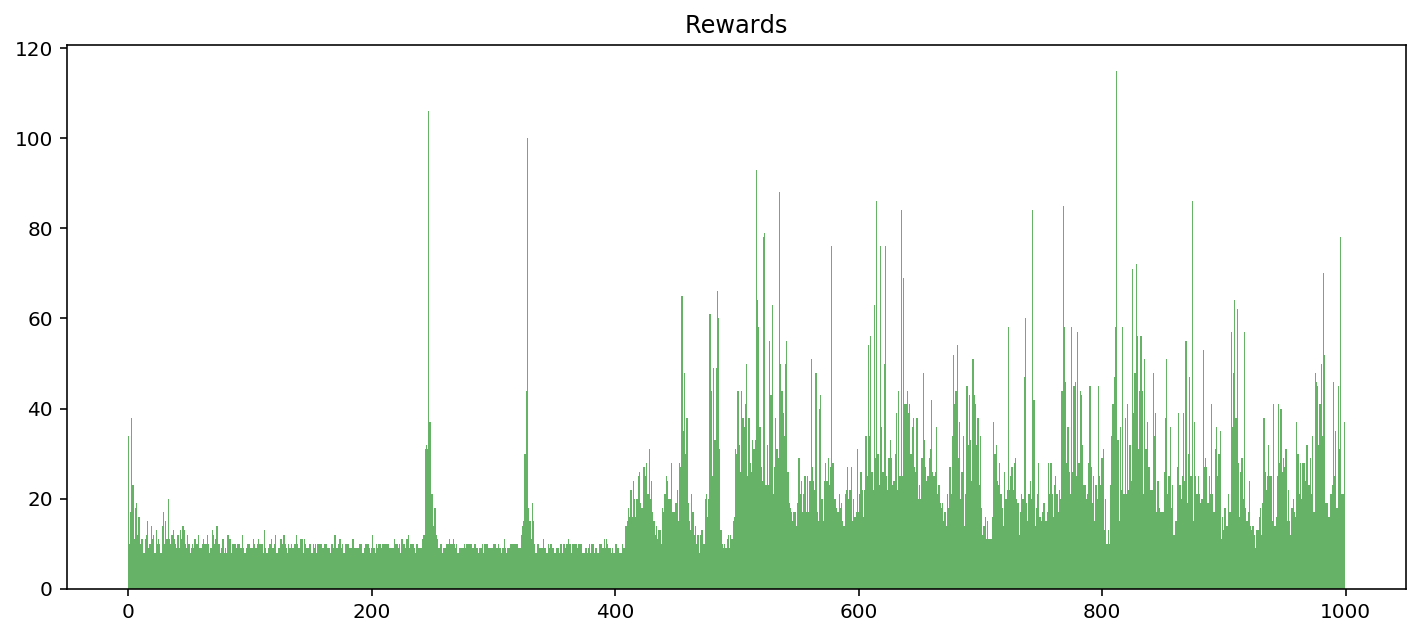


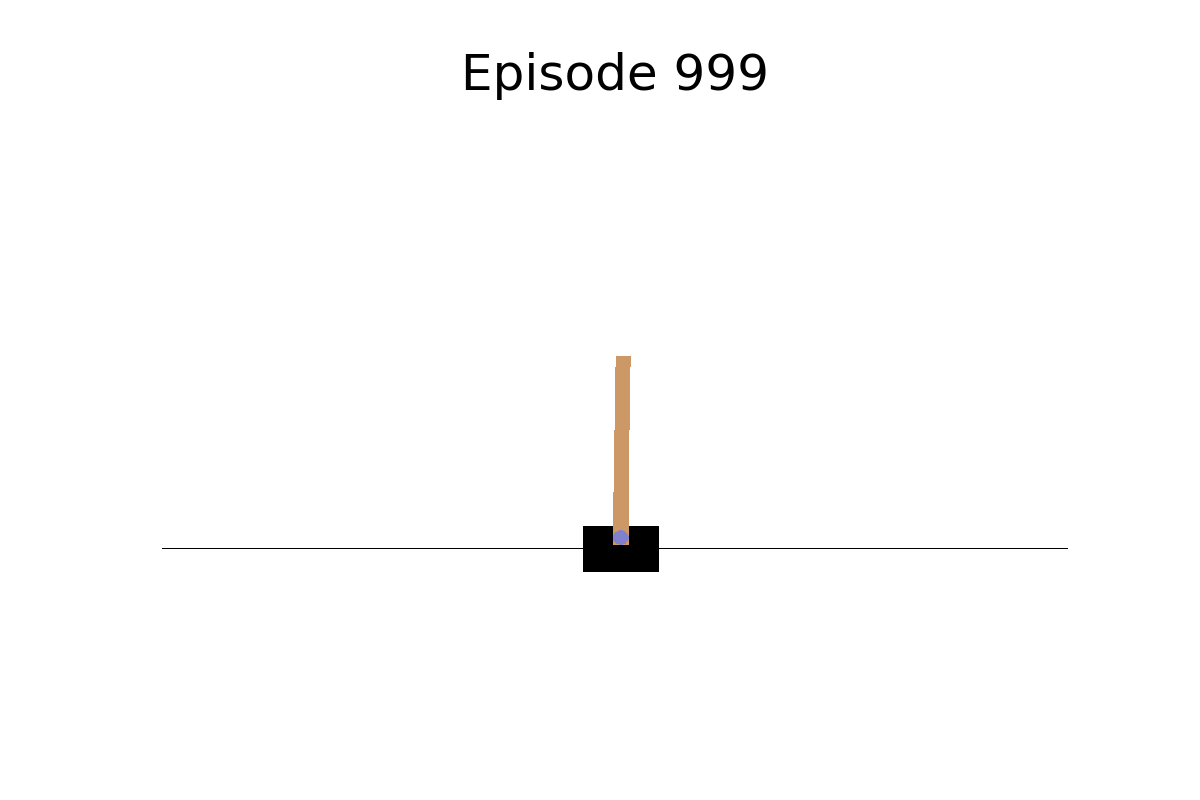
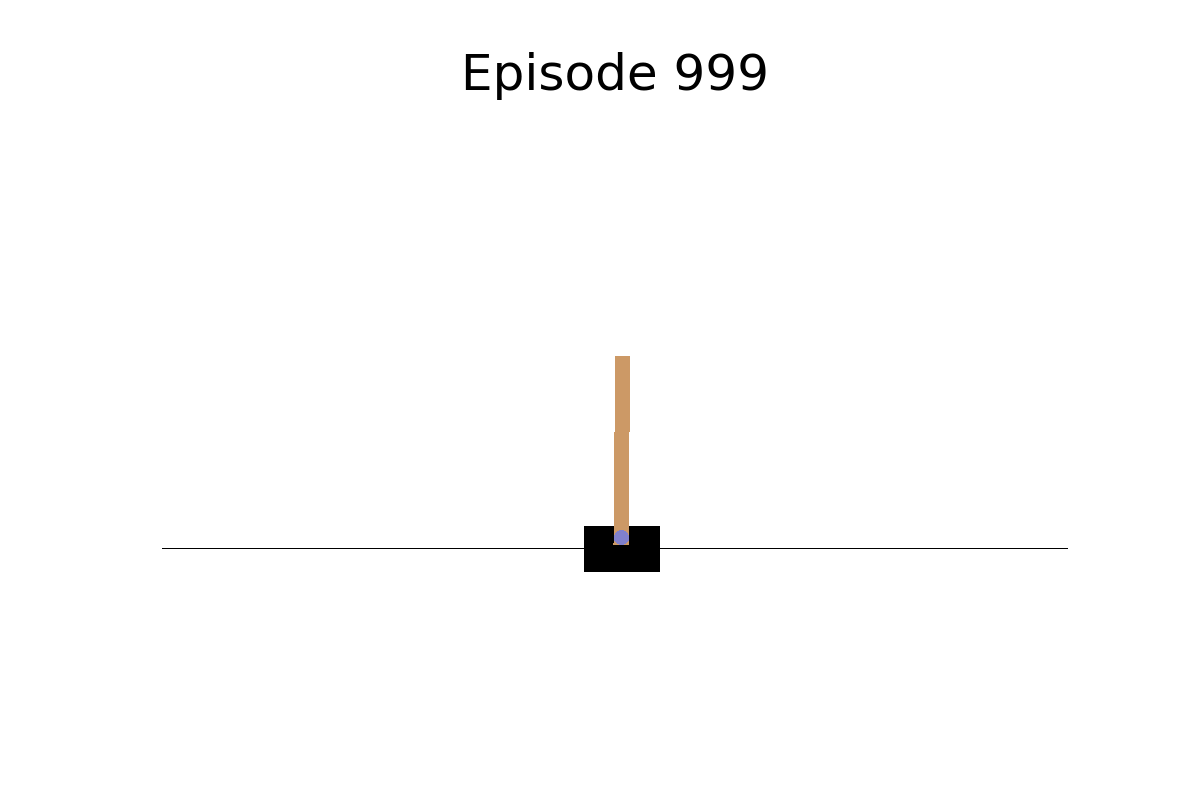
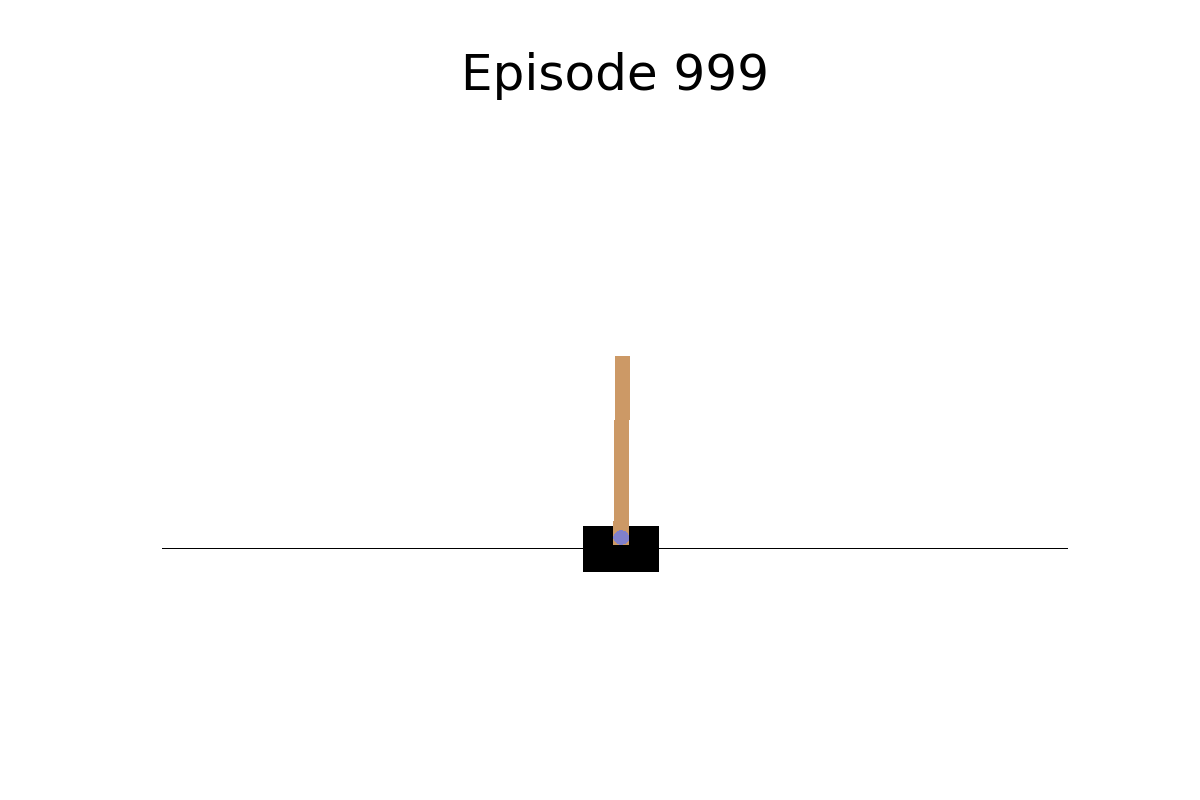
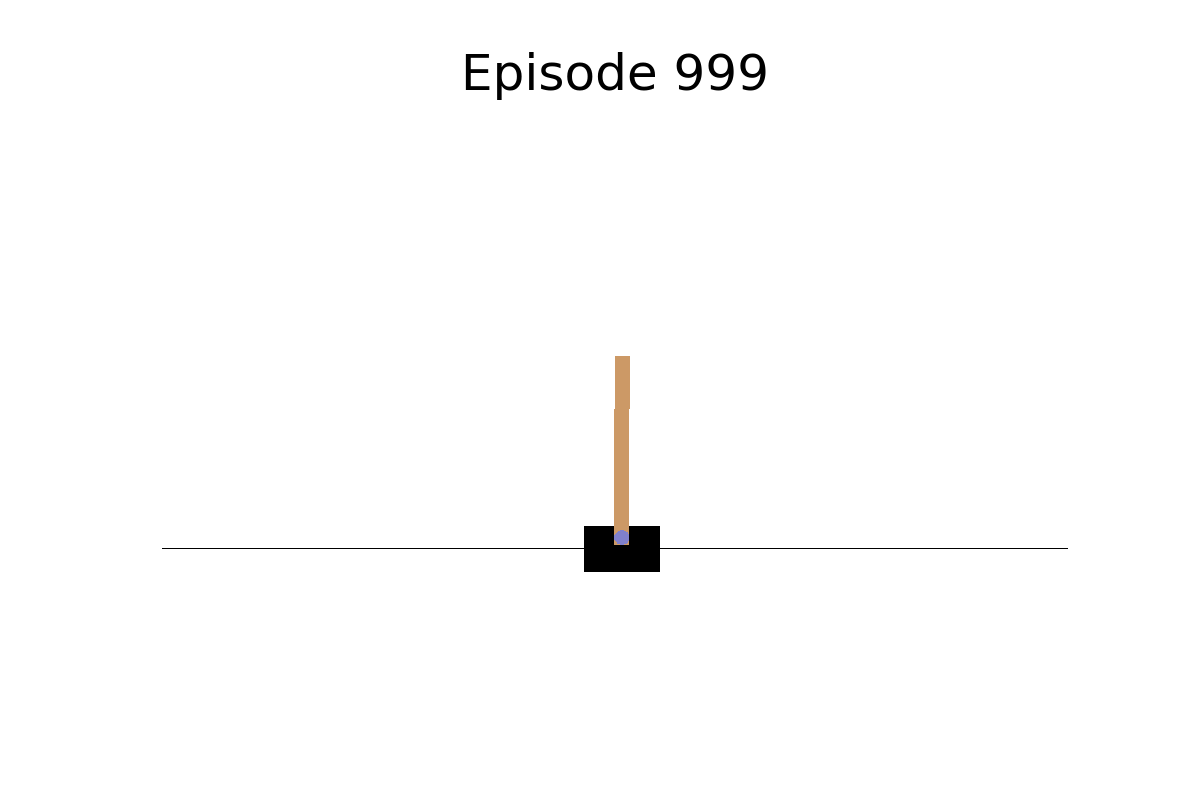
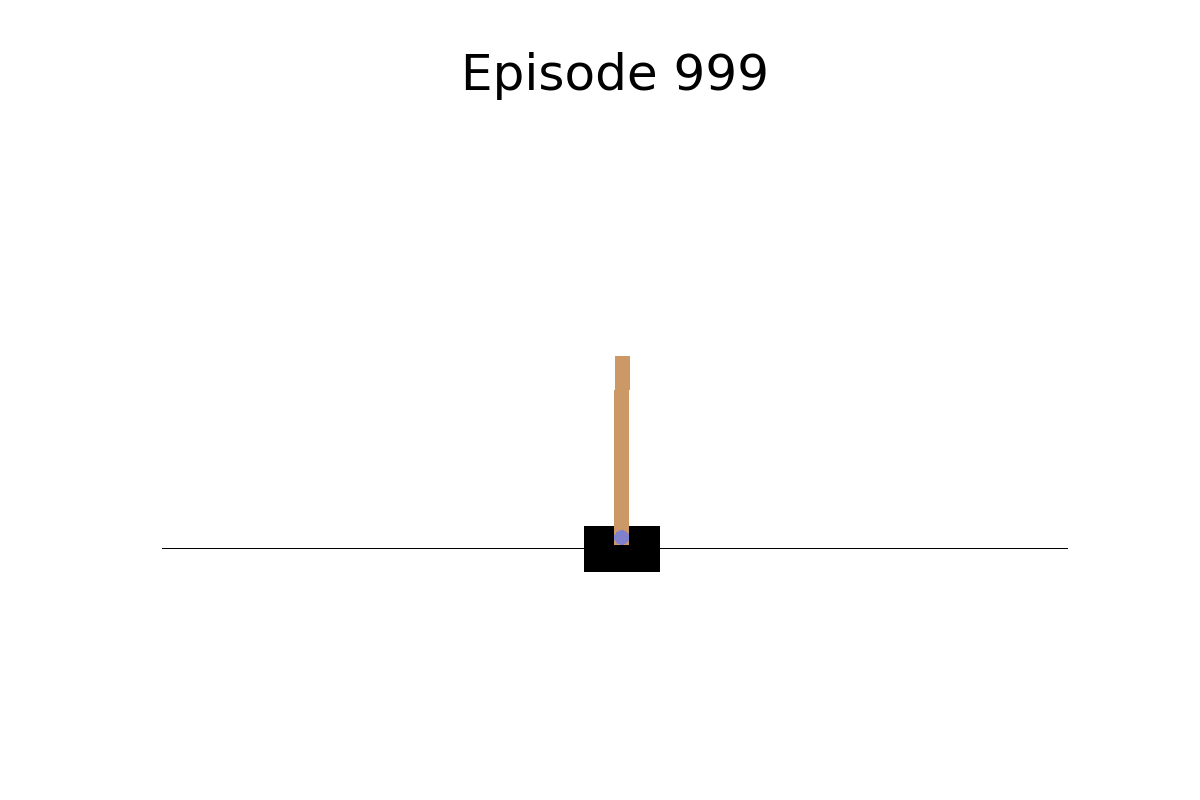
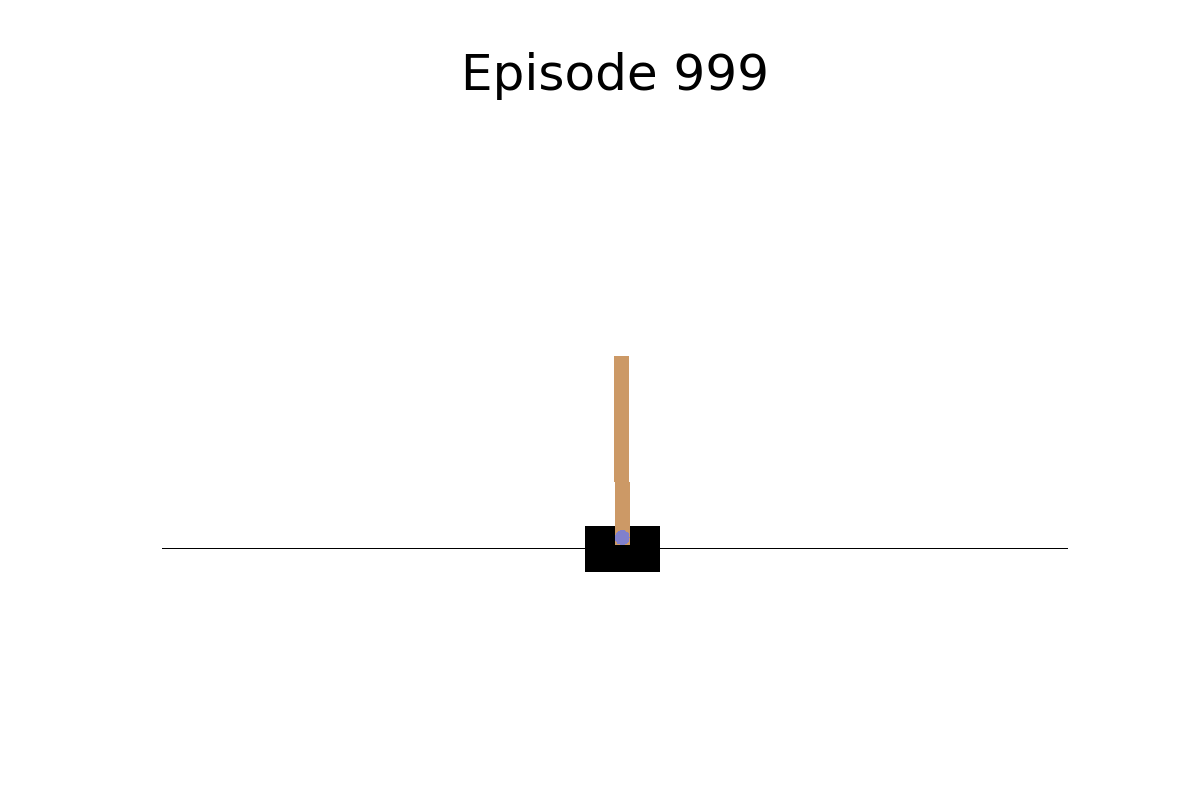
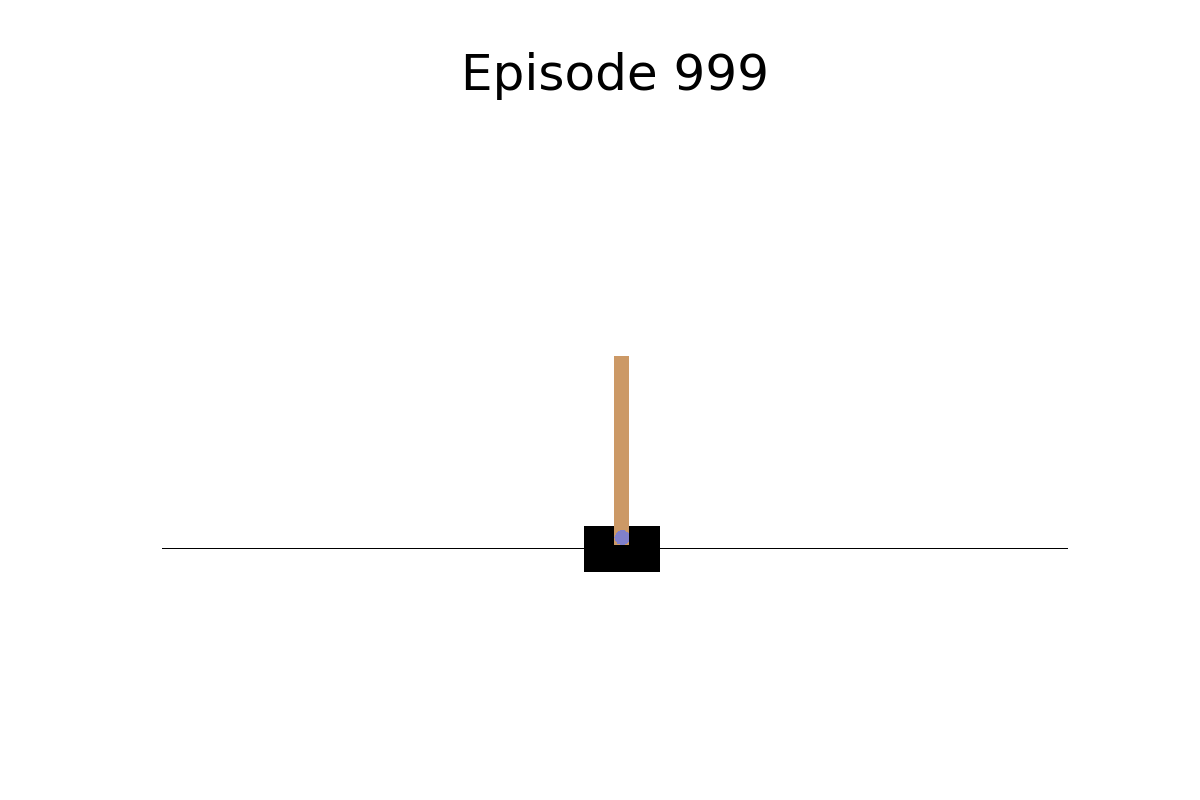
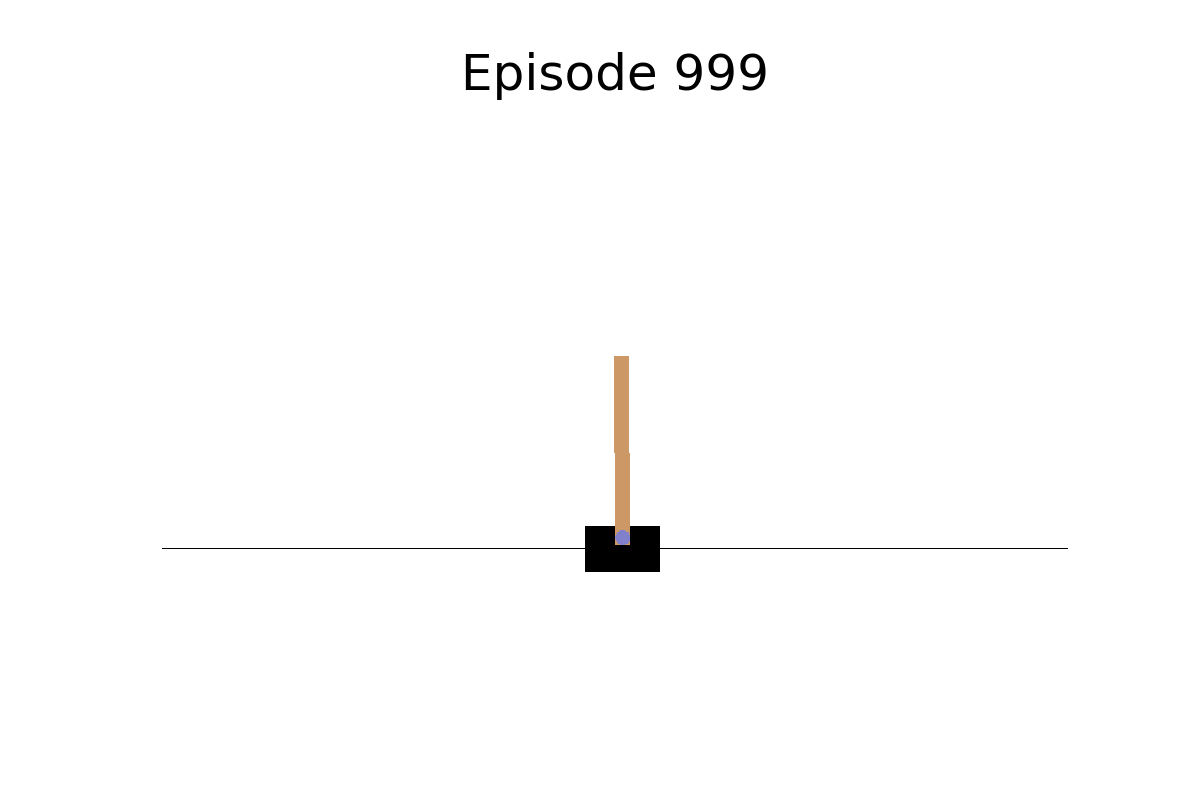
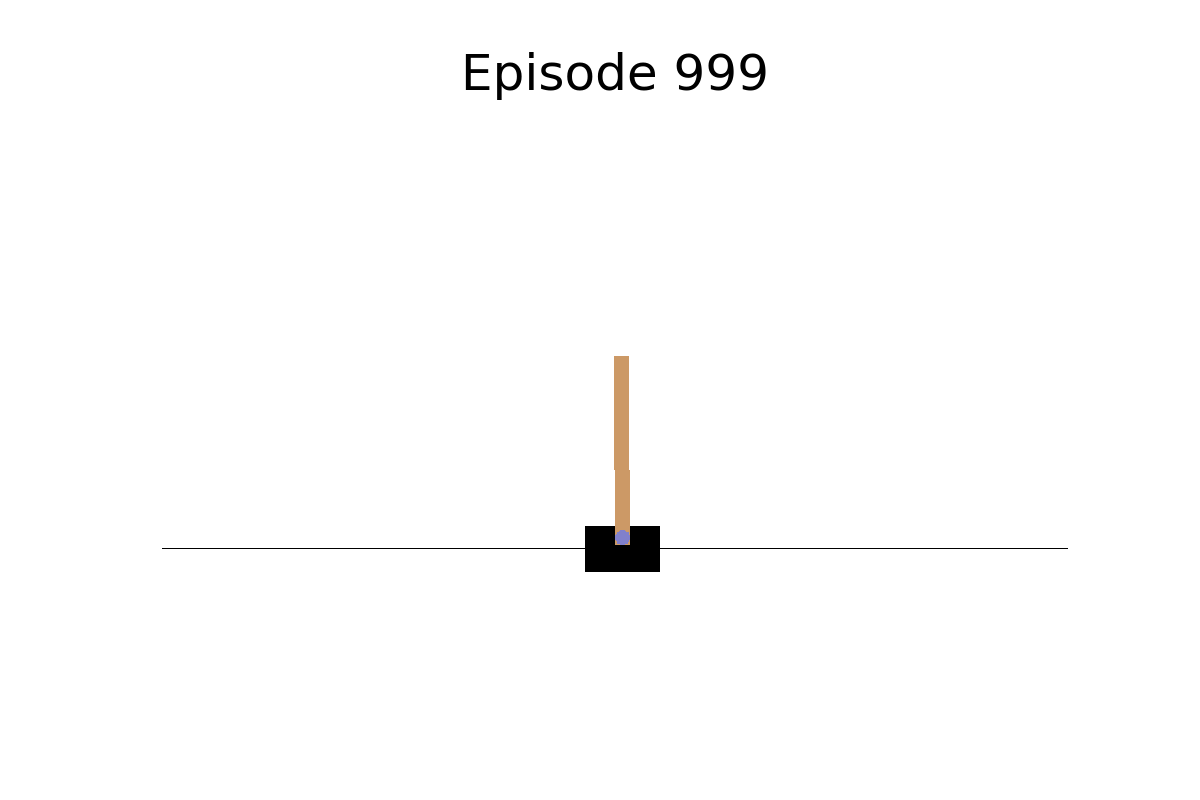
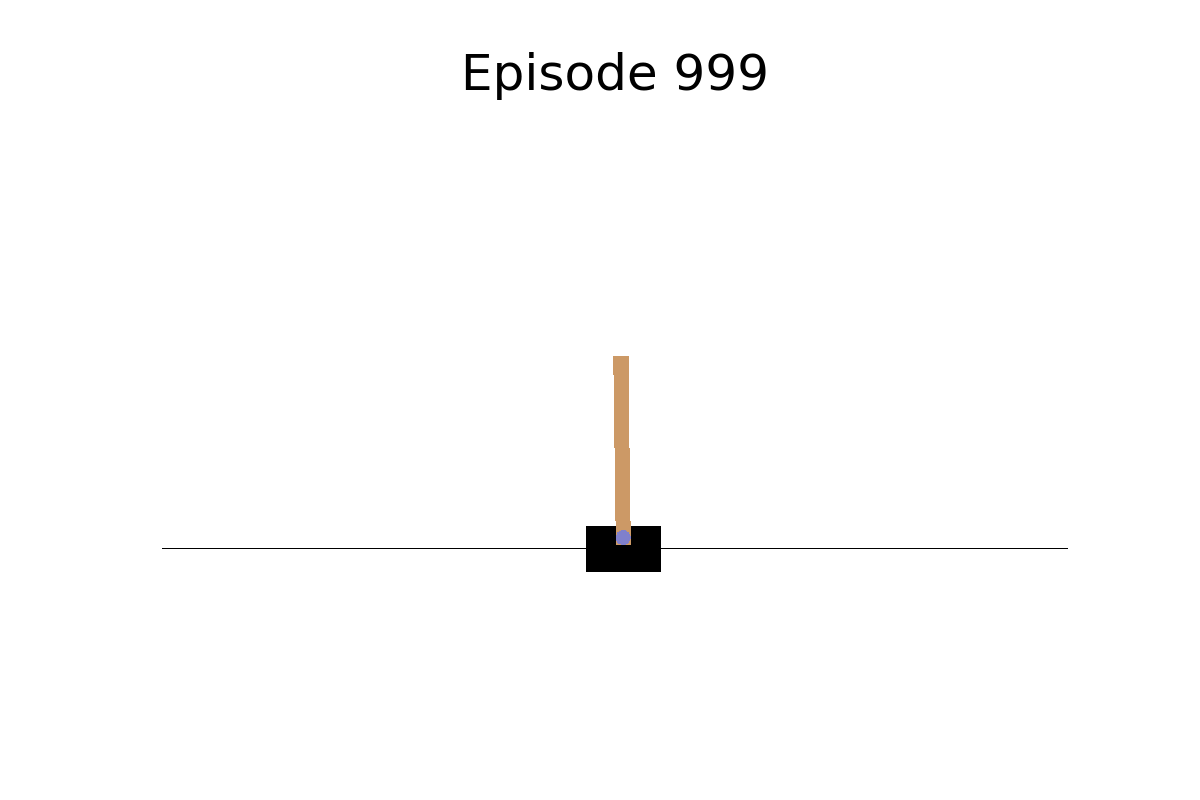
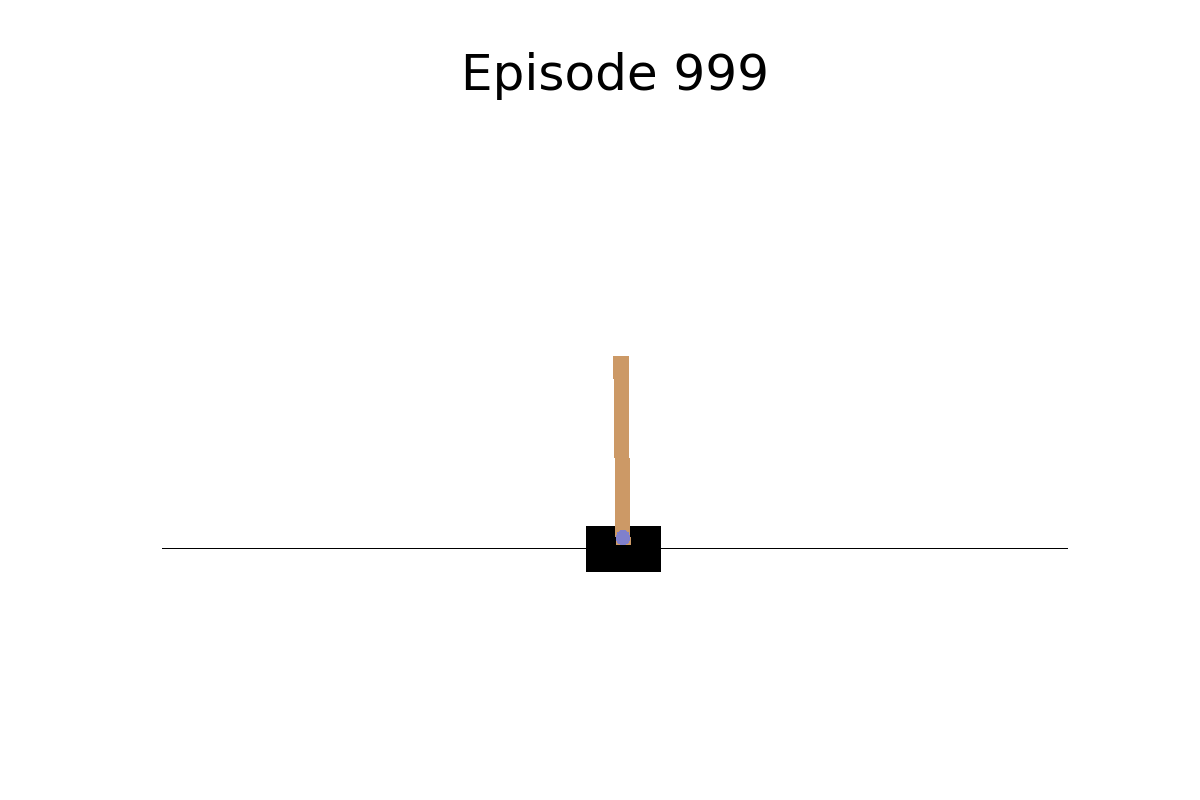
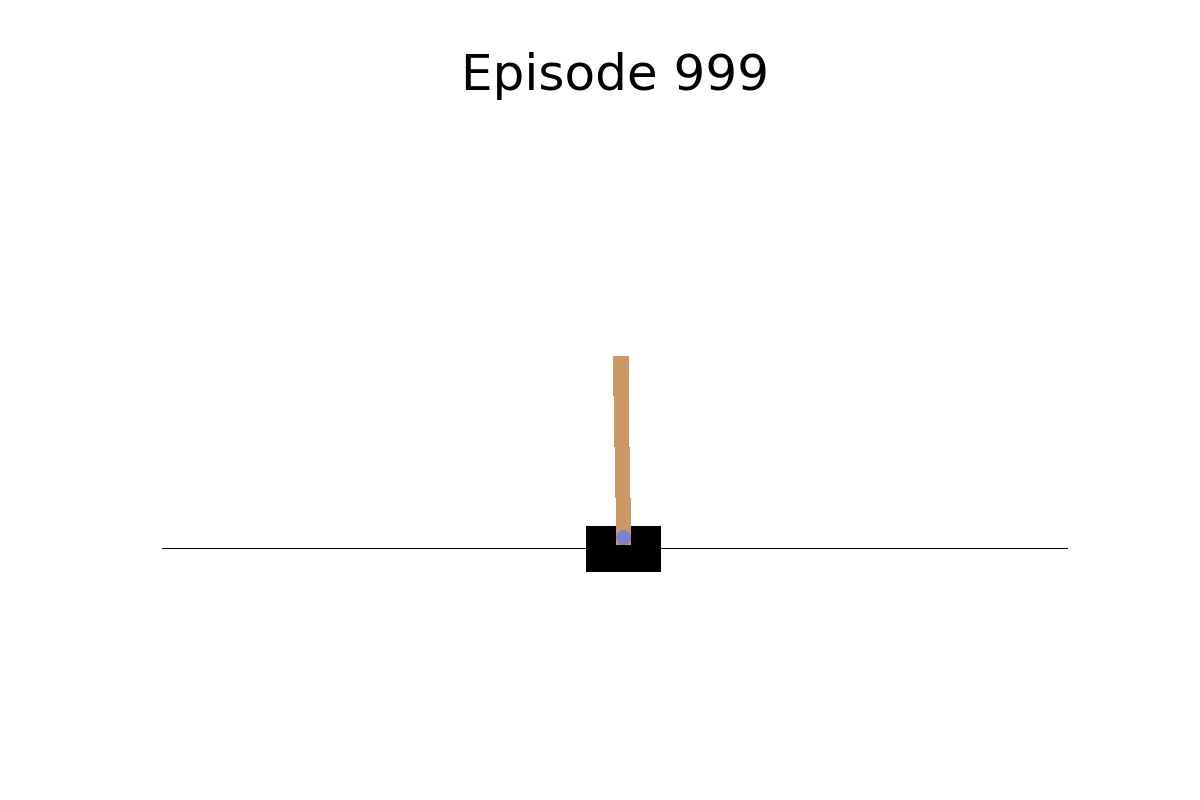
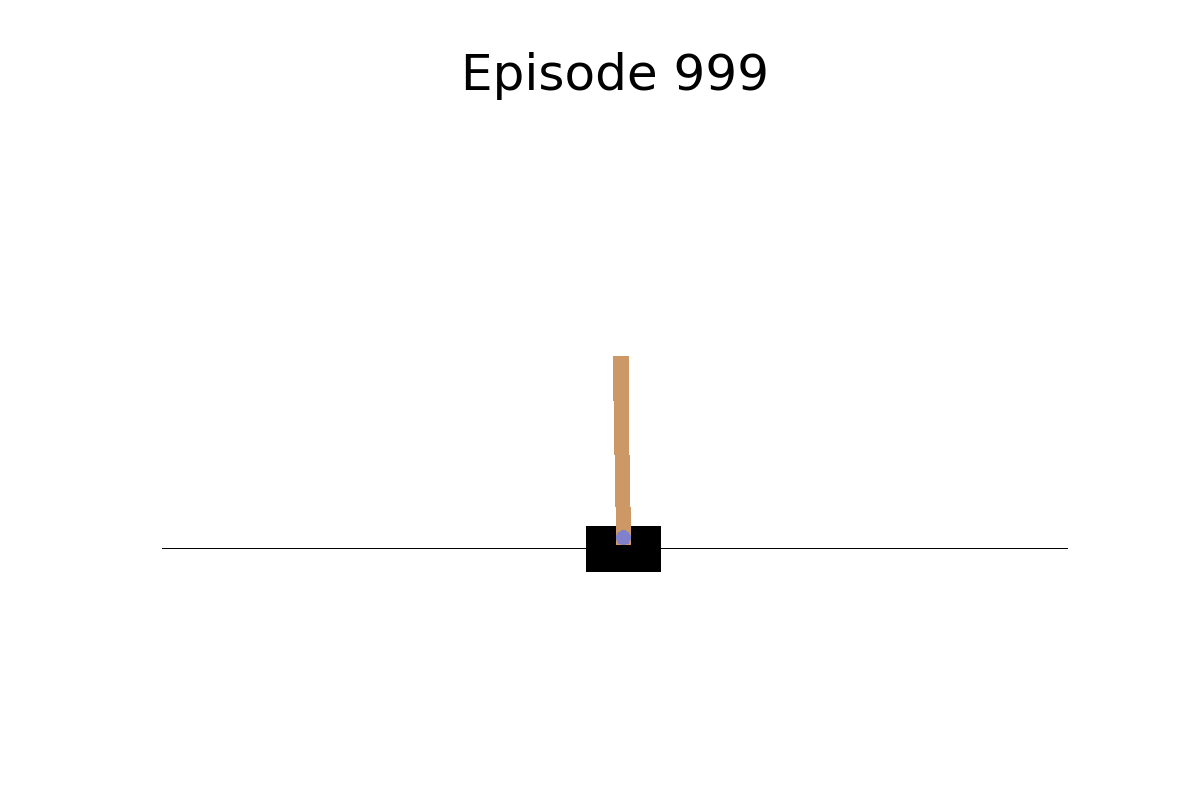
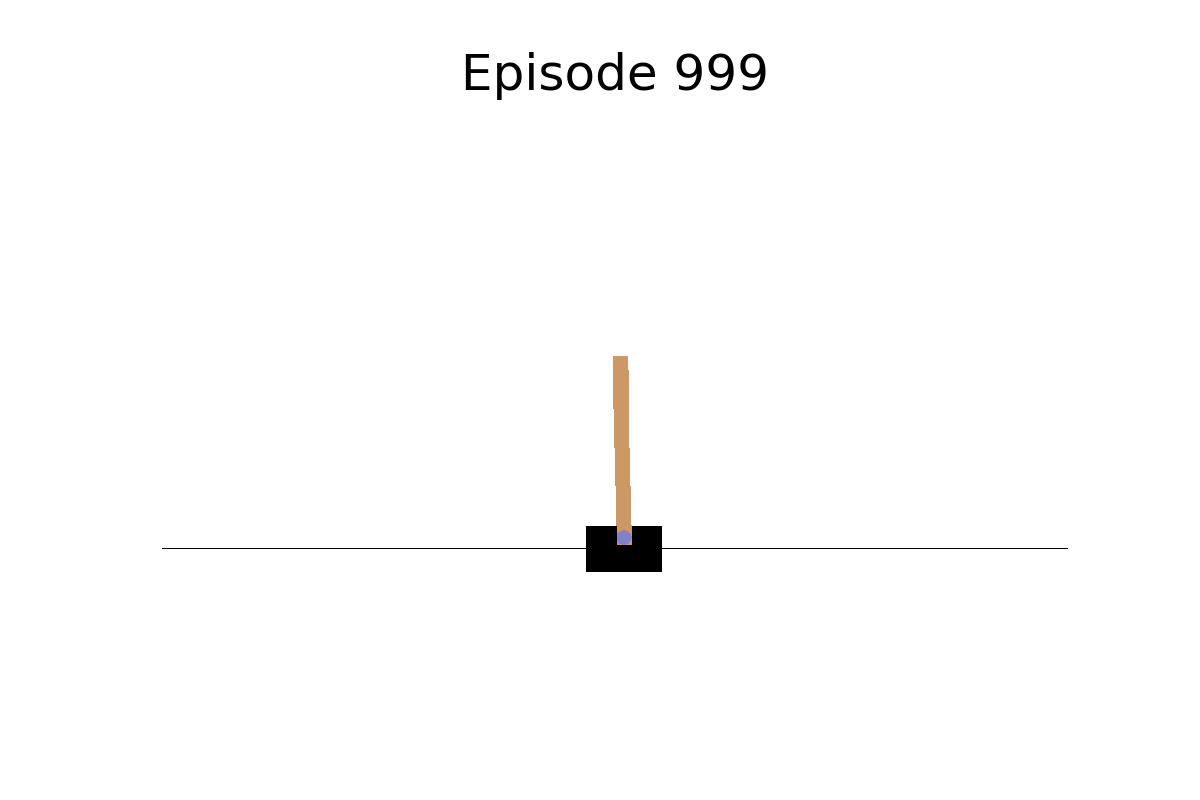
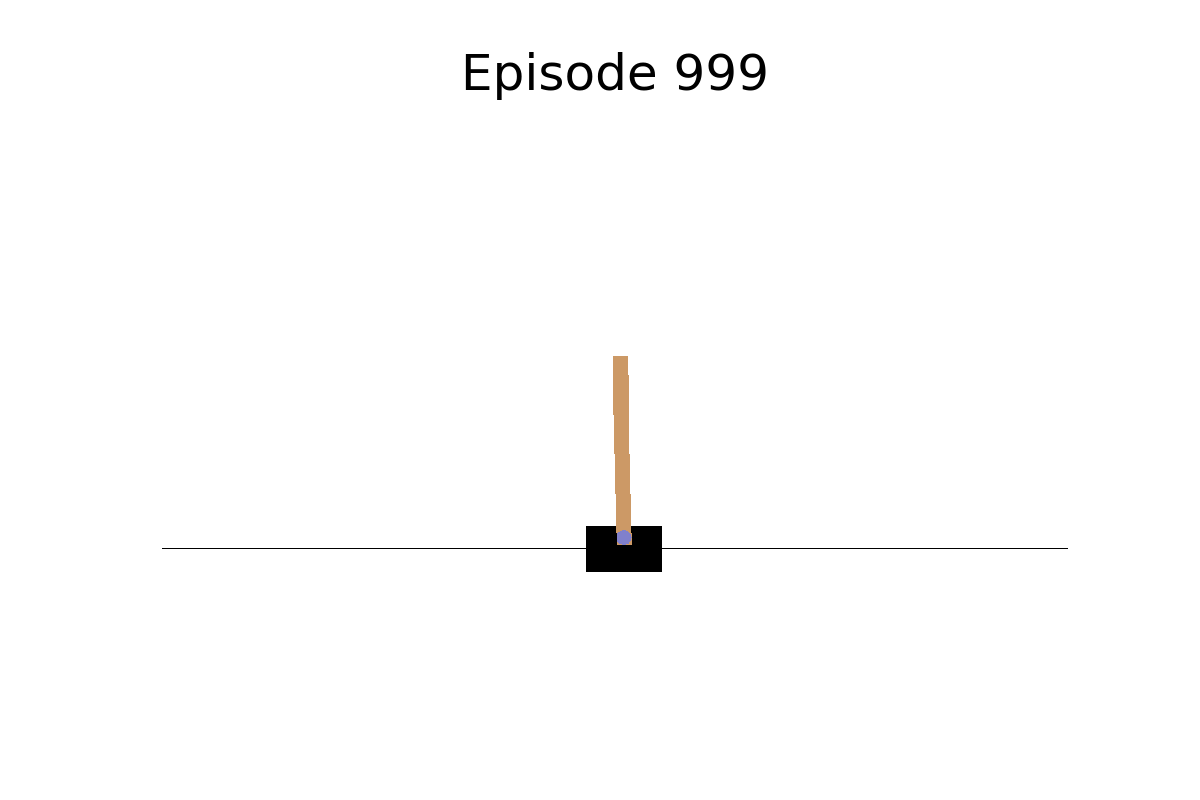
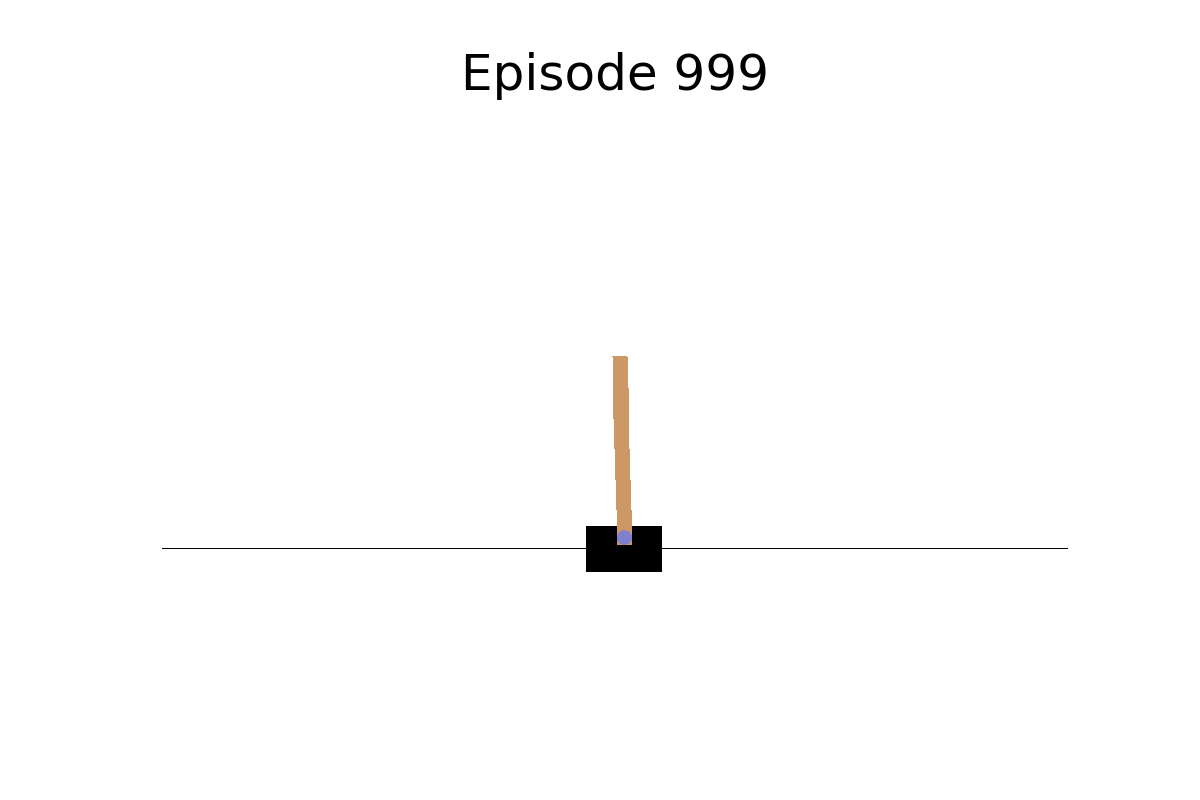
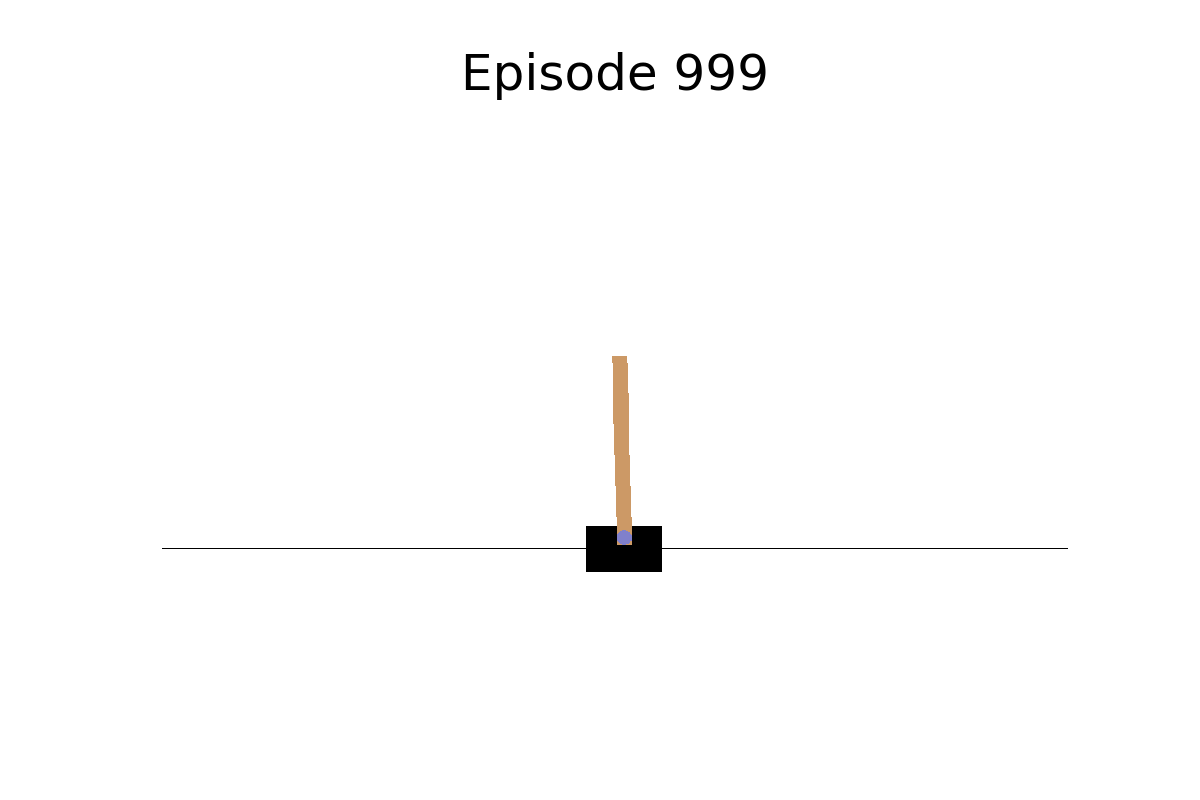
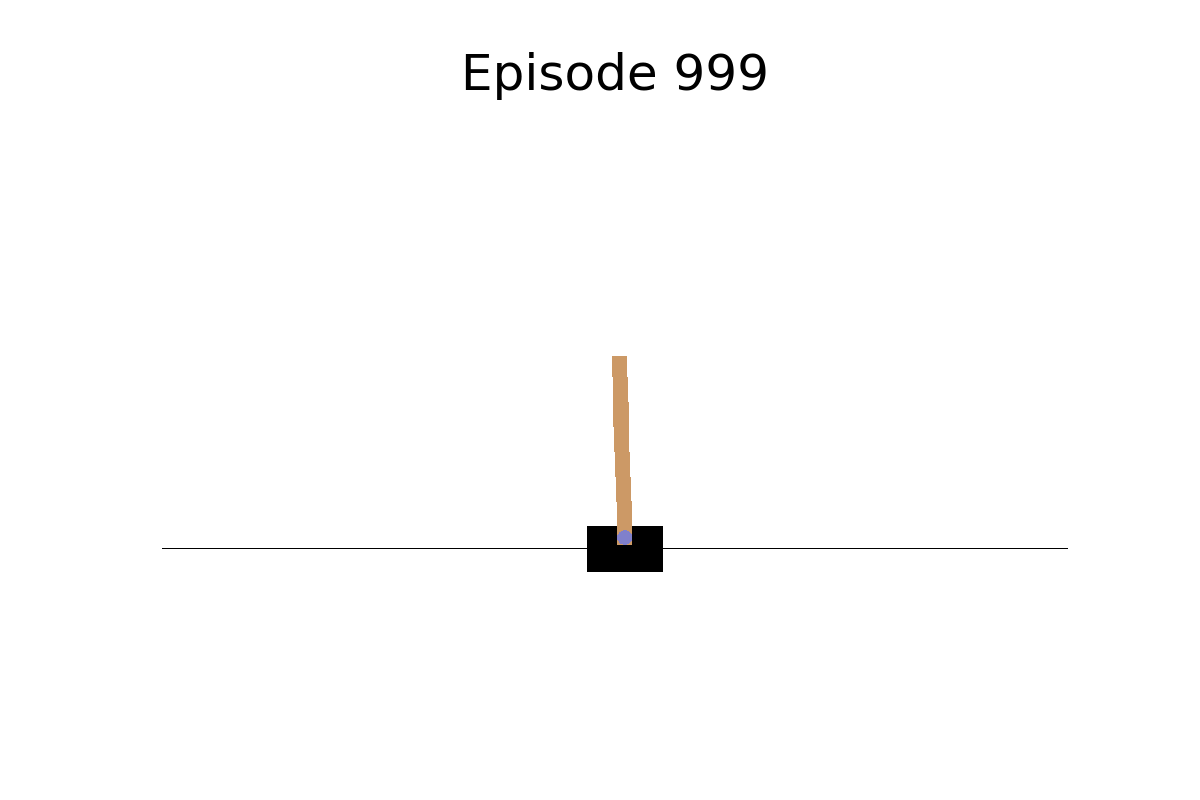
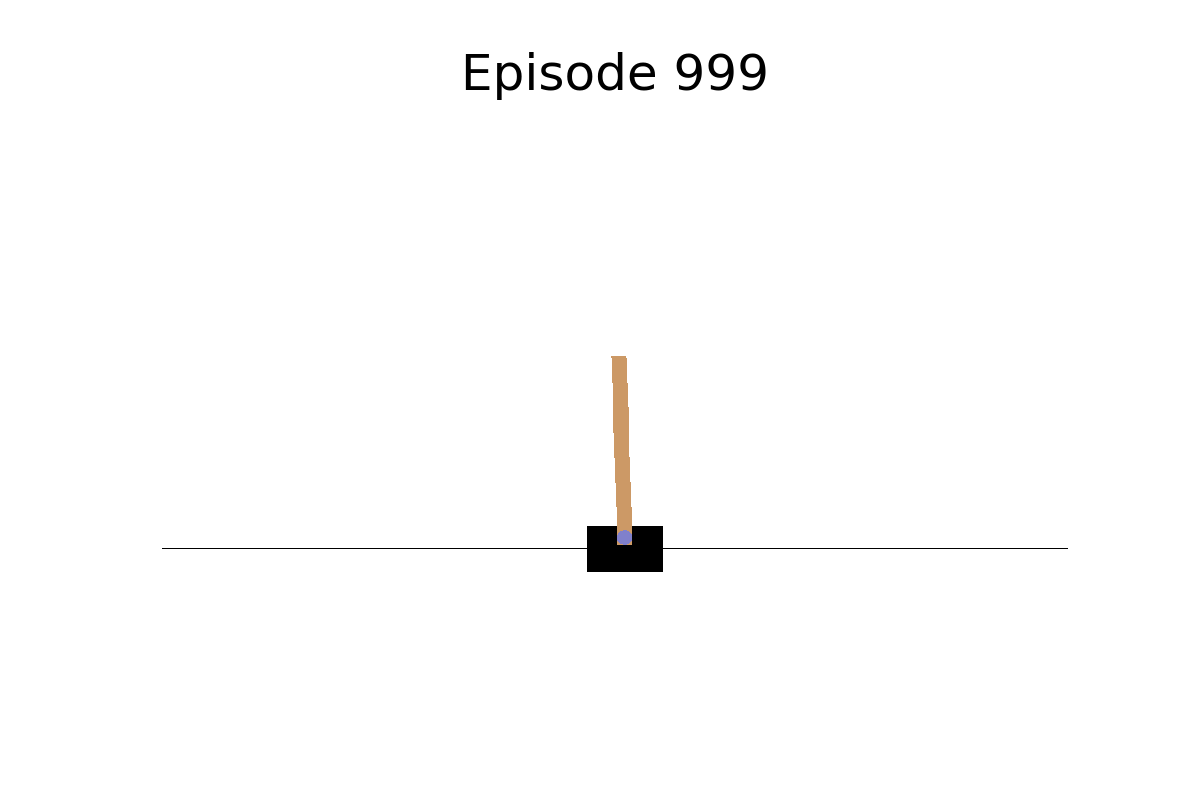
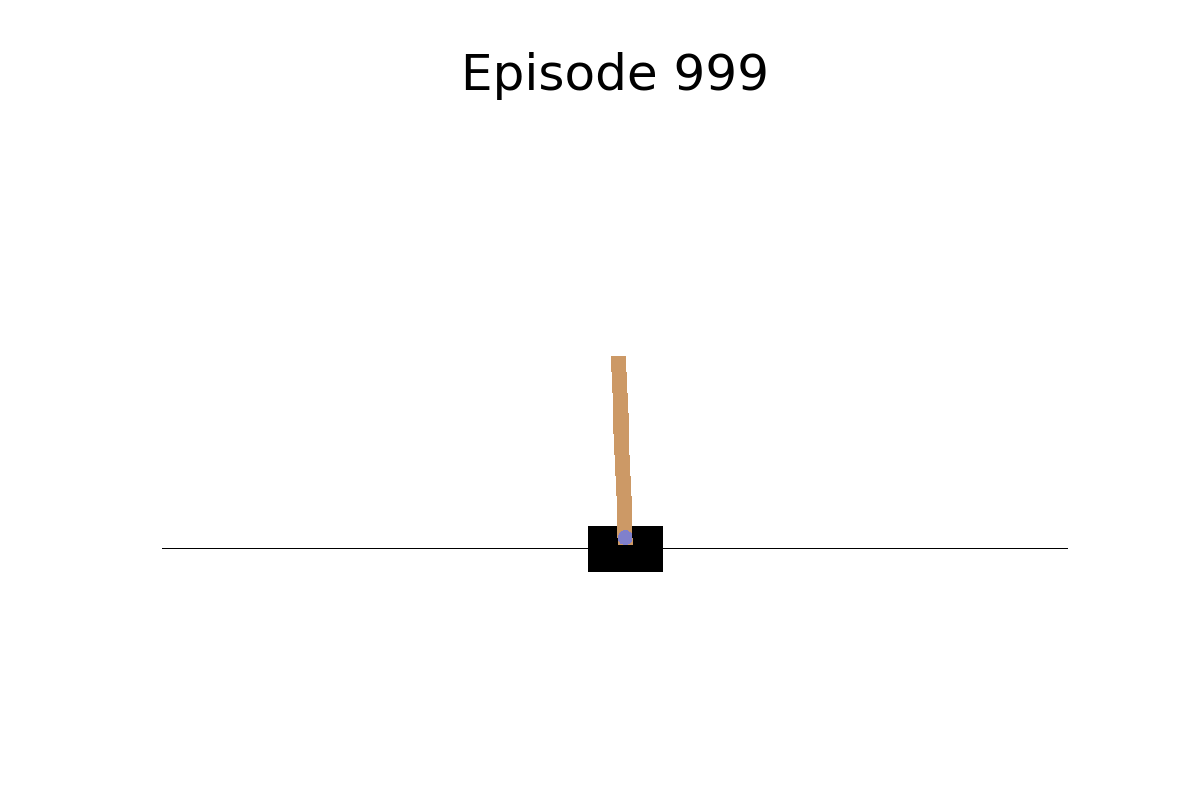
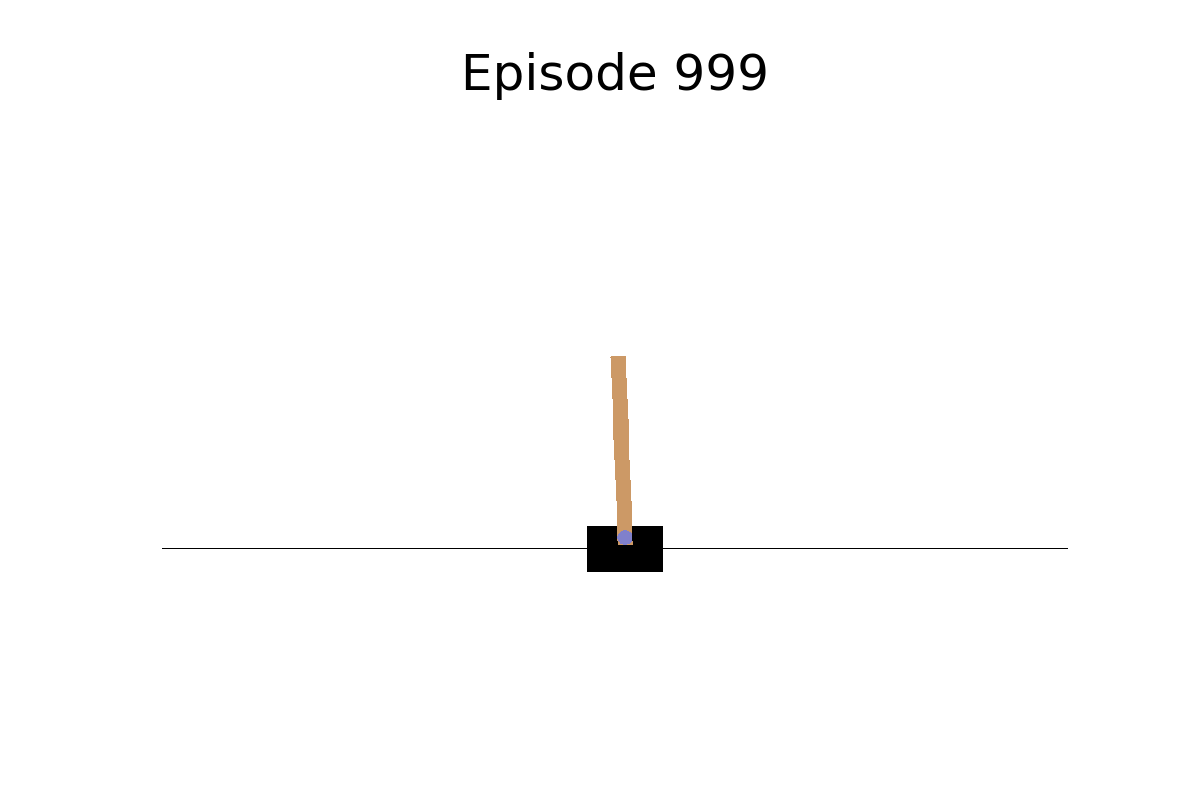
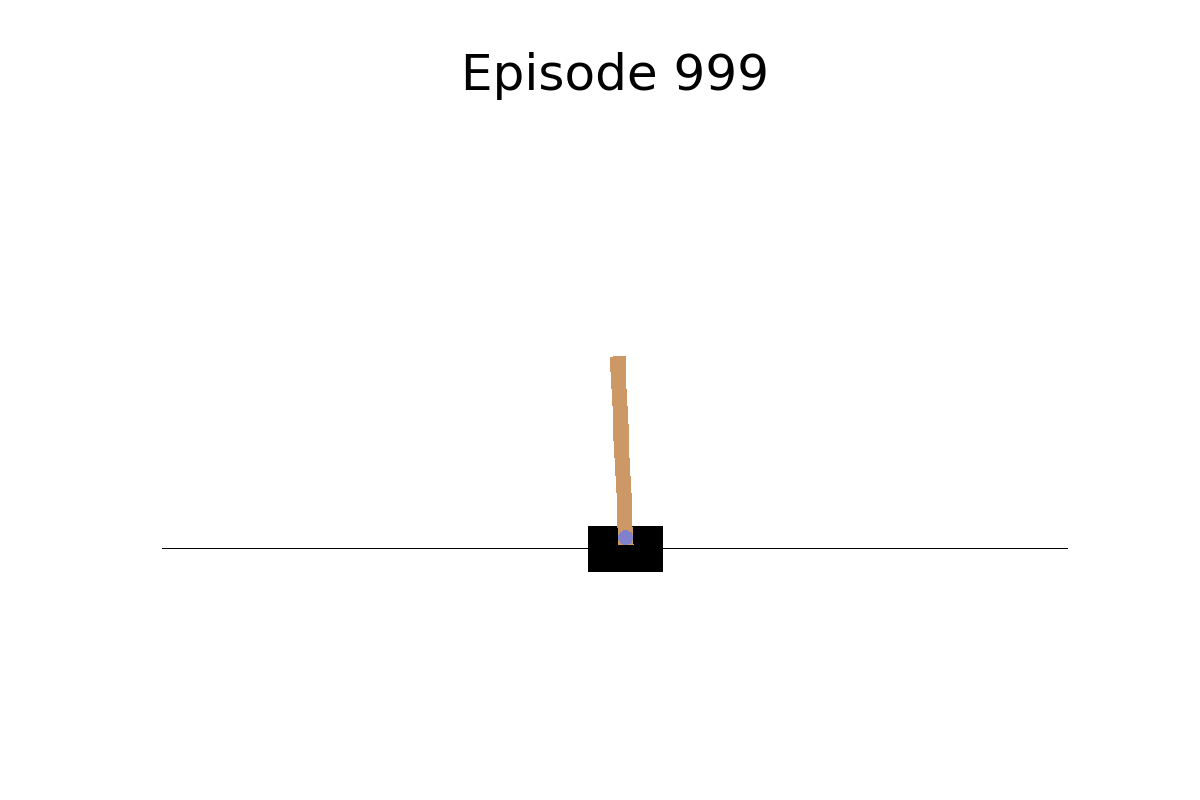
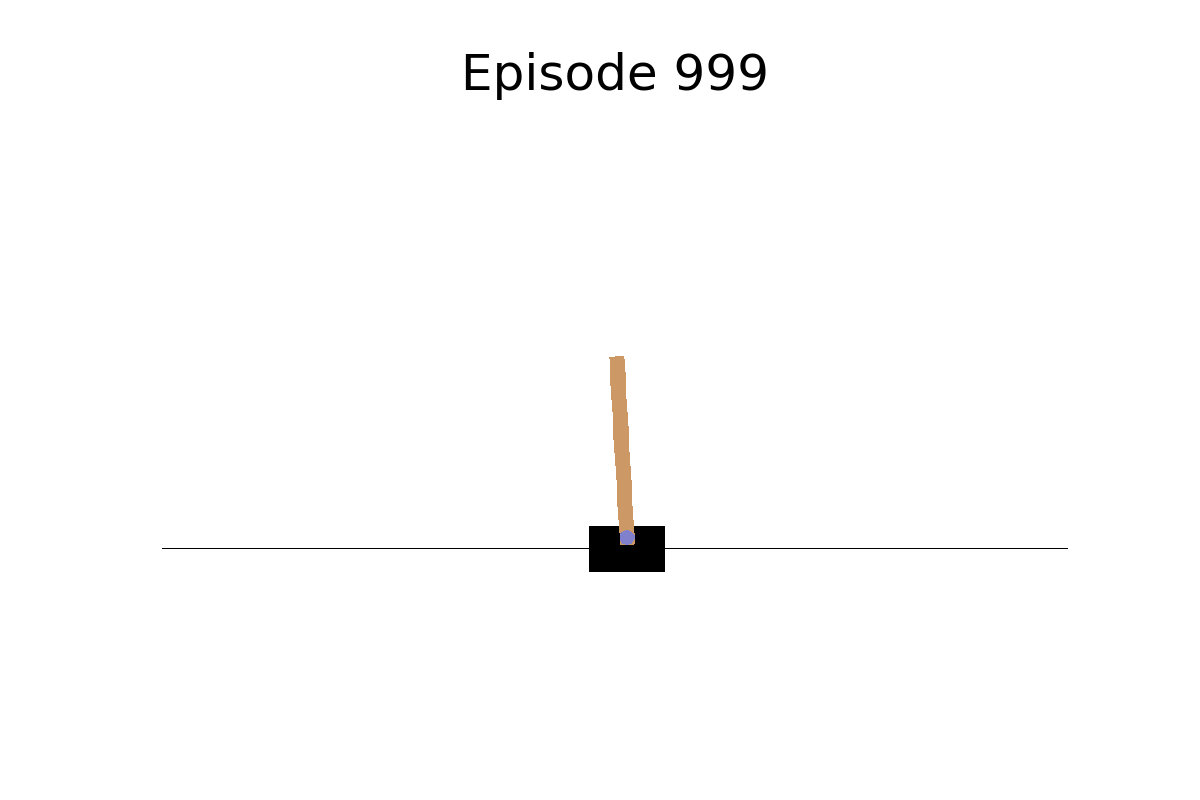
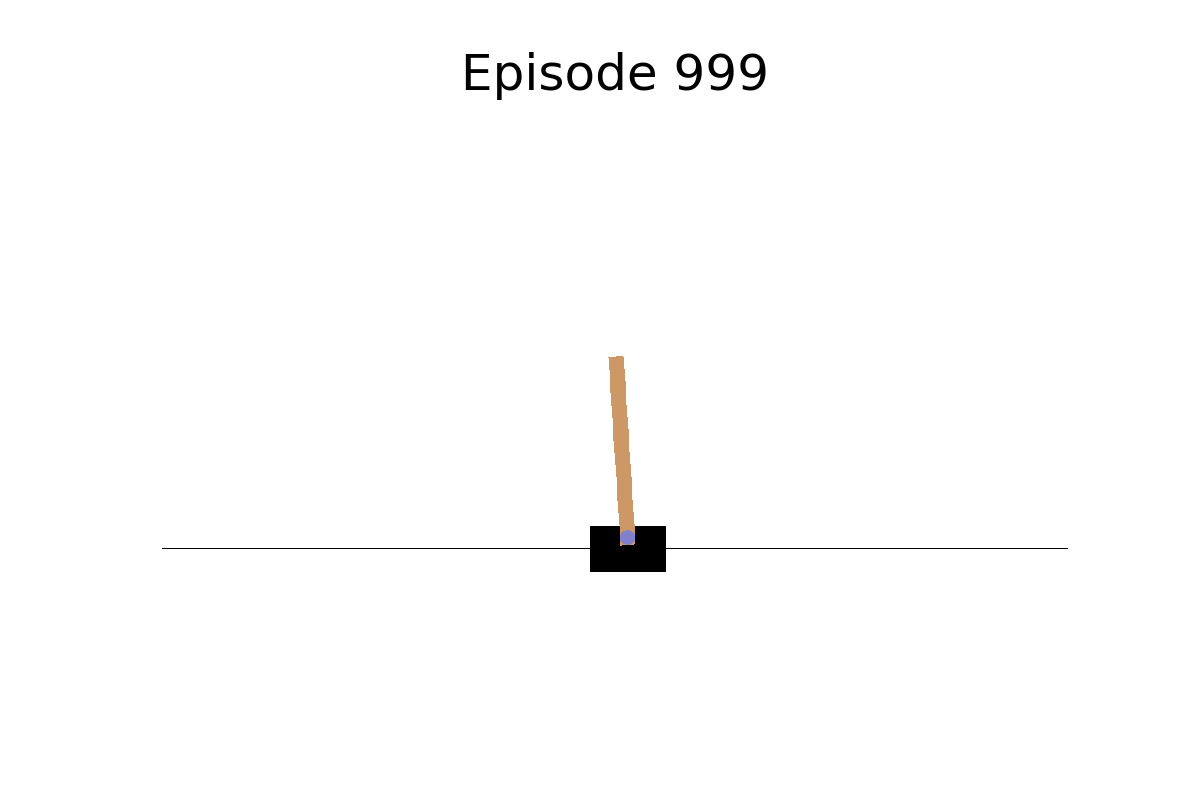
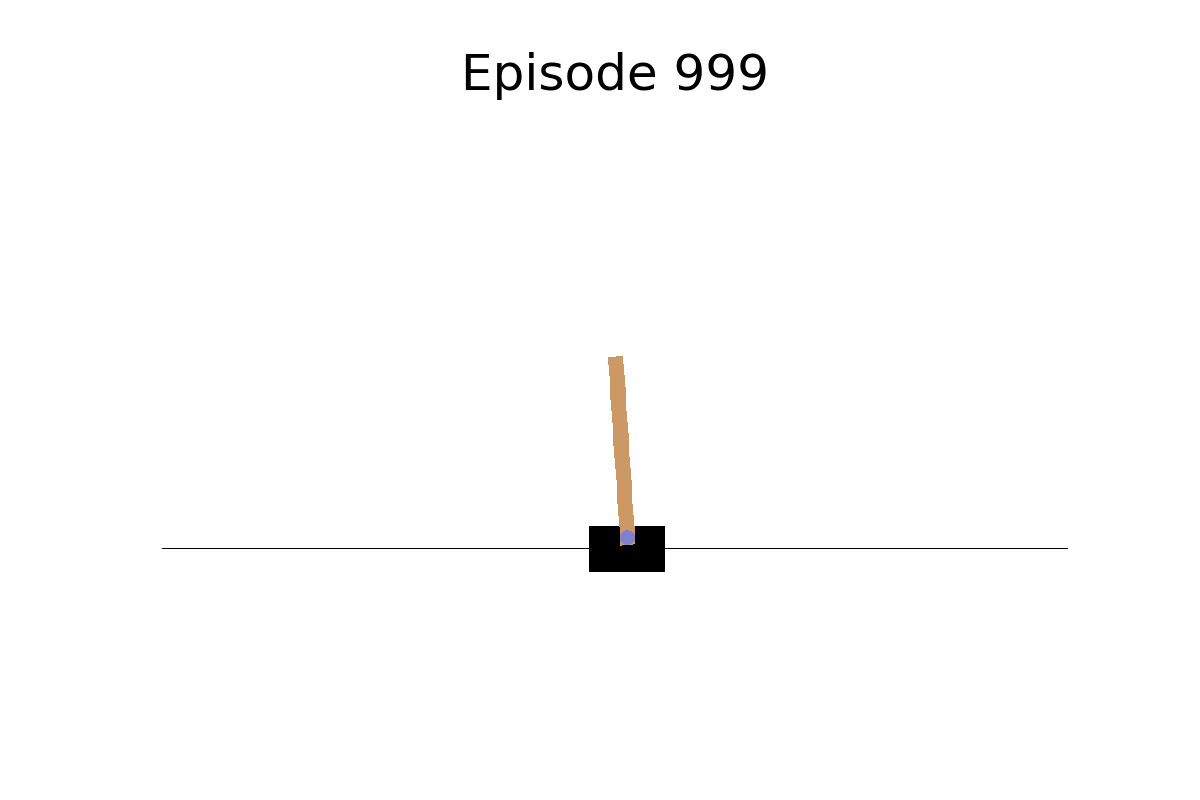
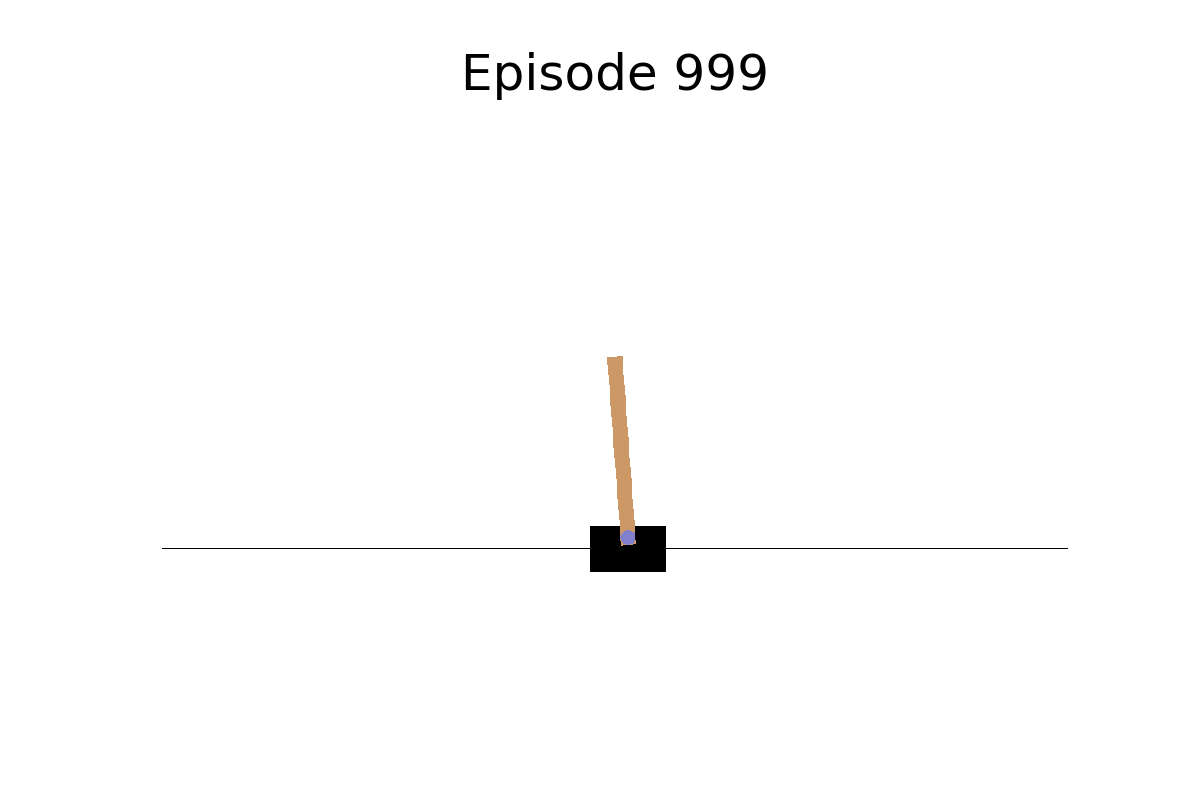
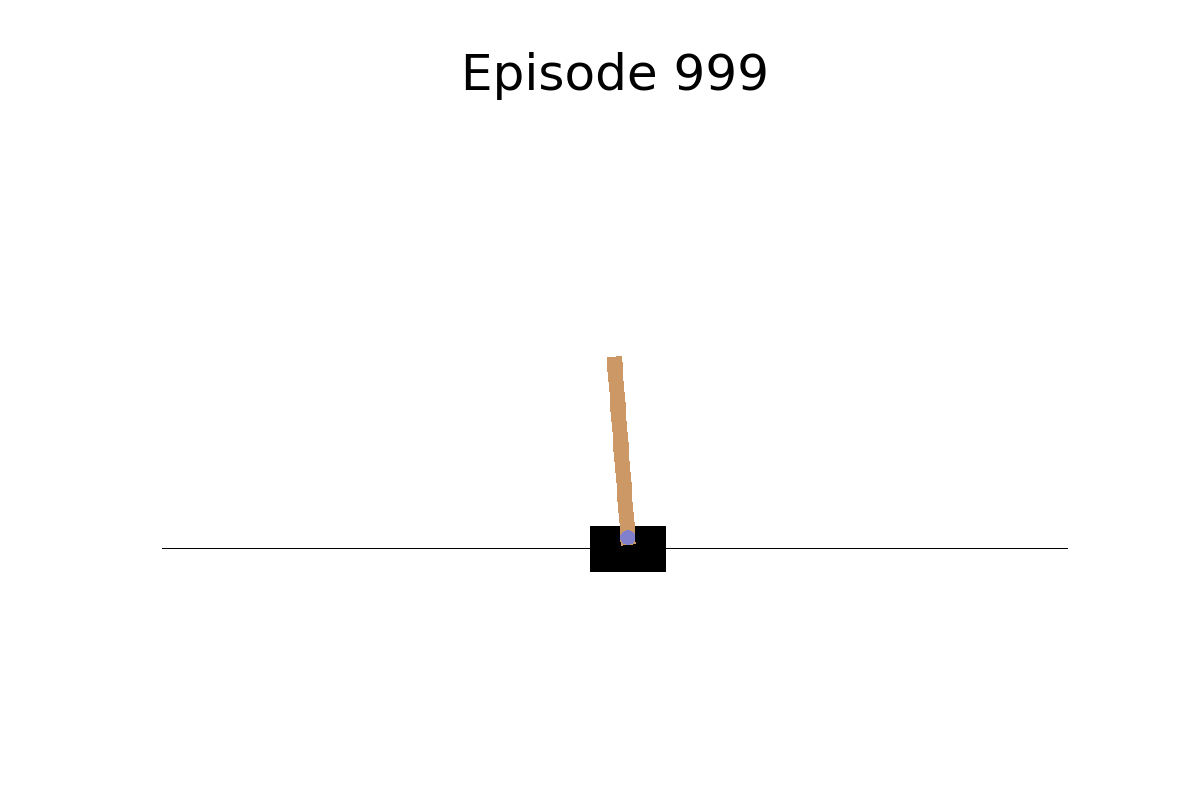
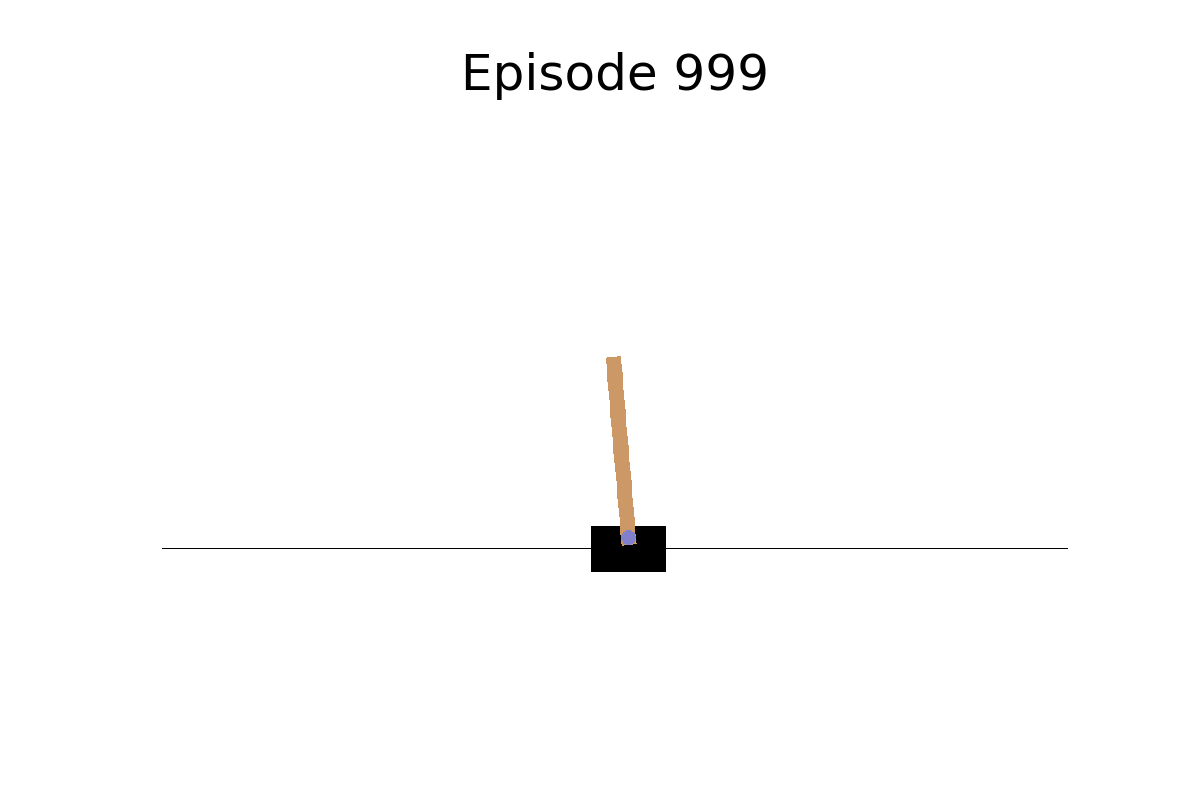
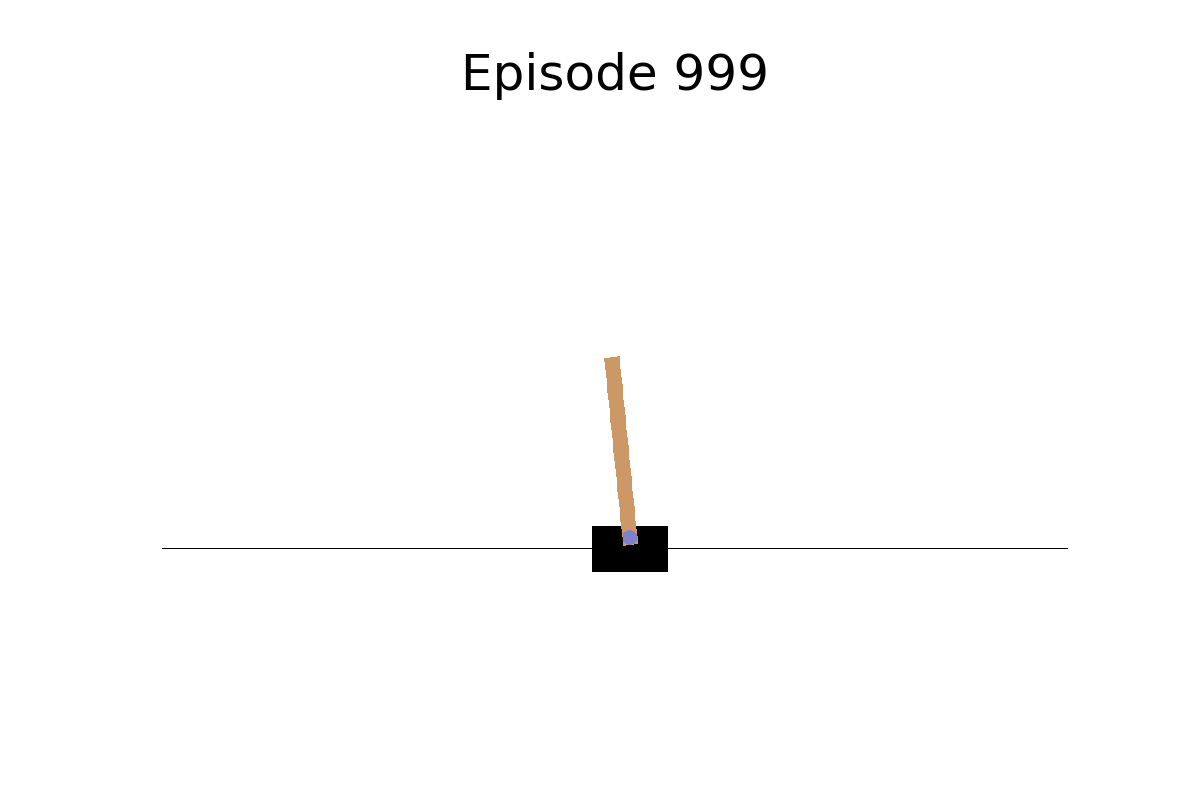
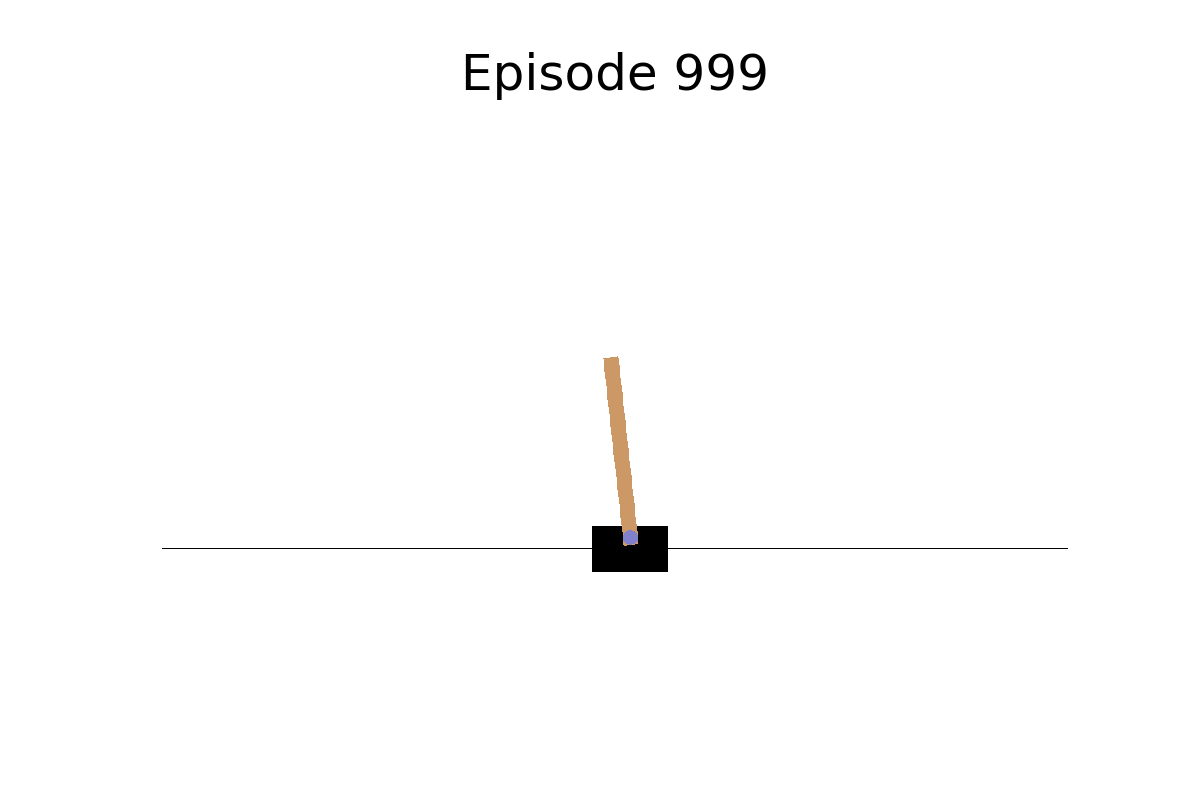
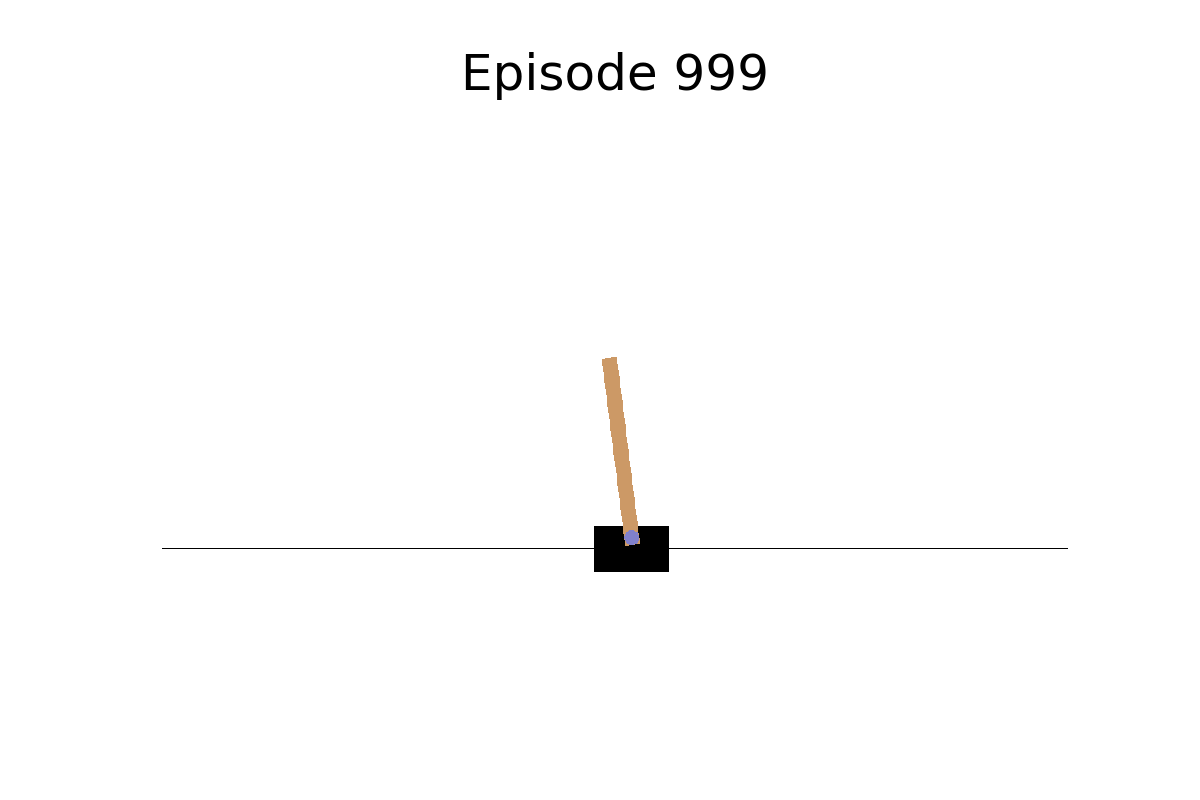
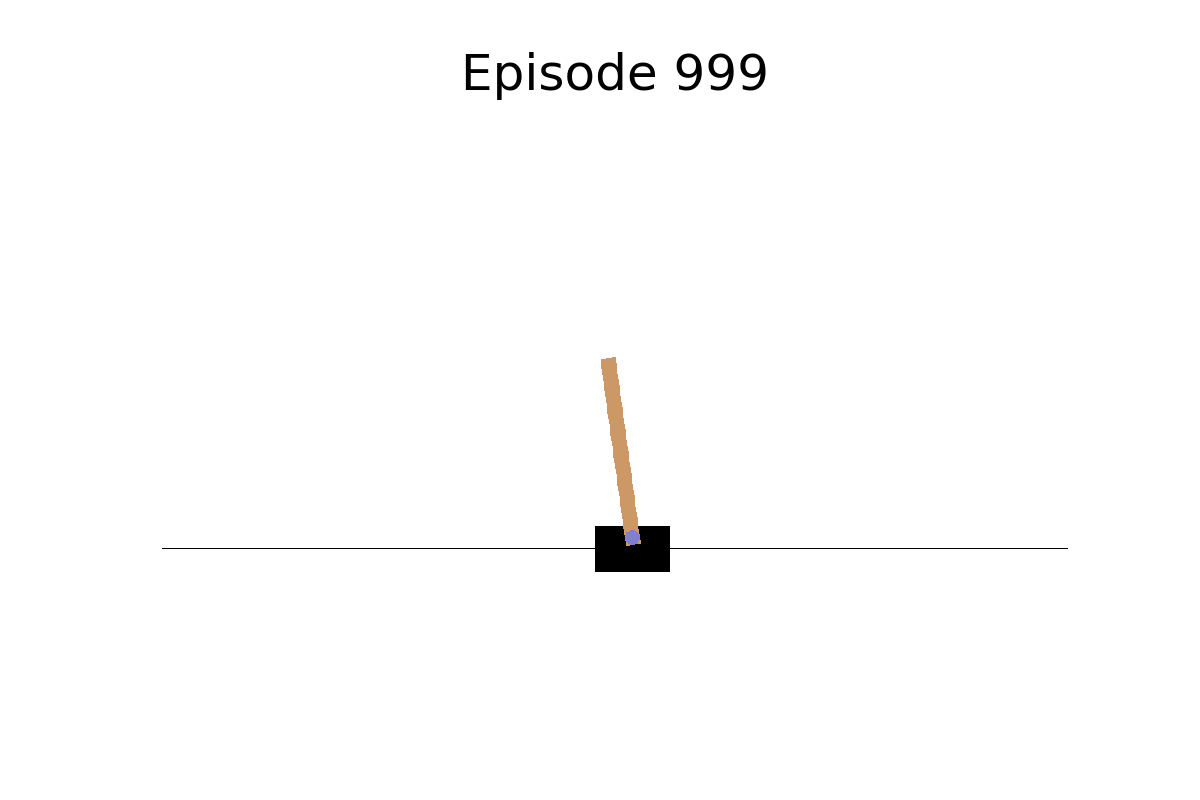
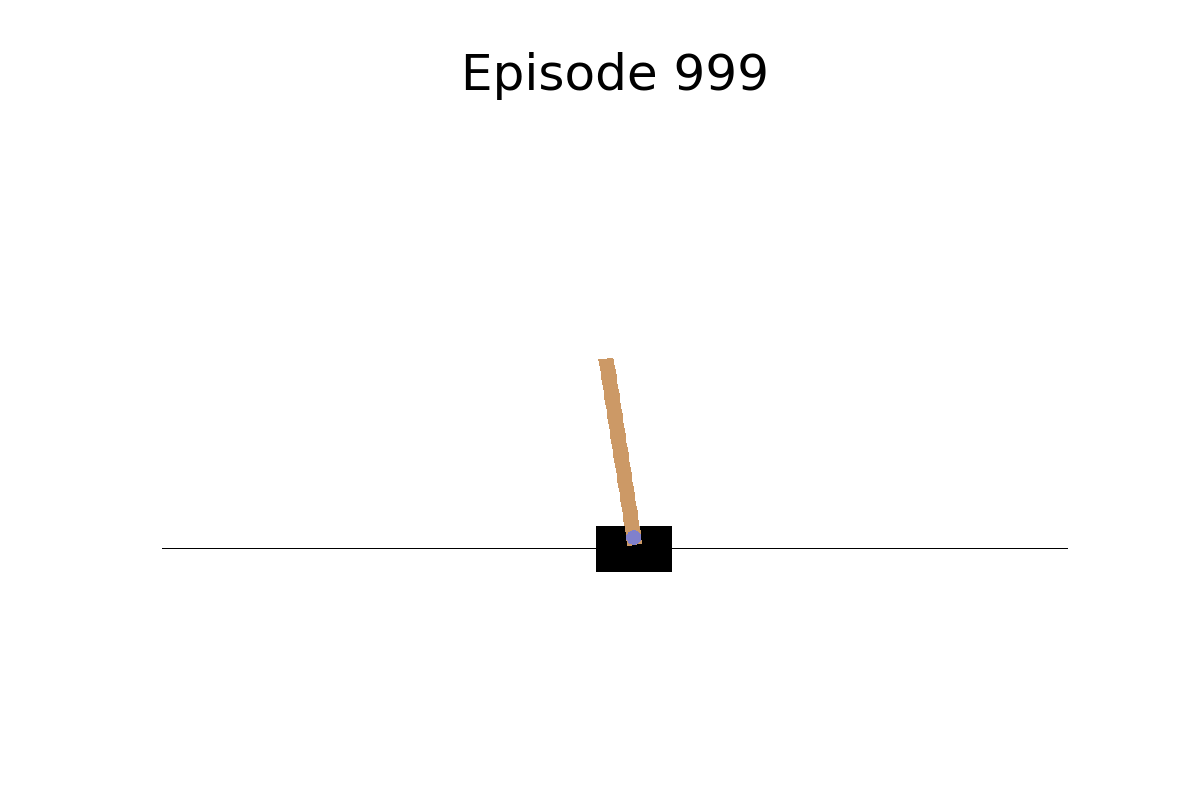
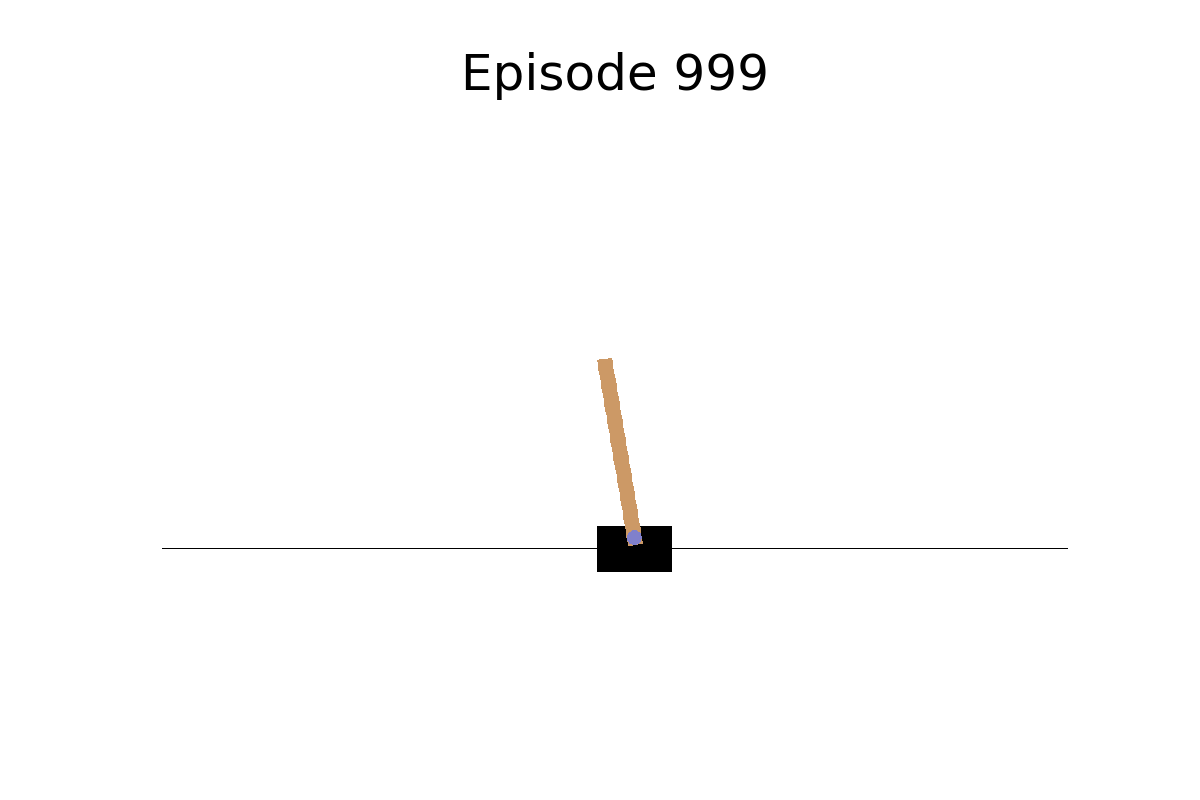
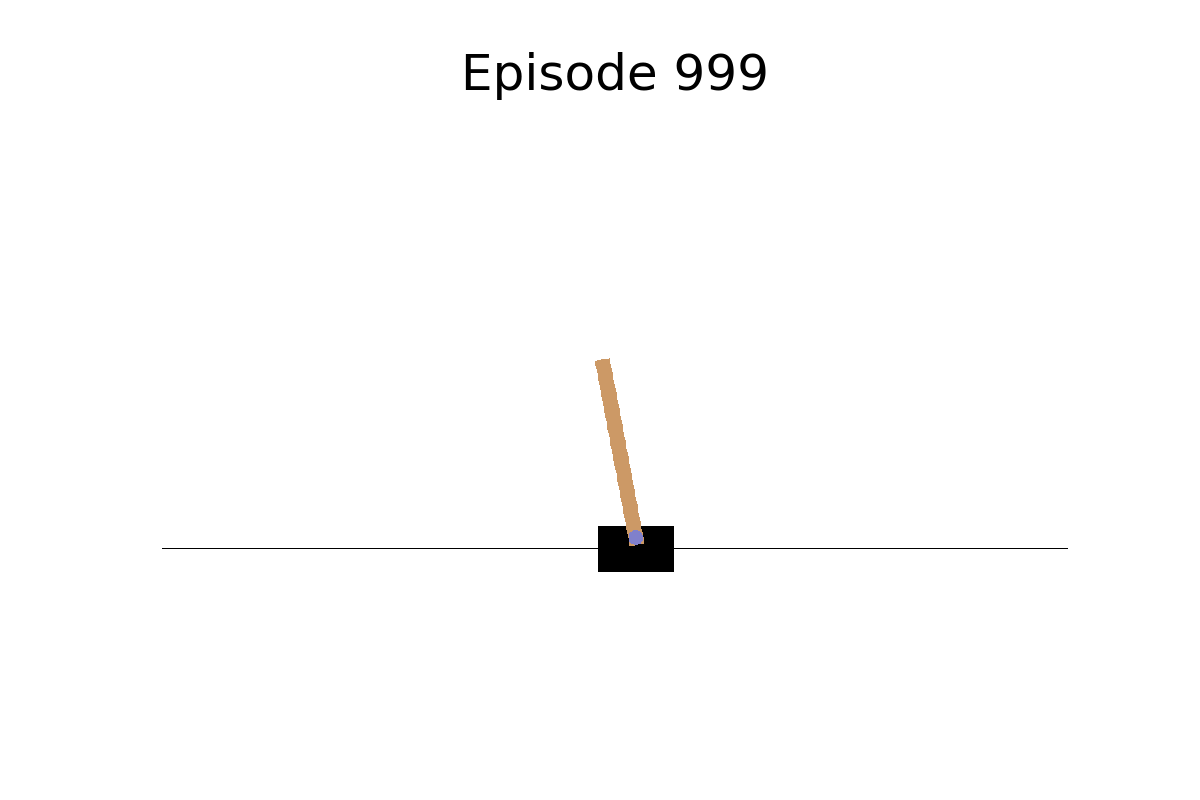
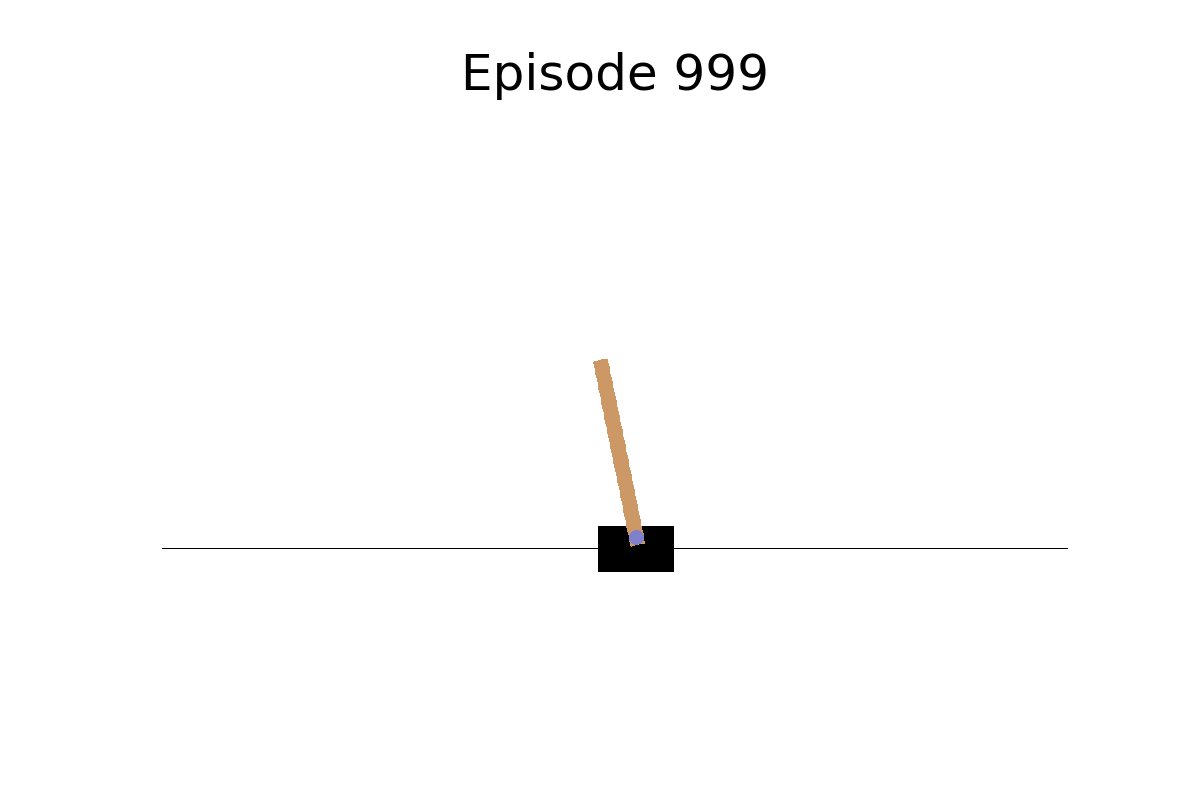
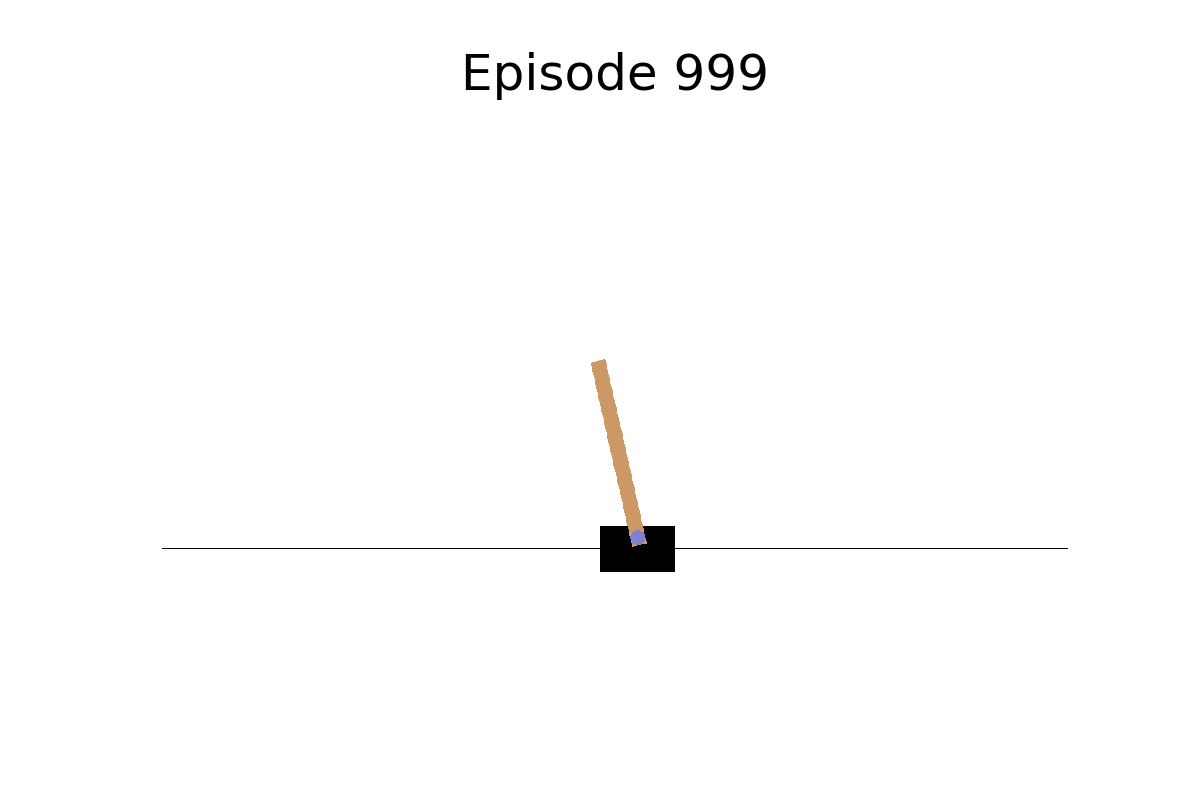

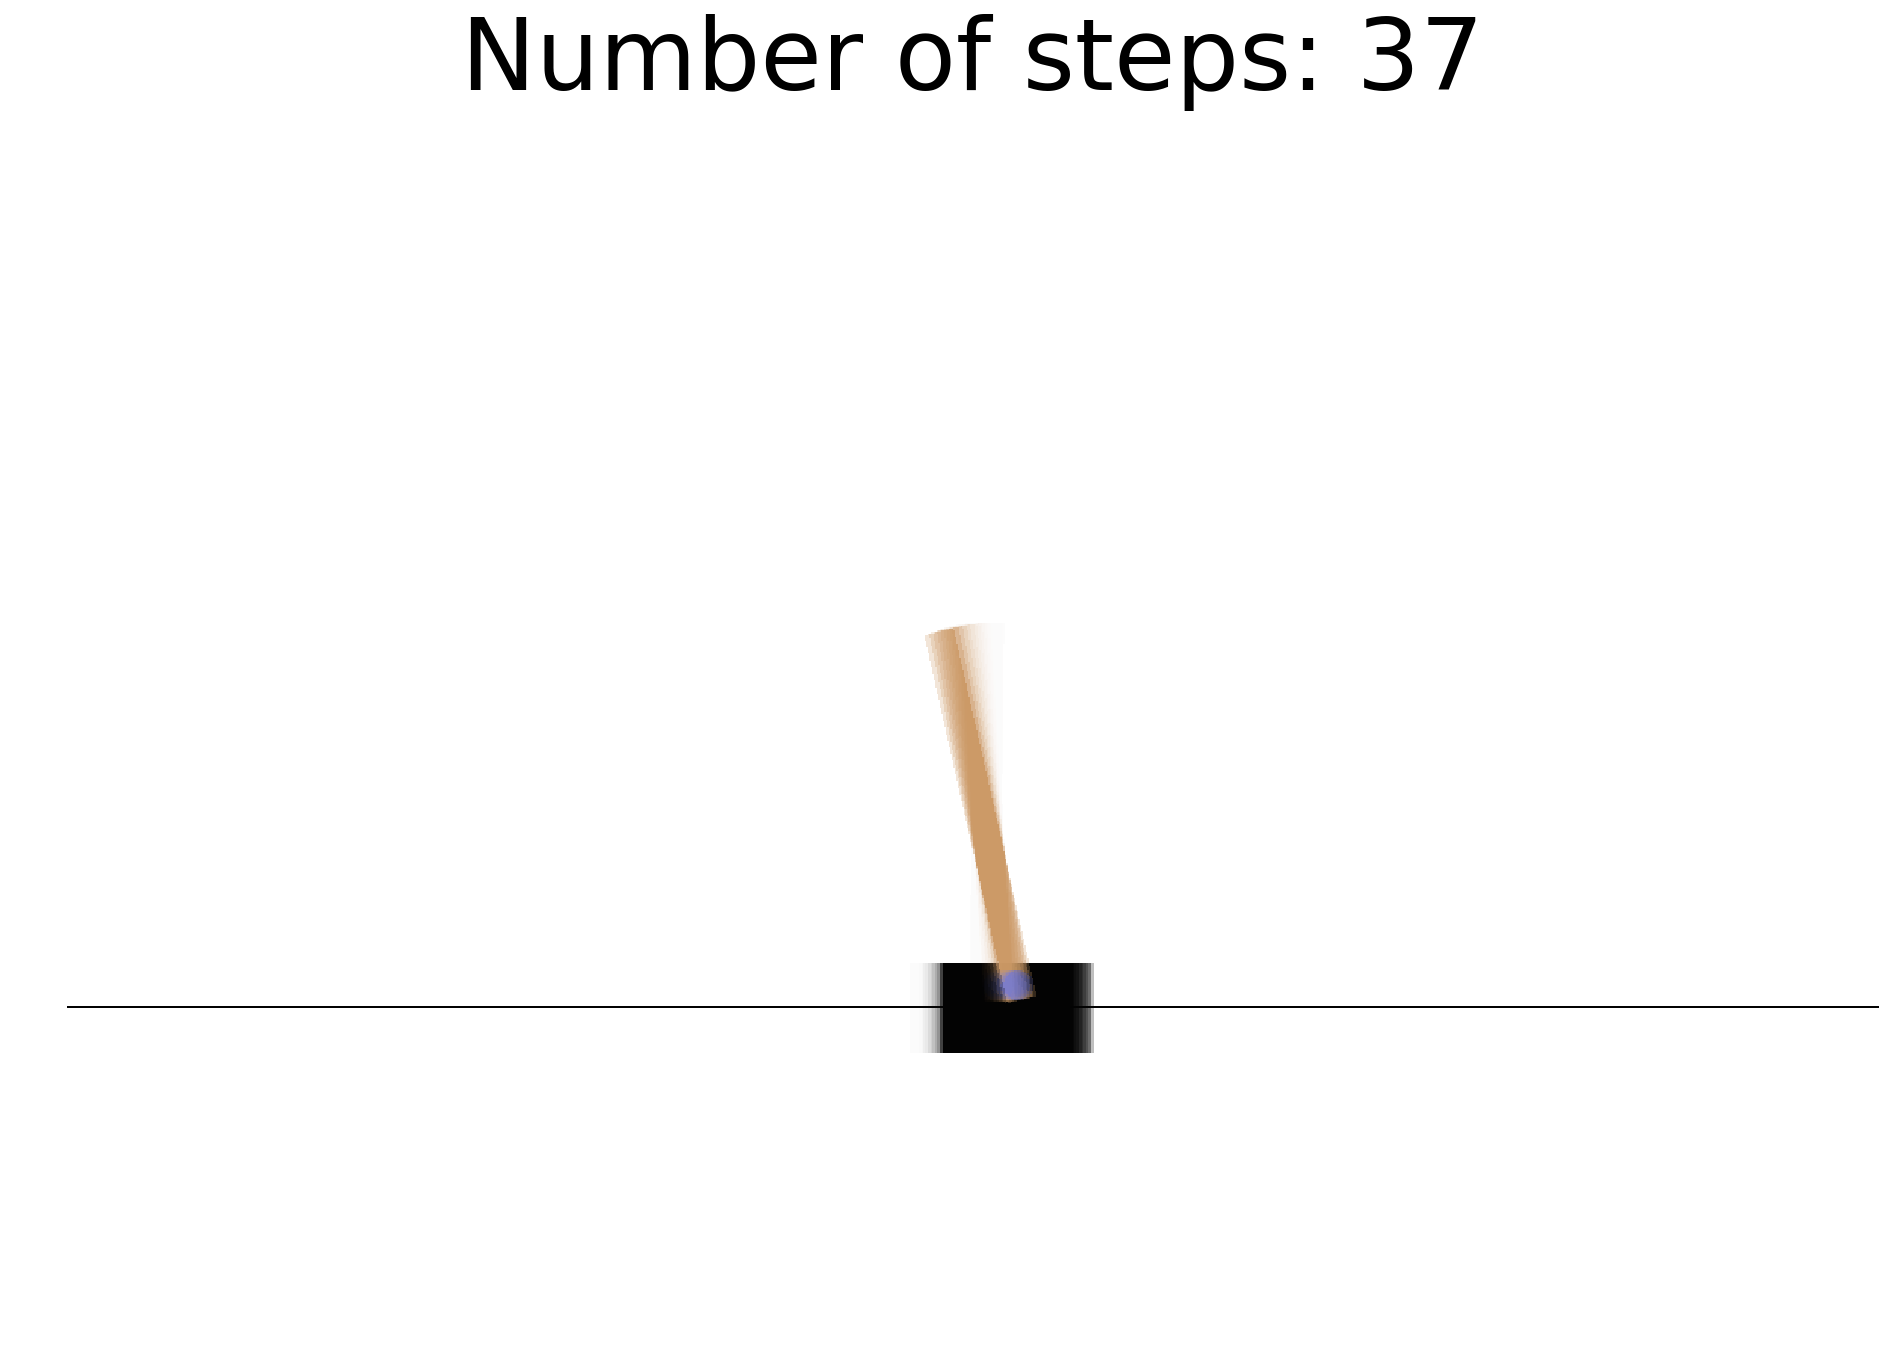

In [18]:
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}

for i_episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[i_episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[i_episode]["actions"] = actions
            shadow_run[i_episode]["states"] = states
            shadow_run[i_episode]["shots"] = shots
            shadow_run[i_episode]["steps"] = step
            
            print("Episode {} finished after {} steps".format(i_episode, step))
            break
        
        state = new_state


print("Average reward: {:.2f}".format(sum(steps_total)/num_episodes))

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)


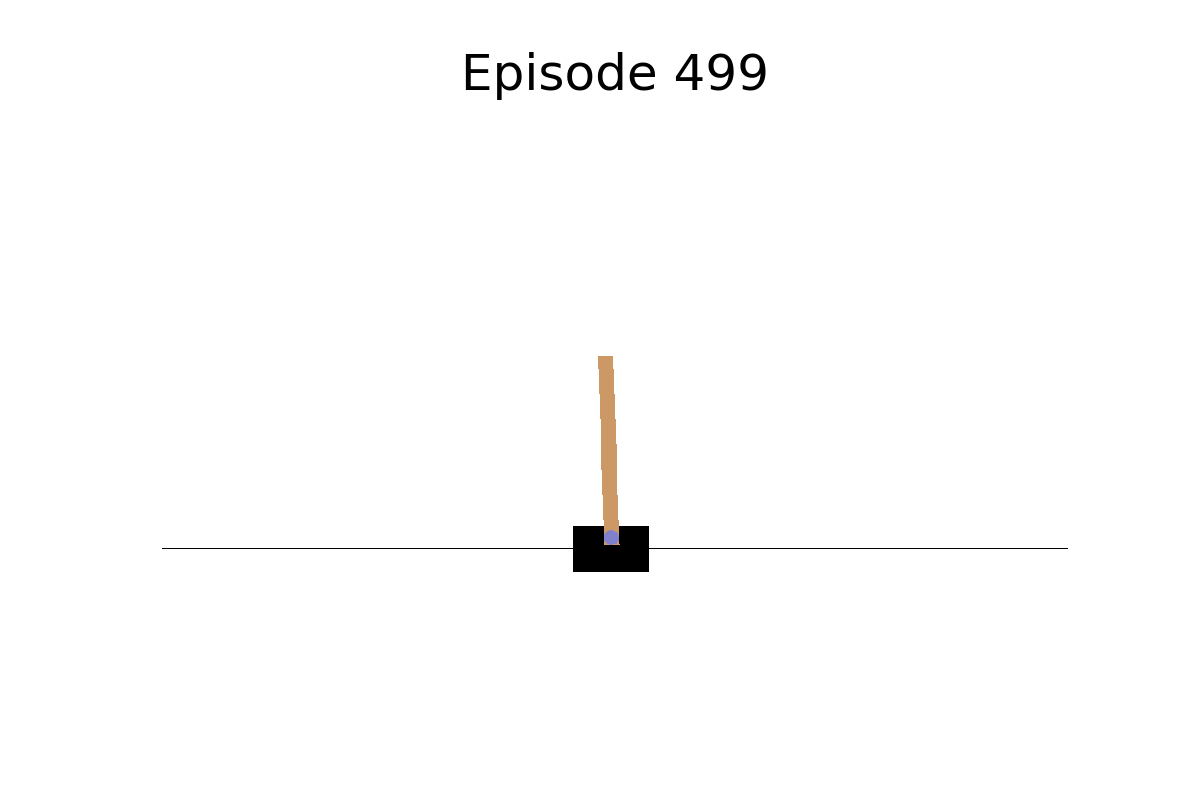
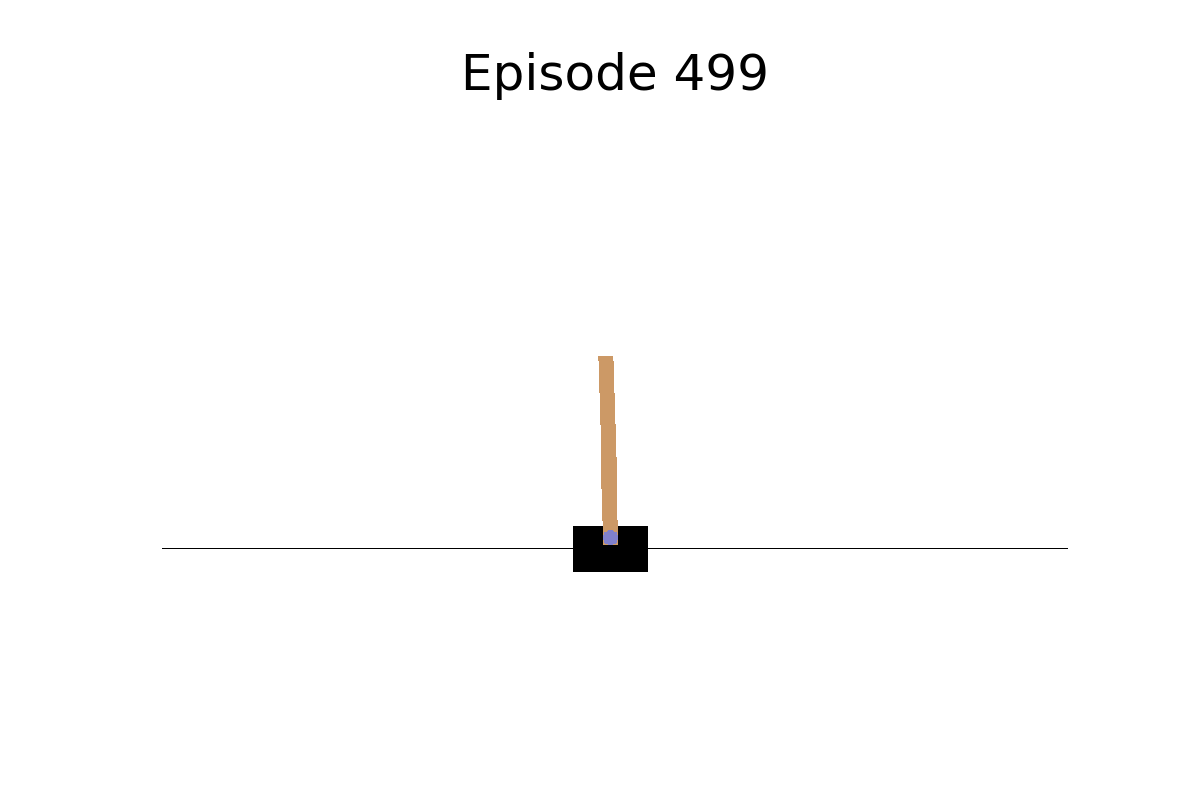
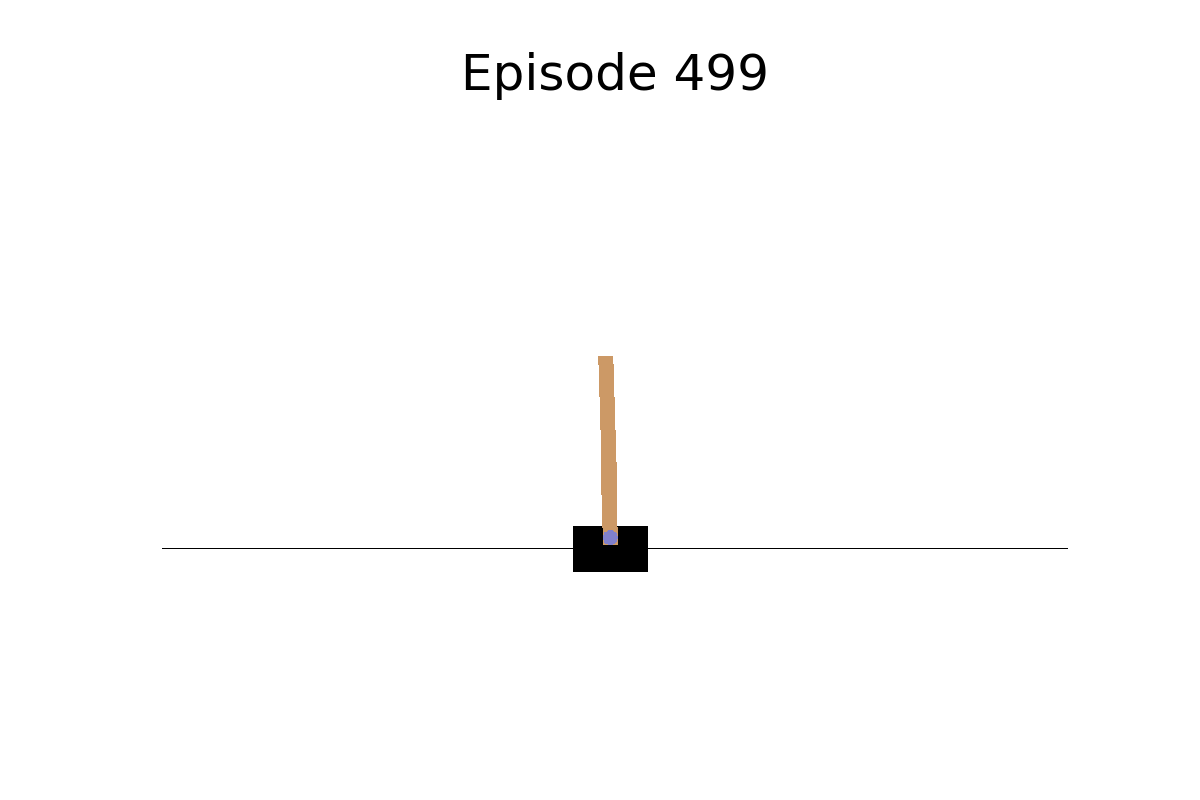
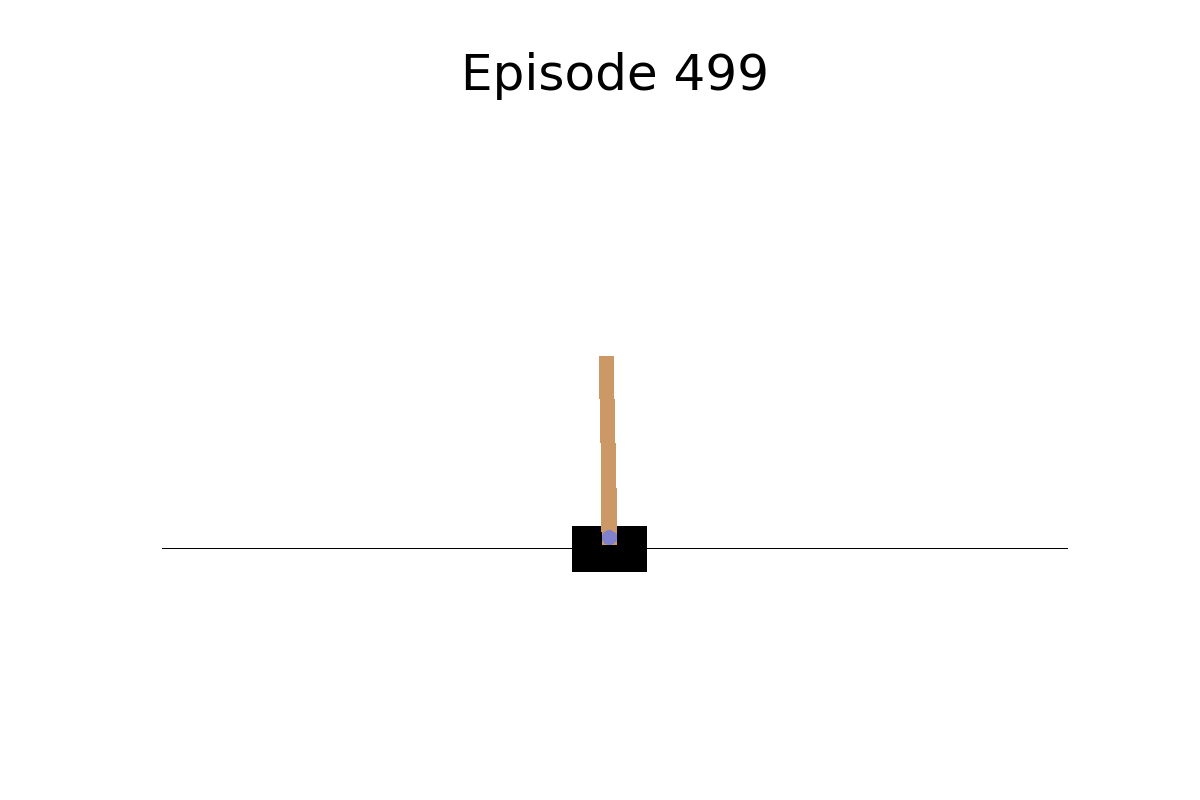
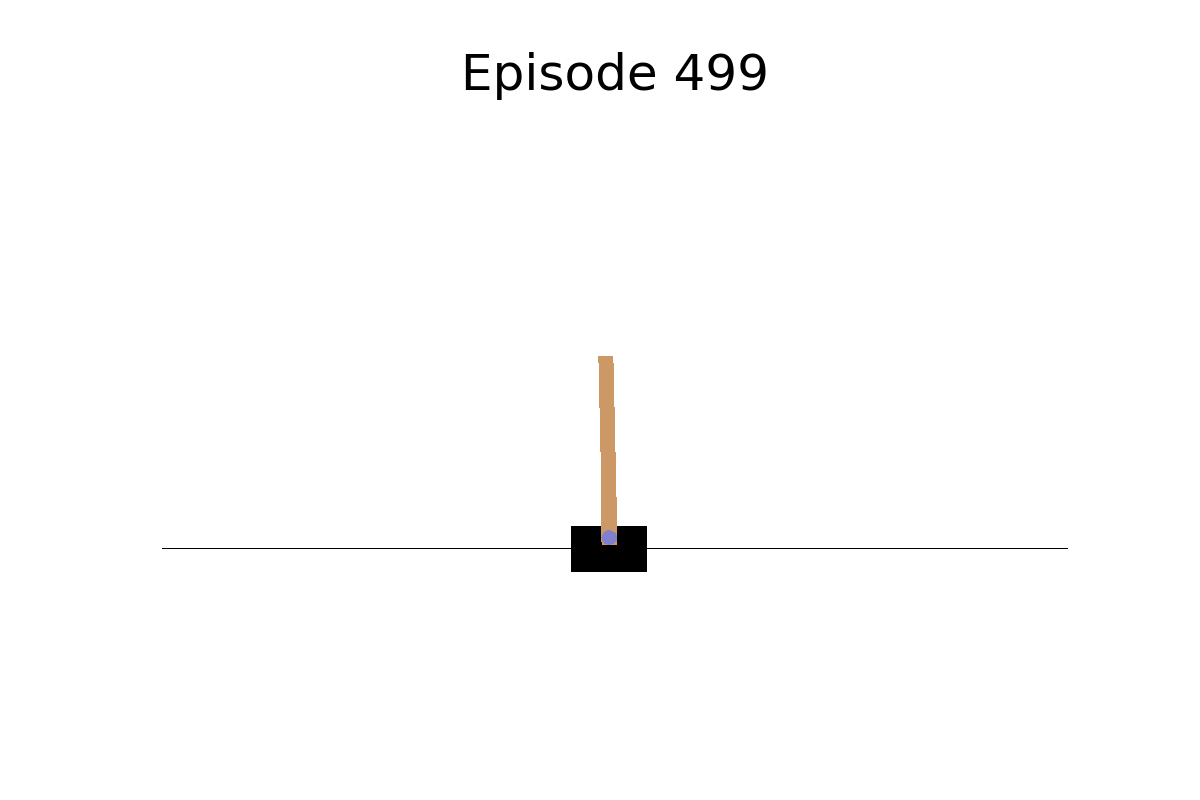
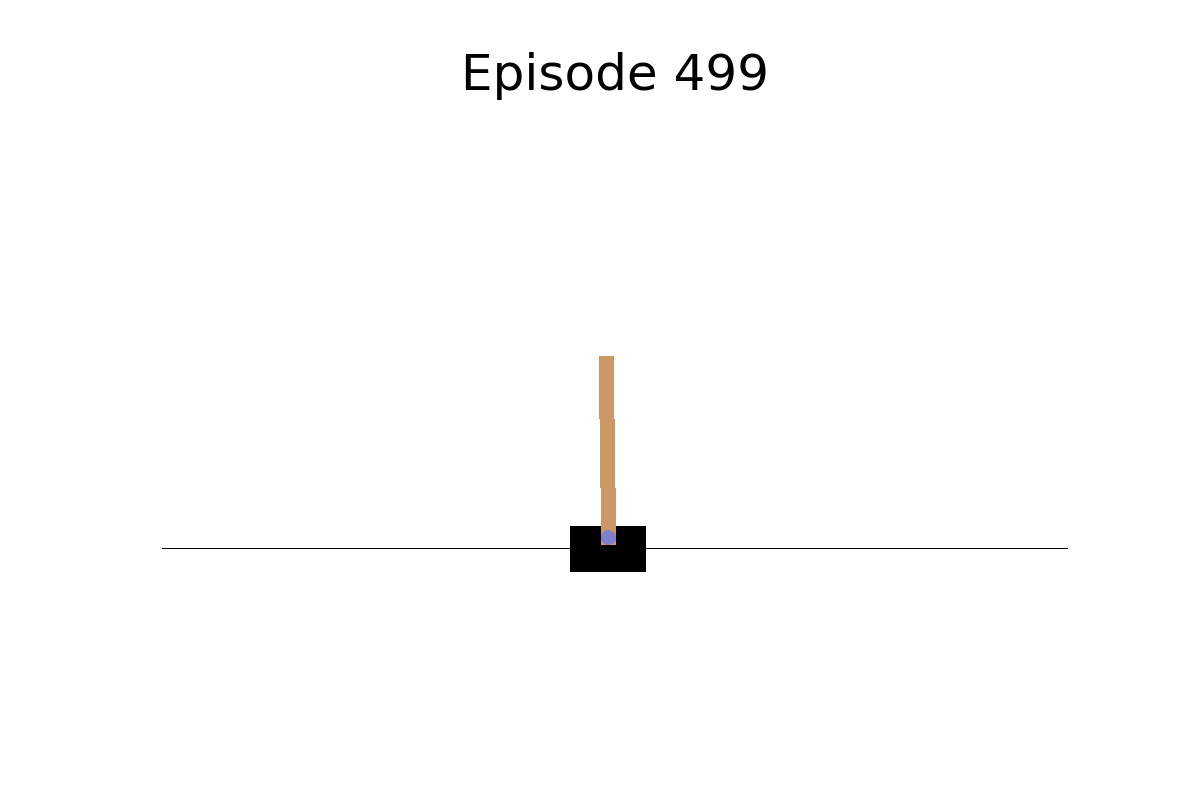
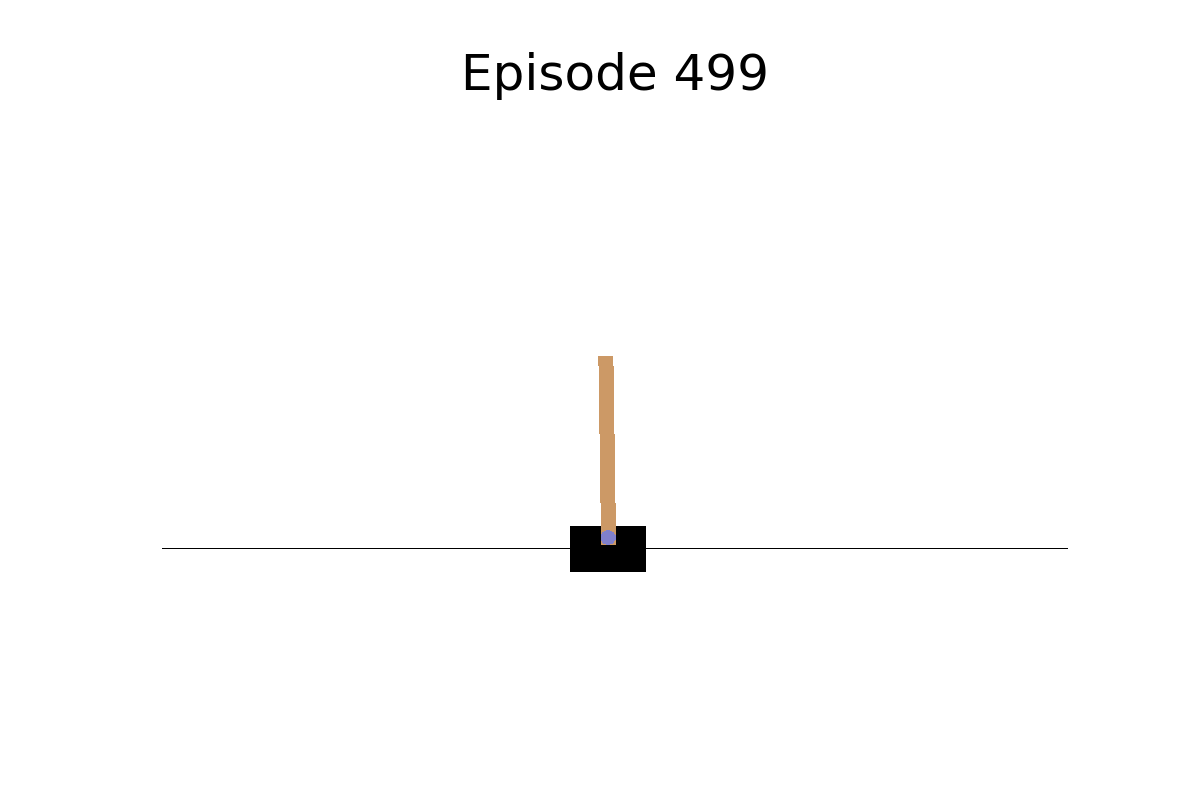
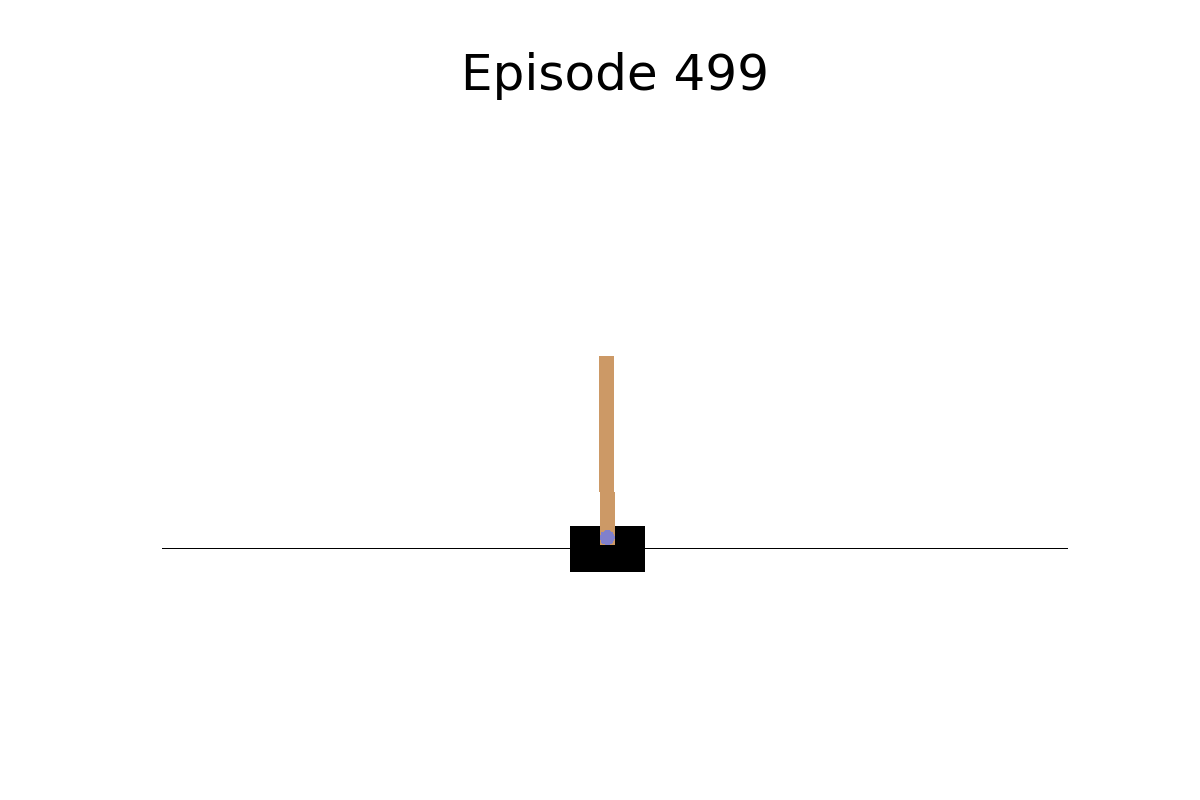
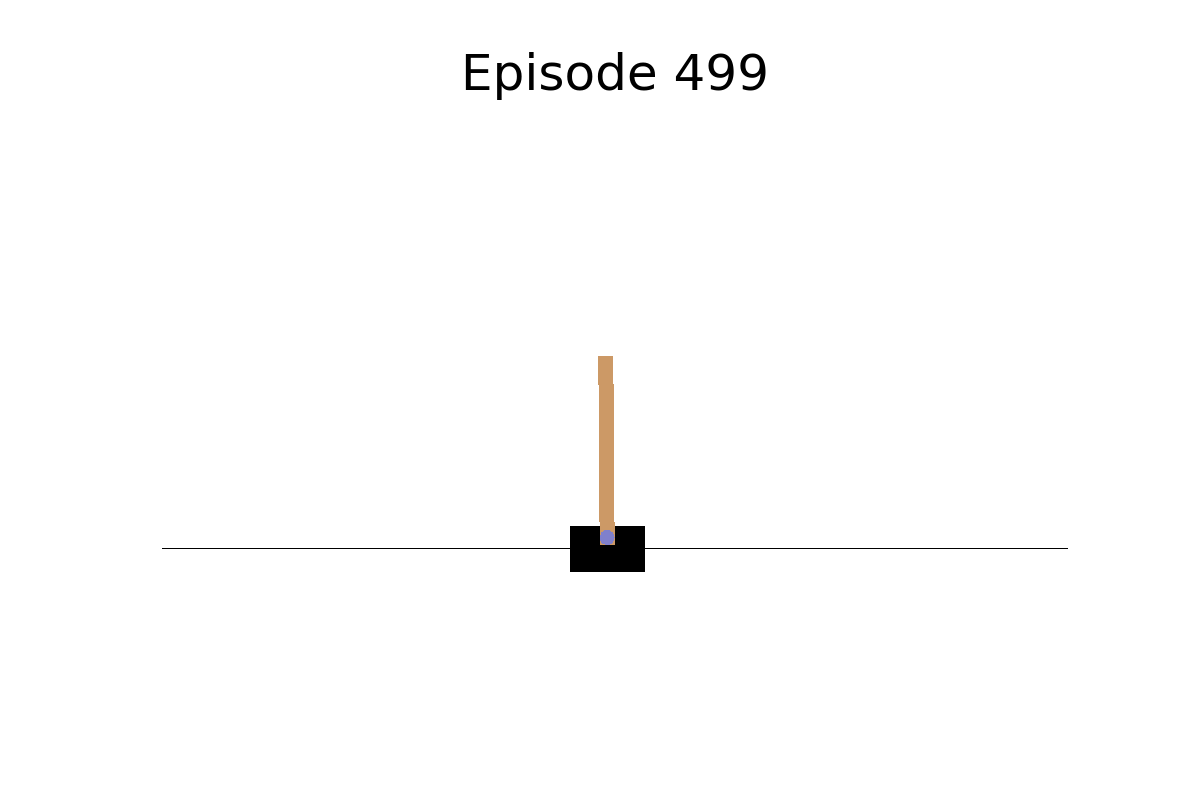
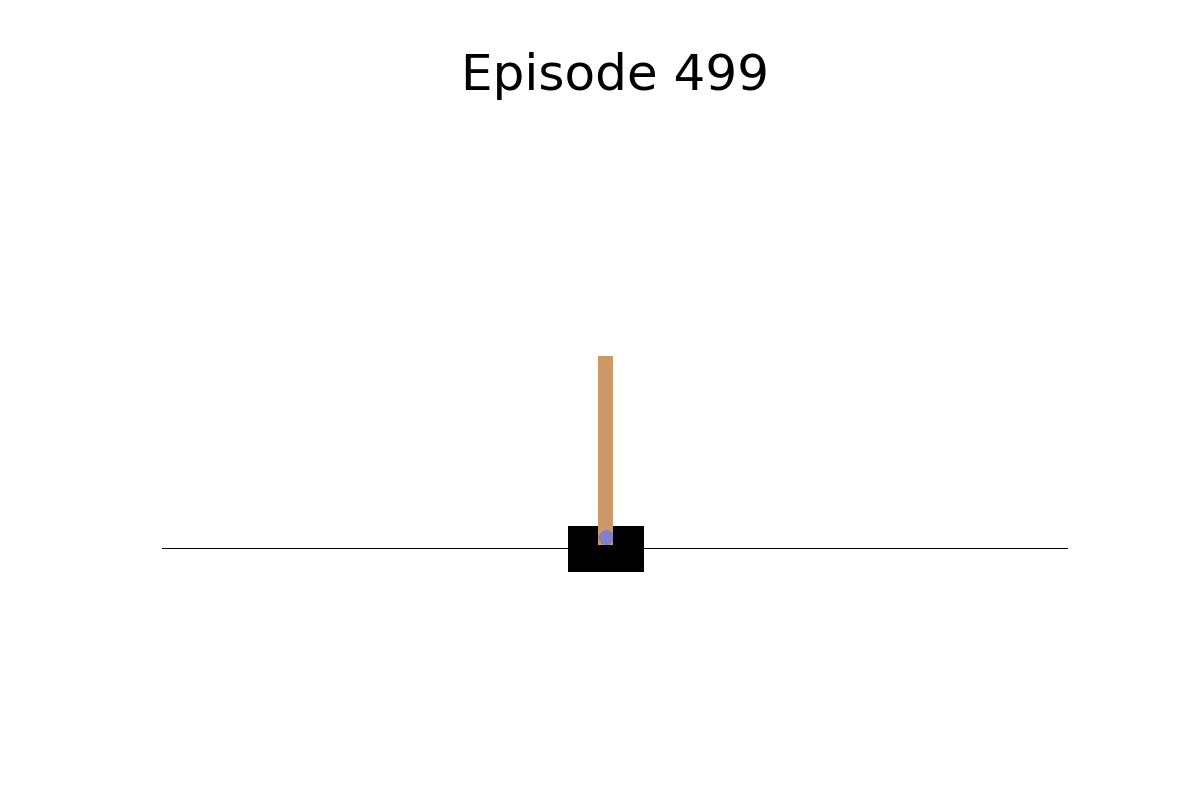
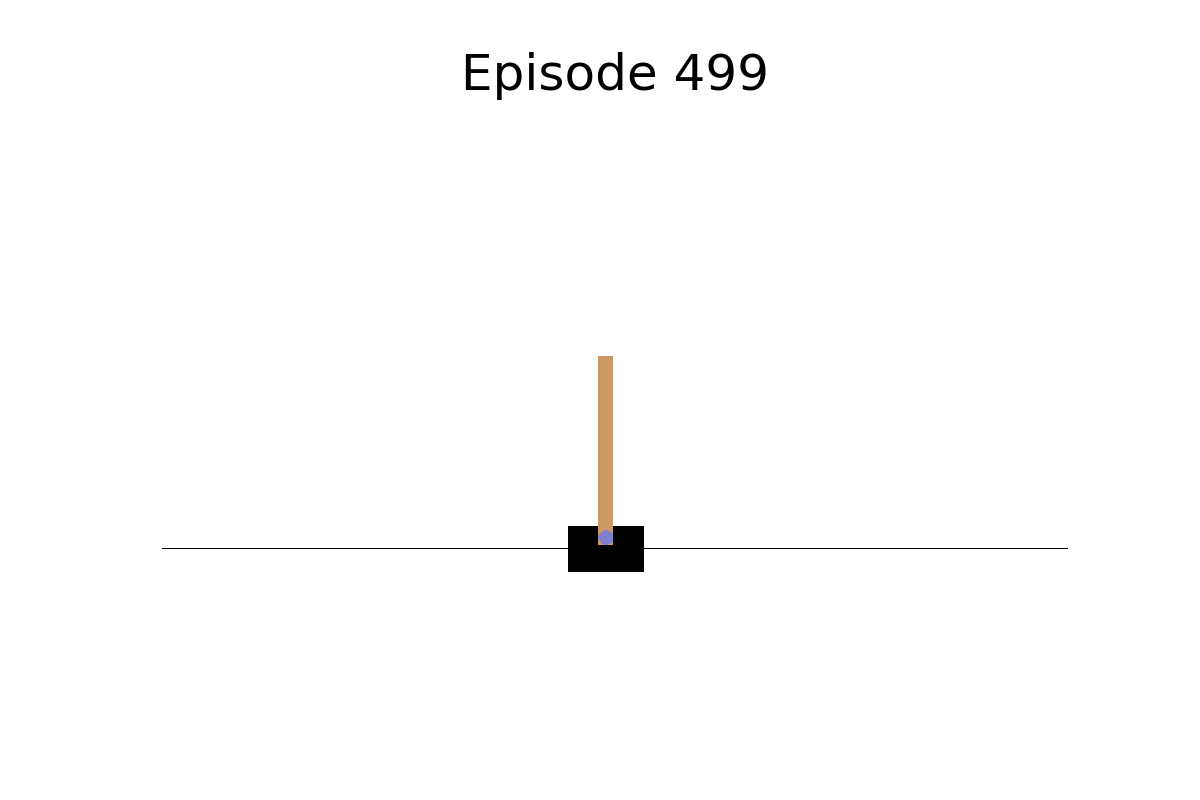
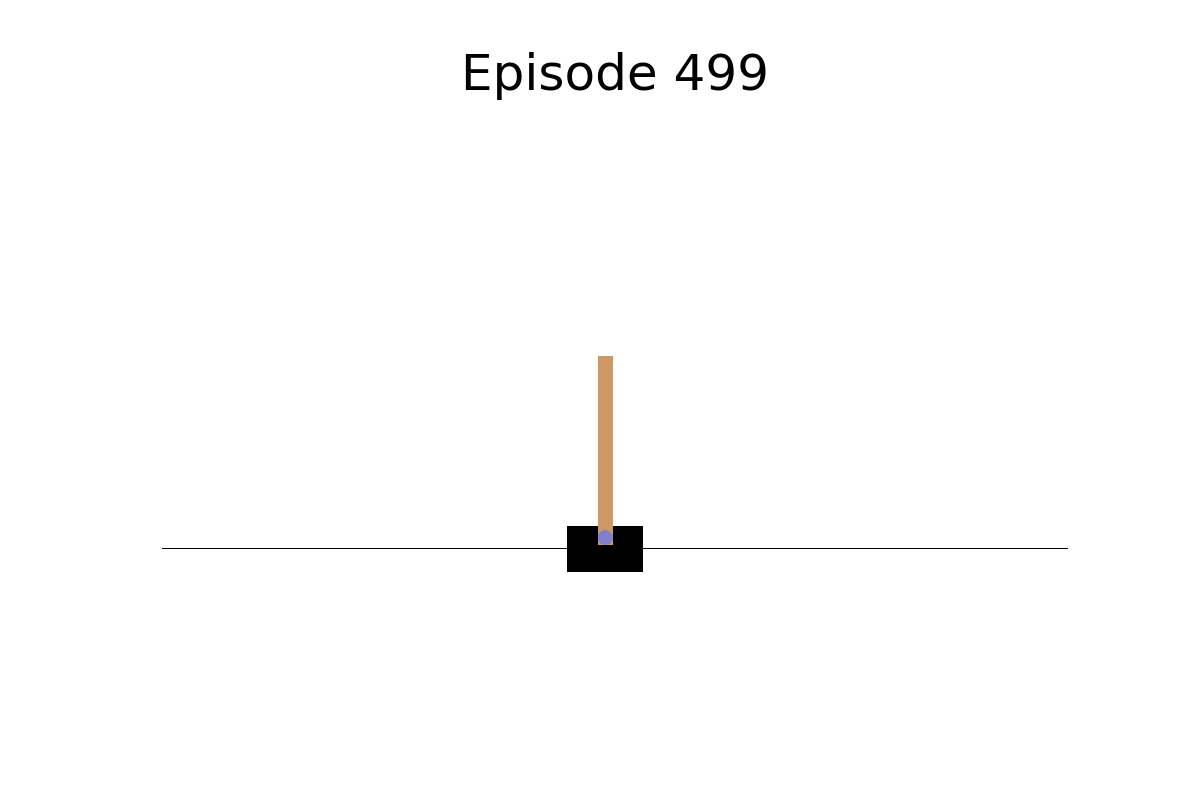
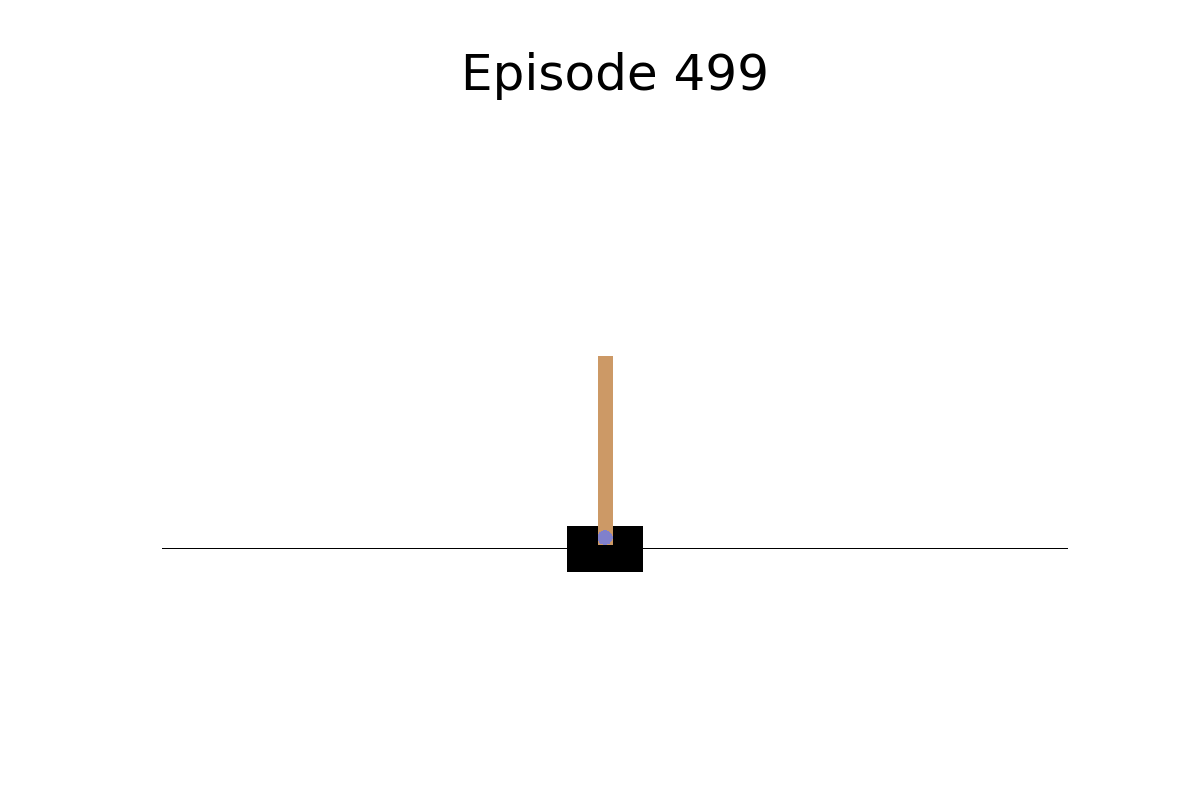
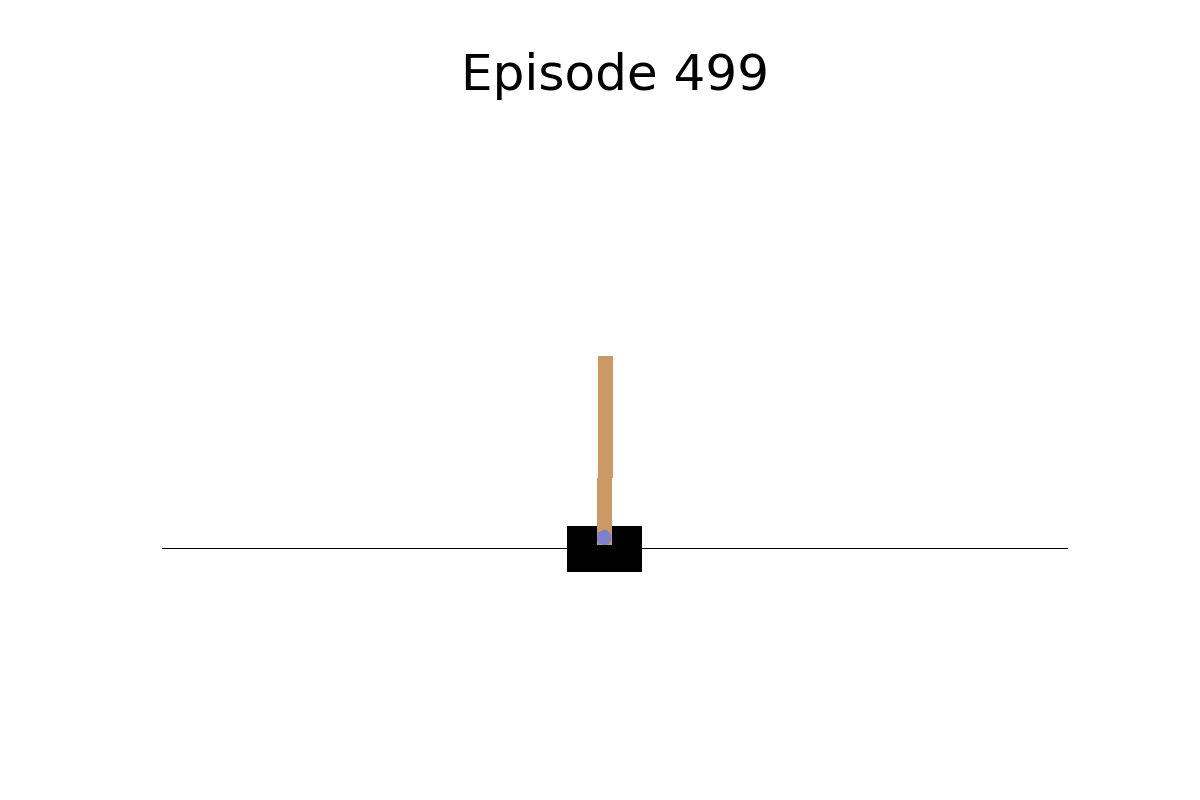
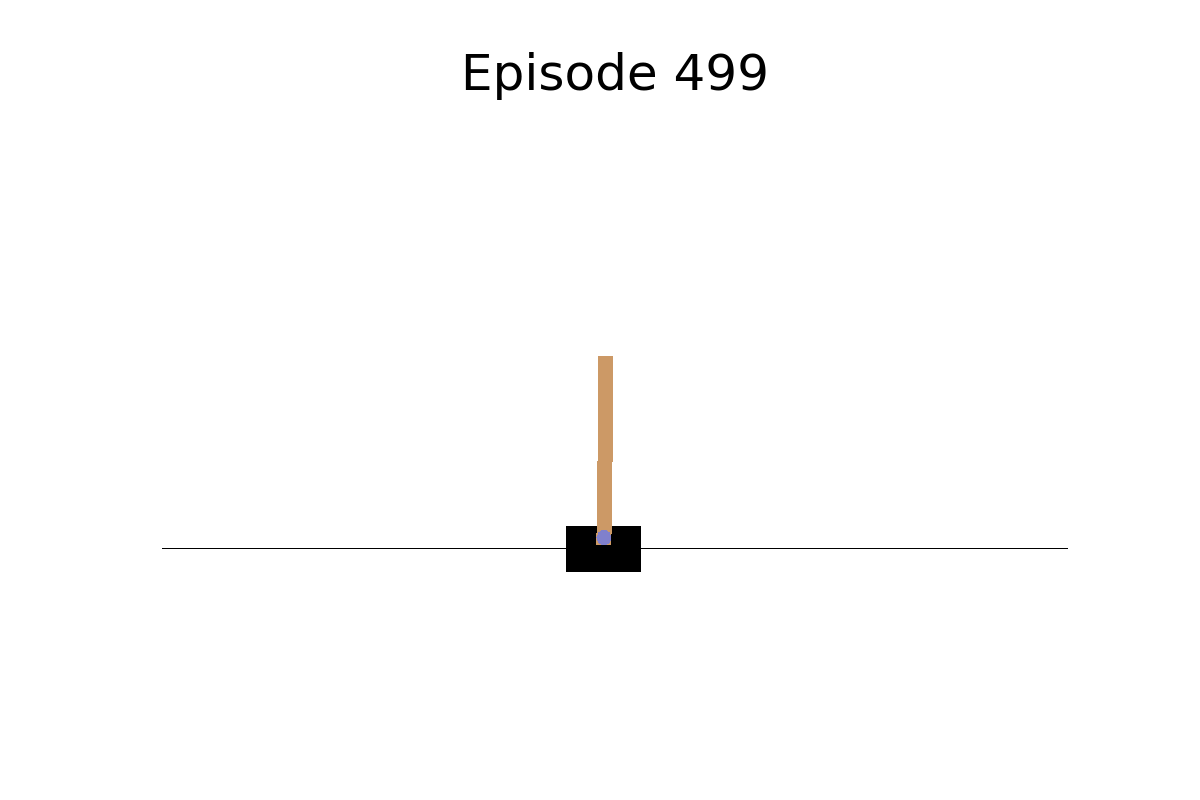
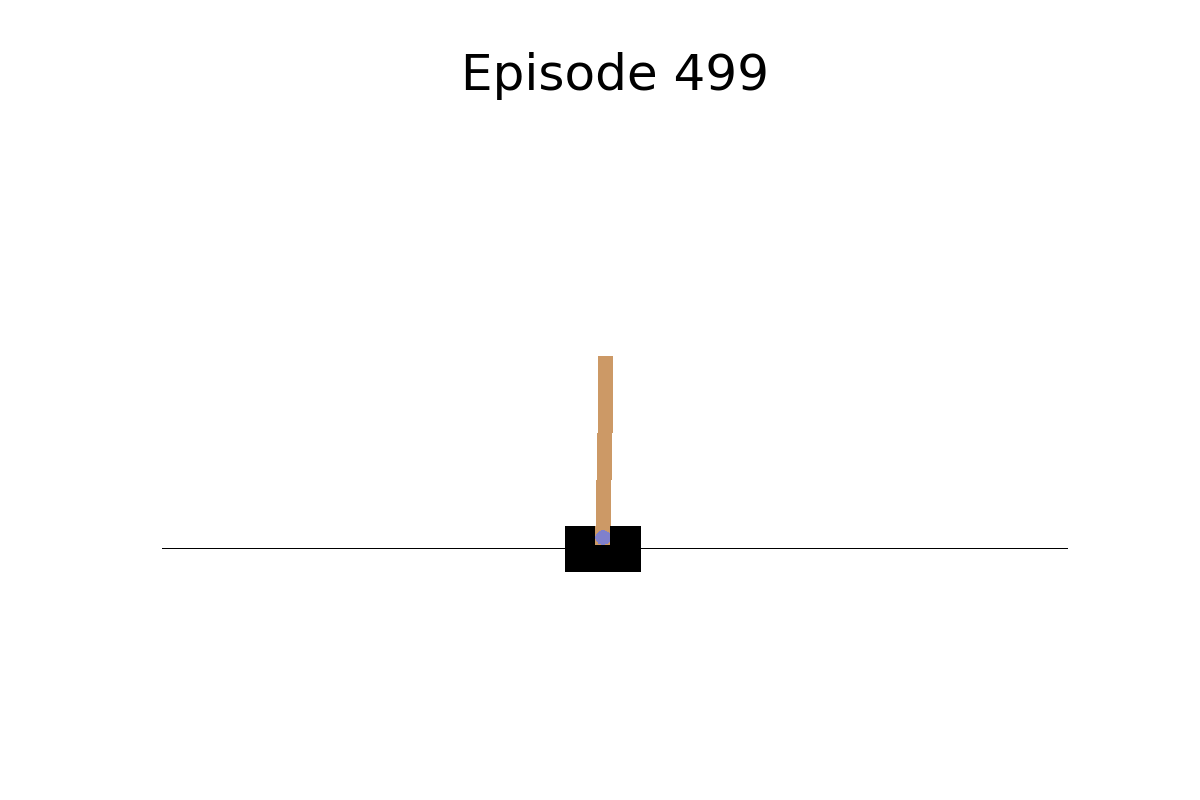
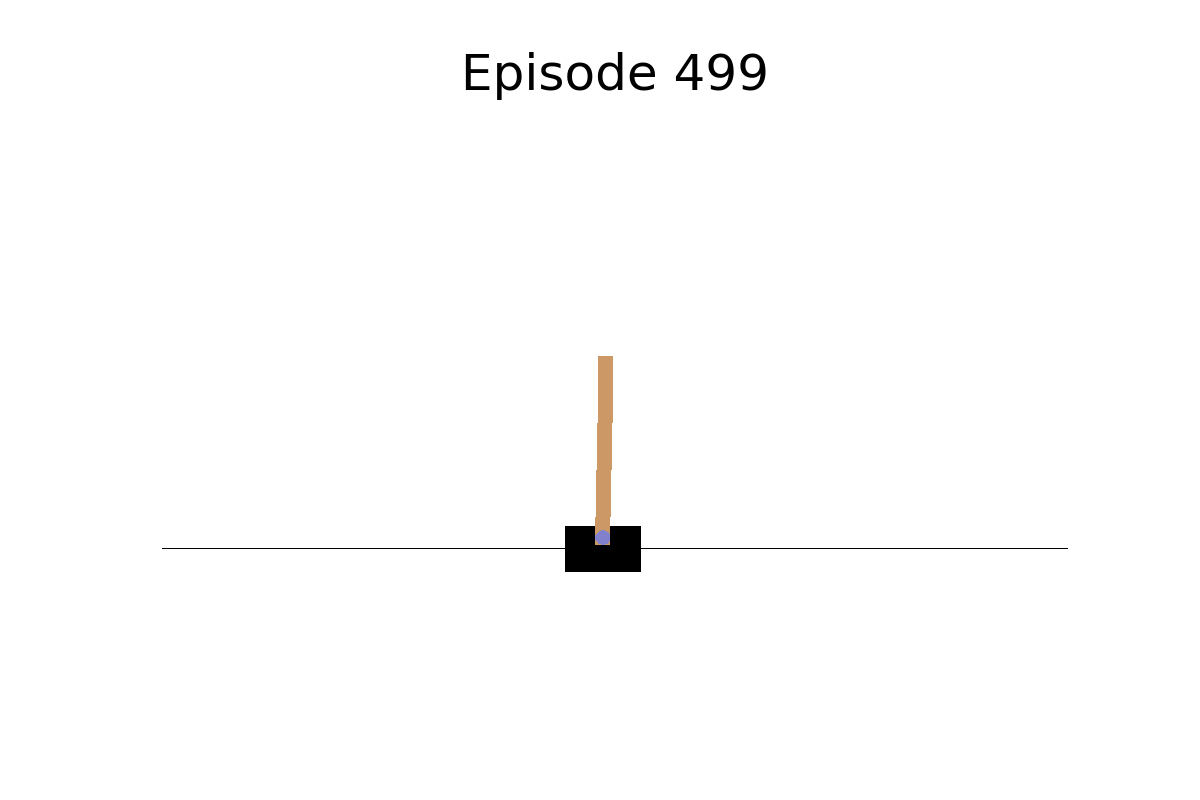
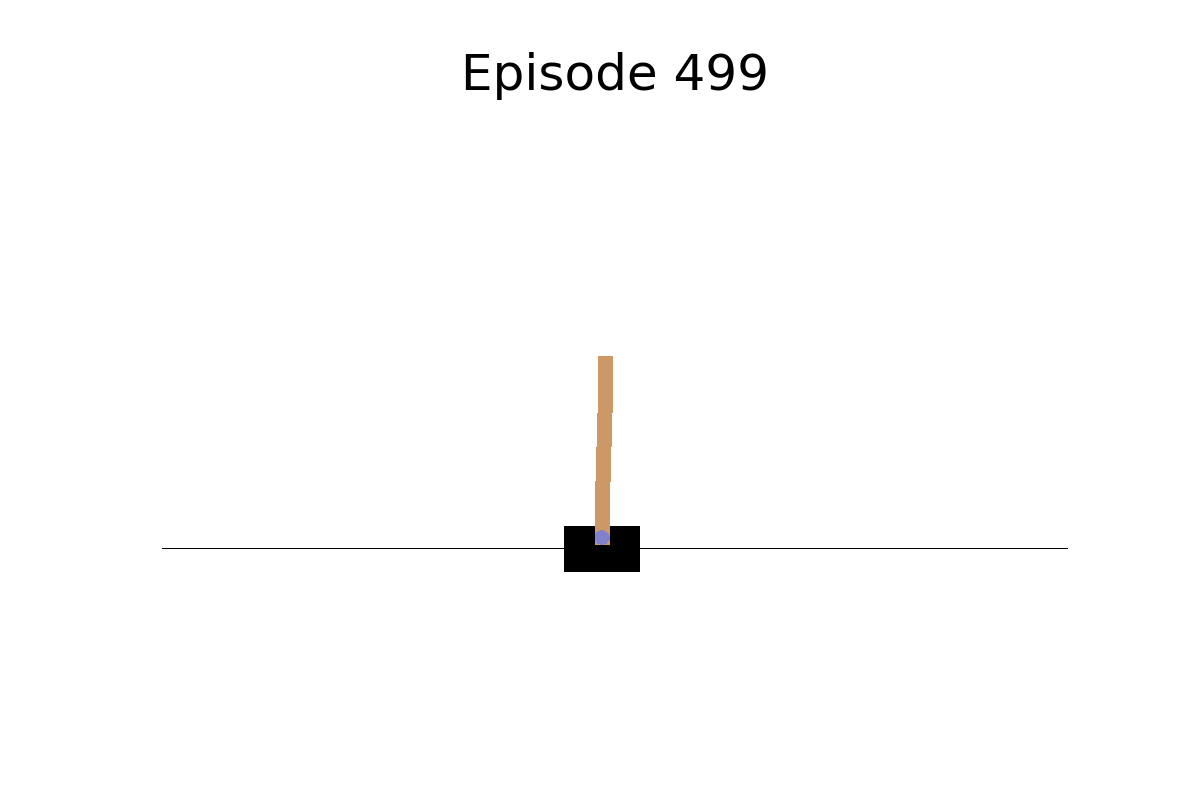
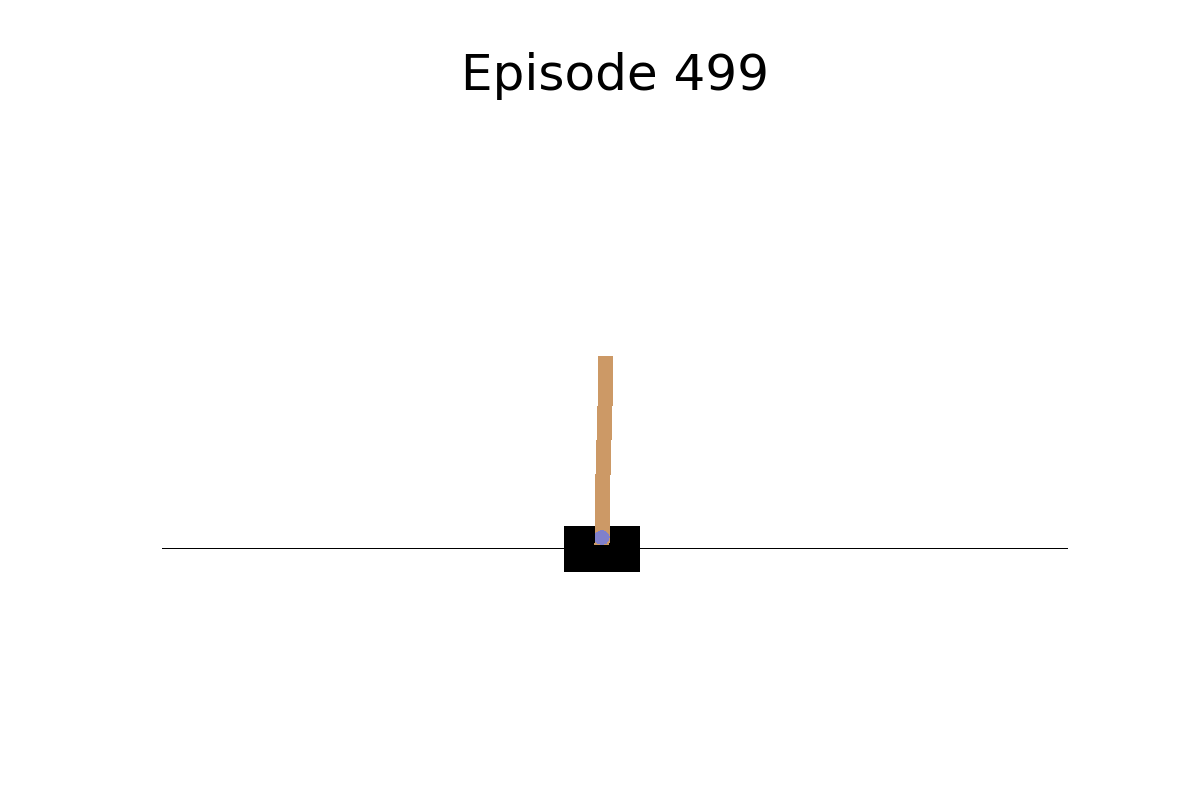
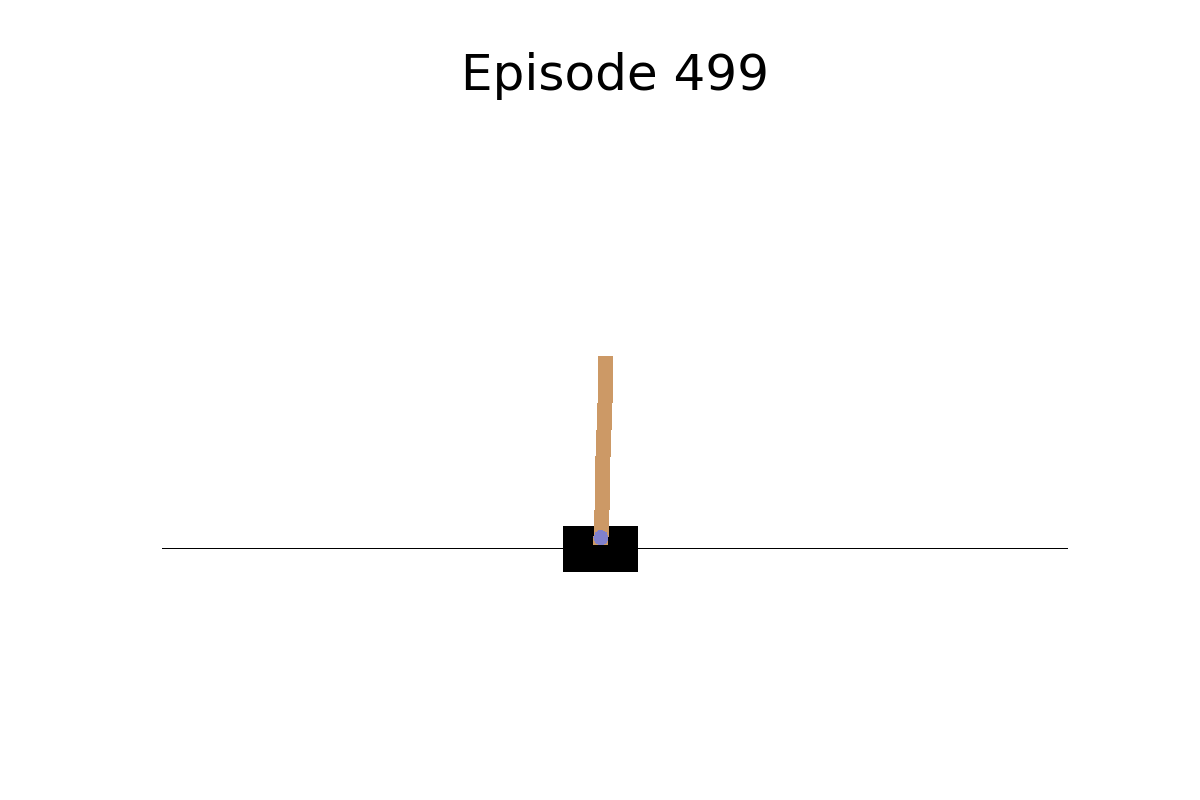
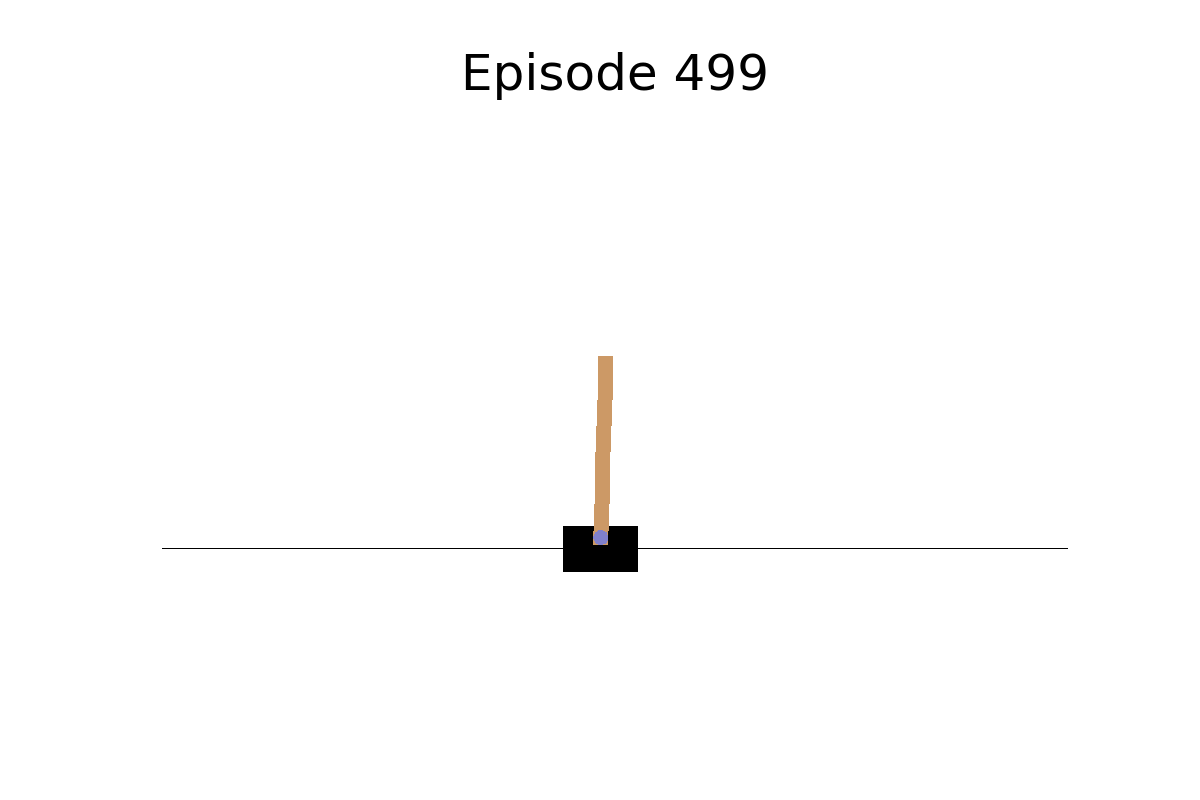
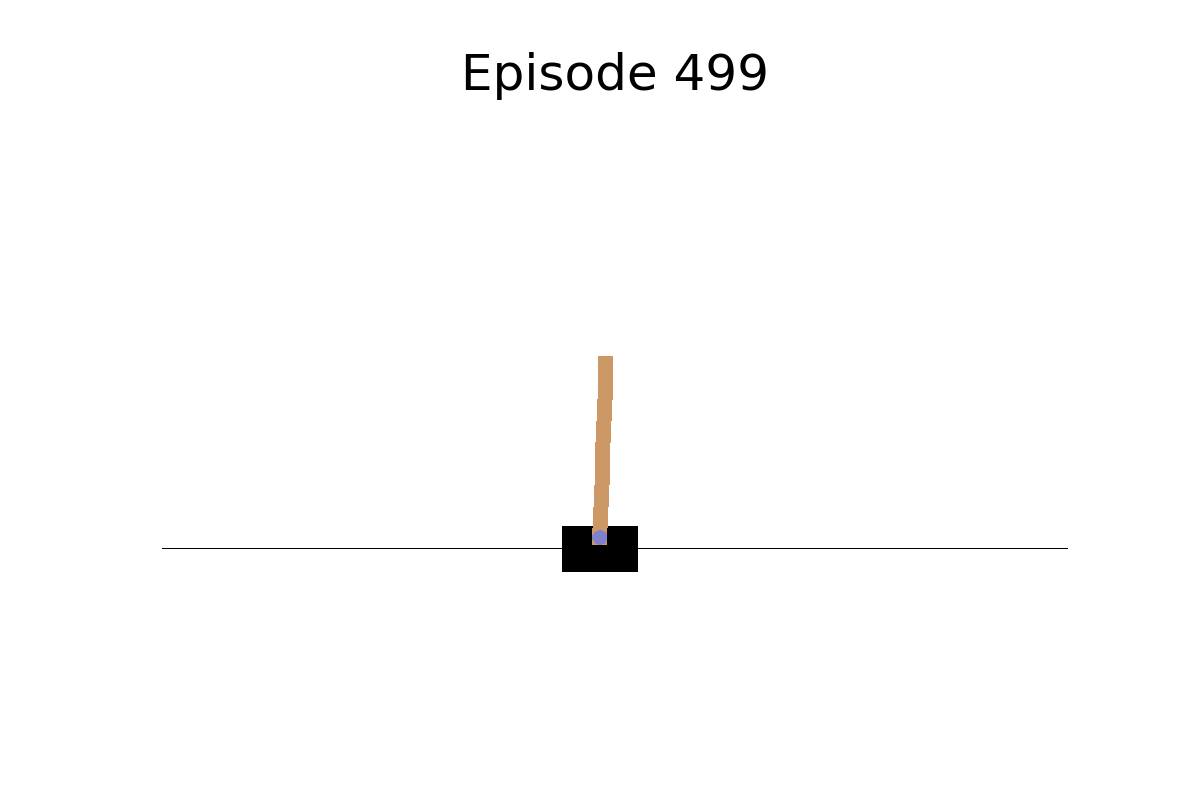
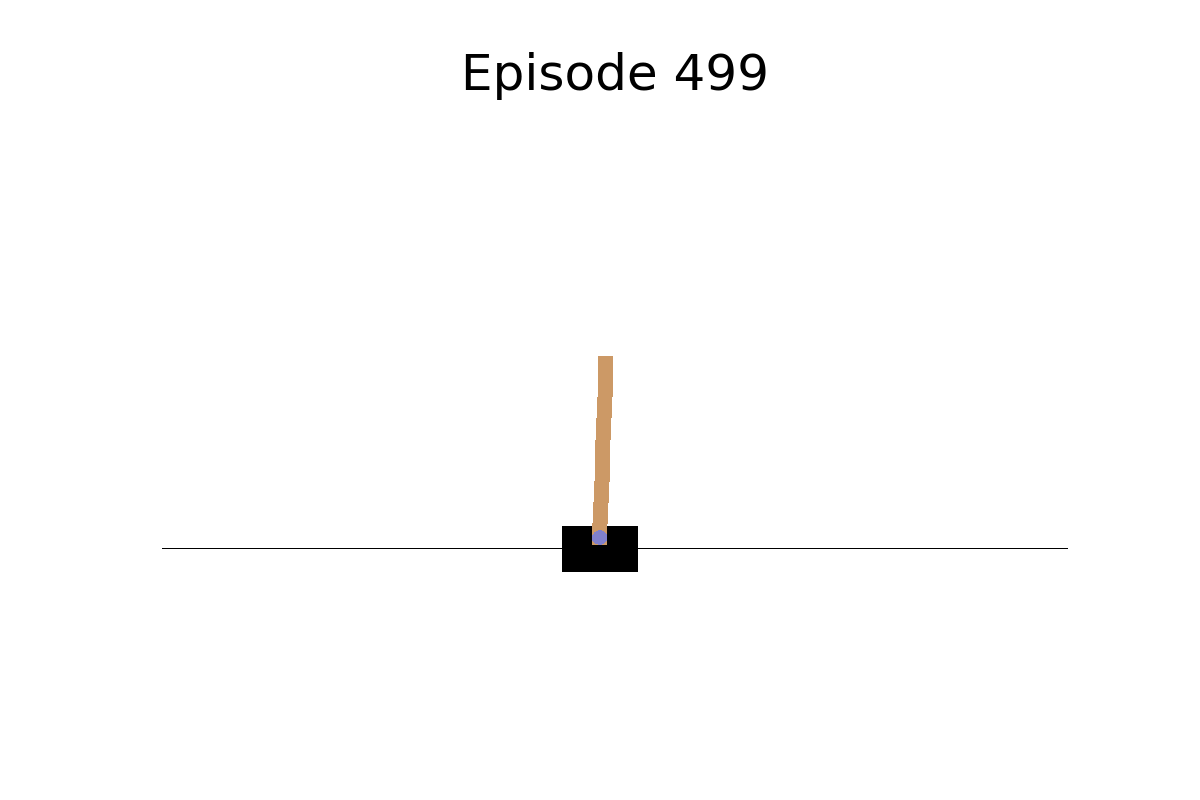
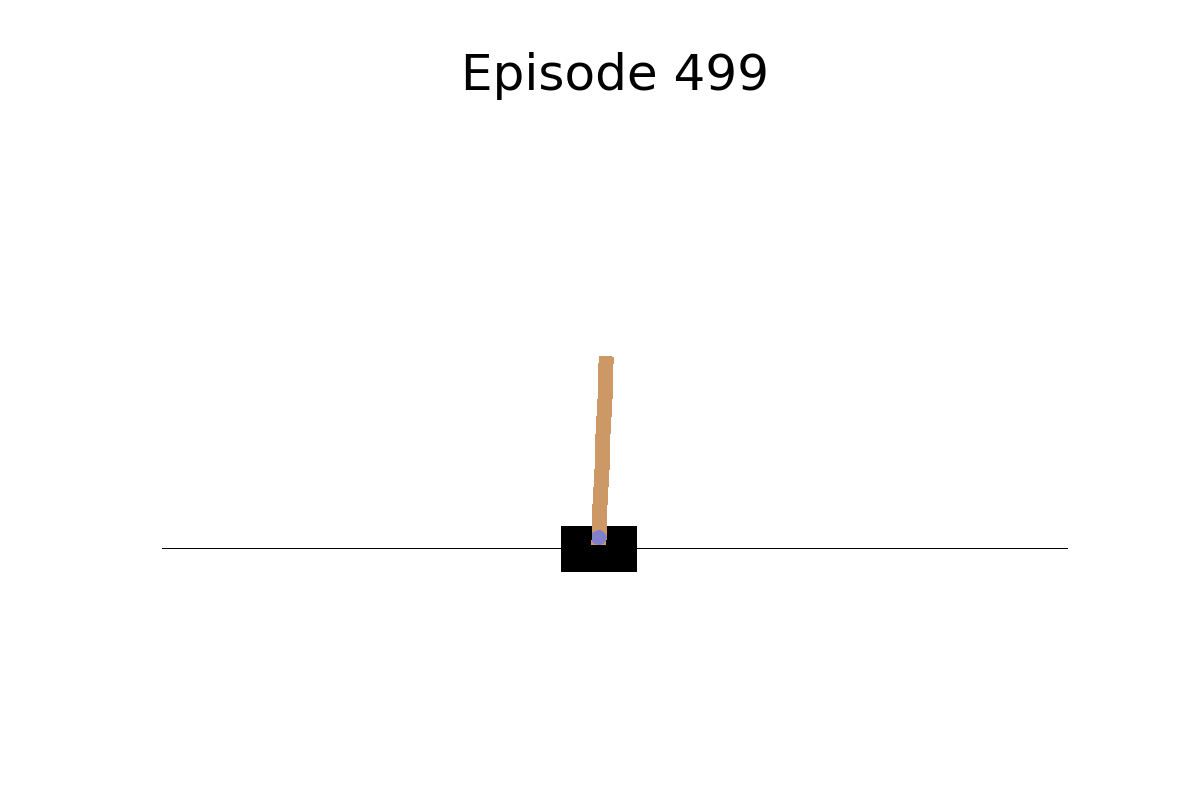
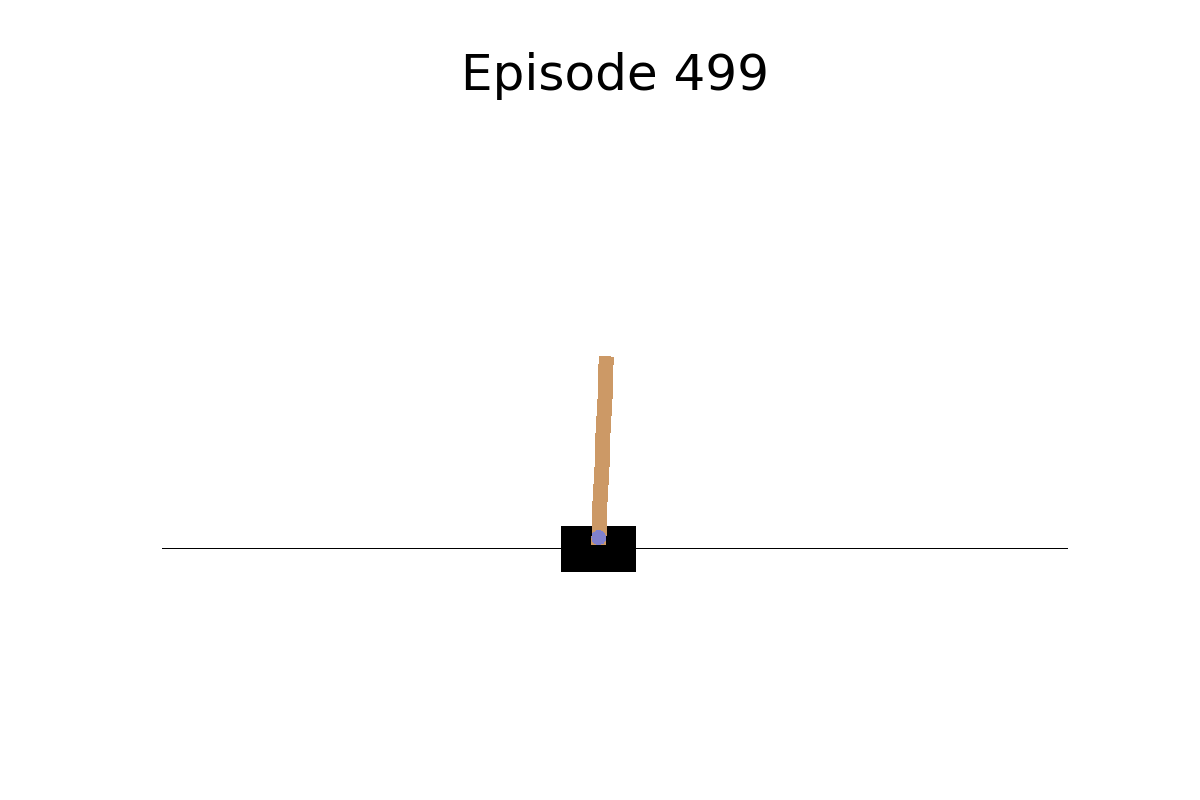
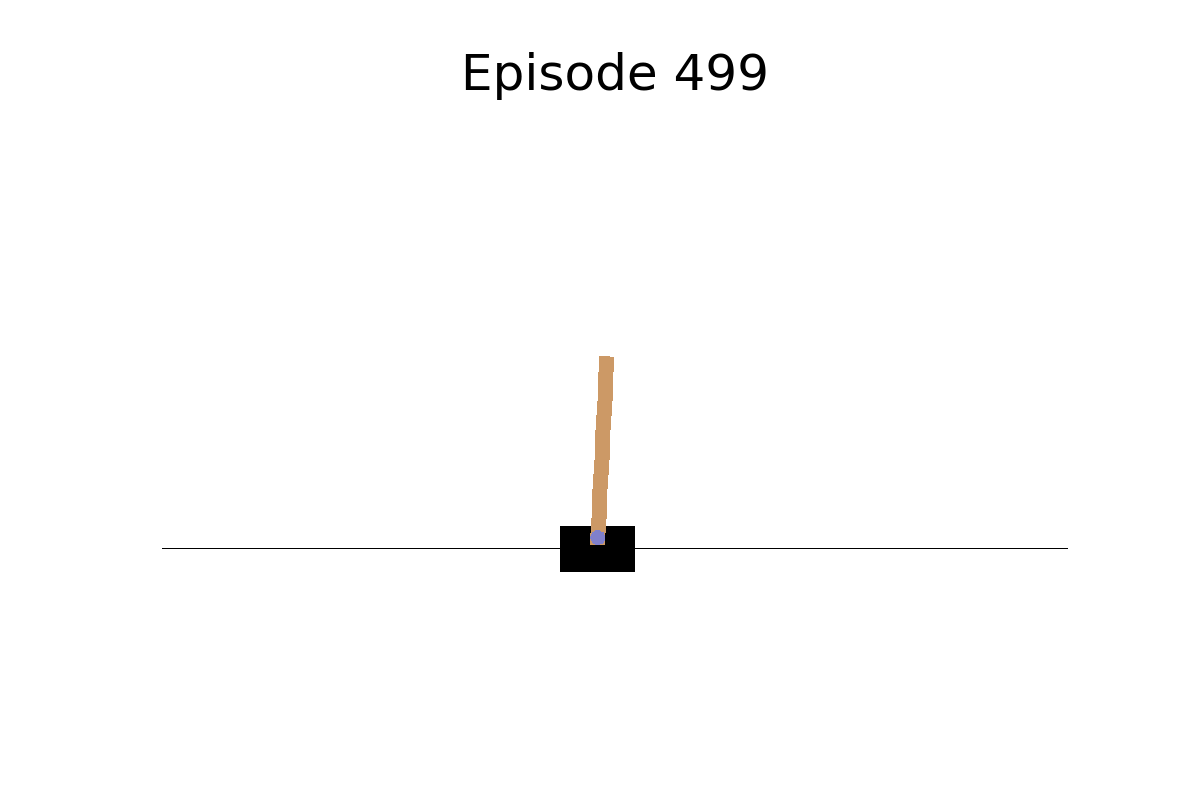
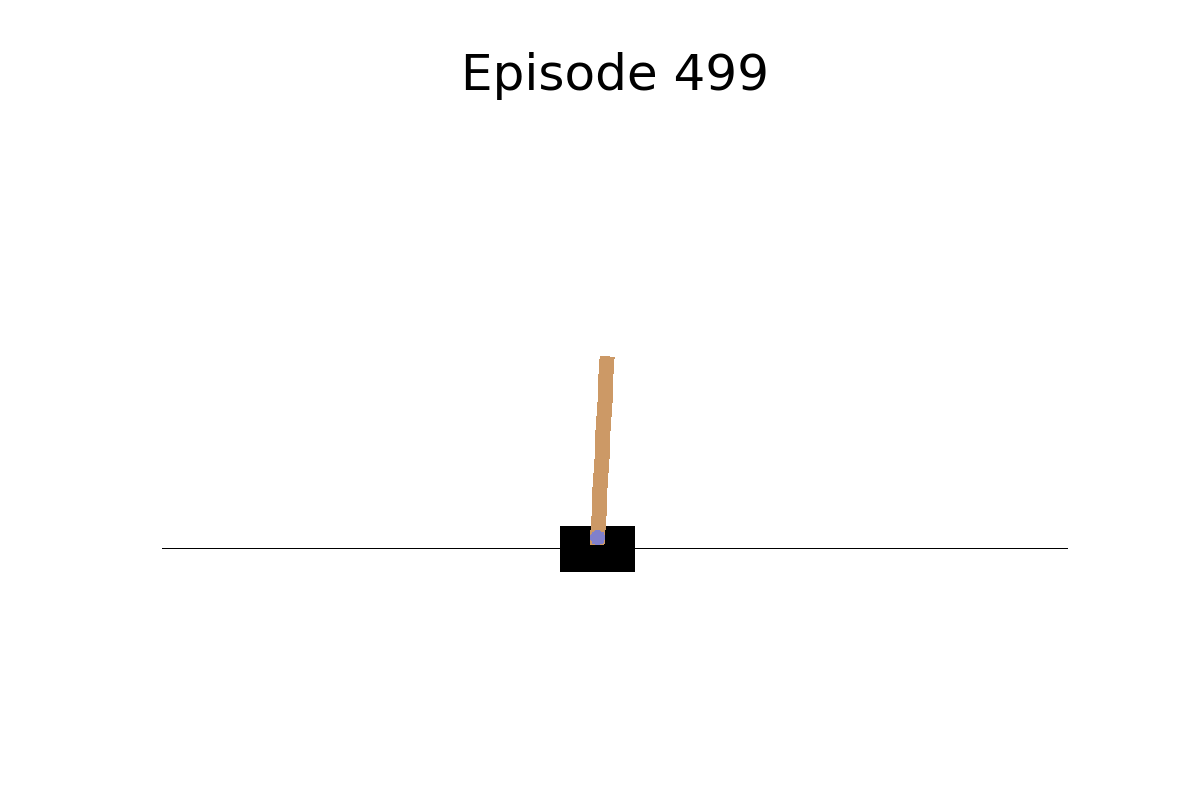
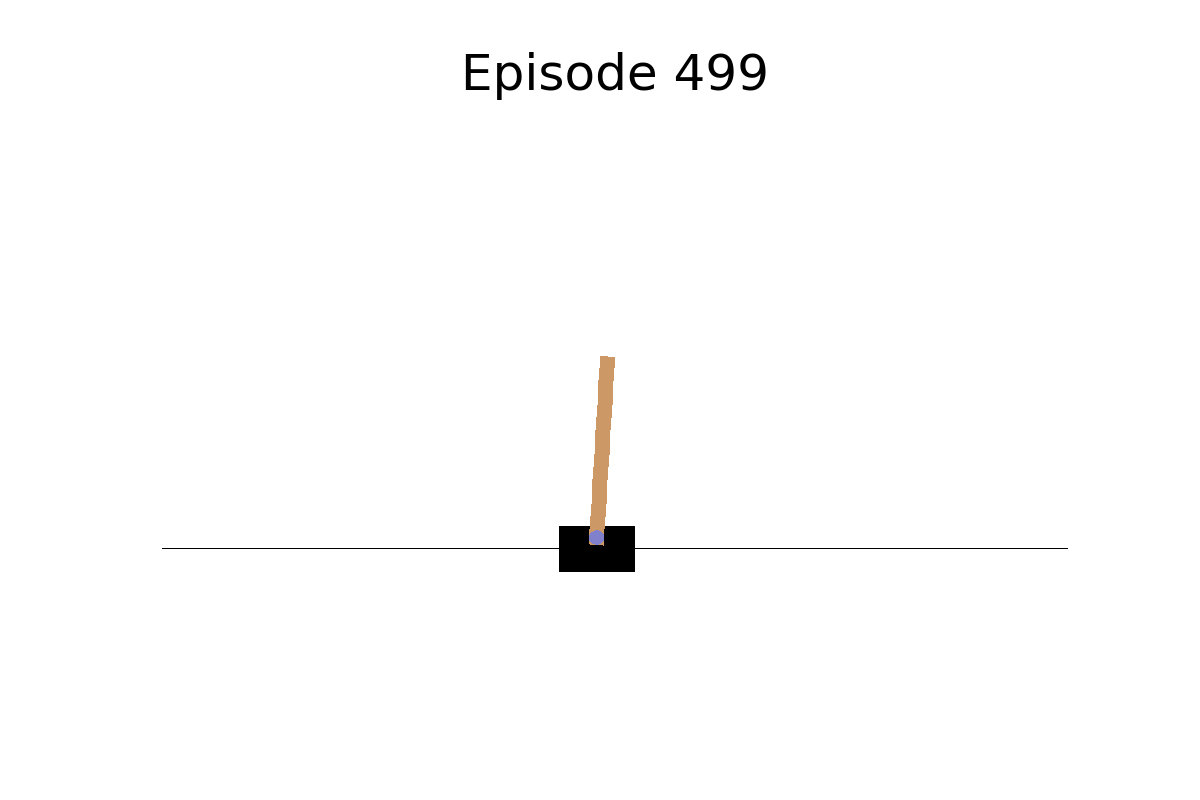
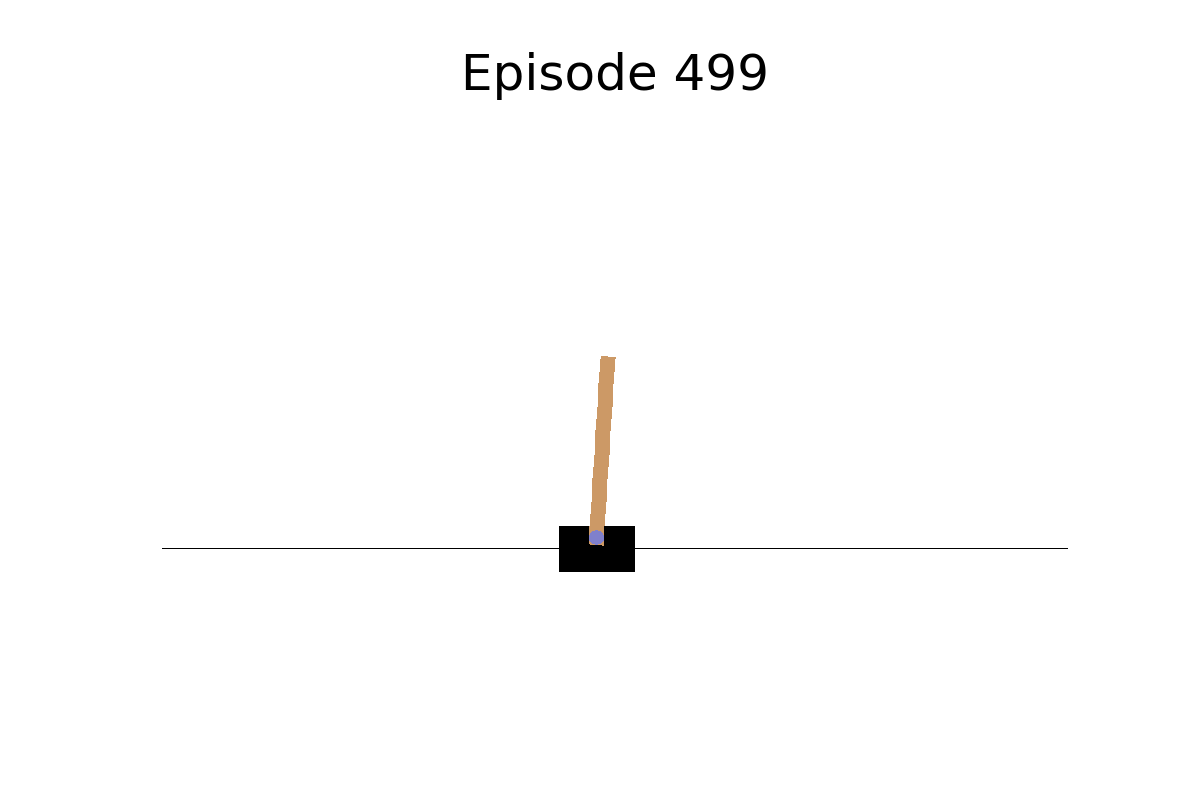
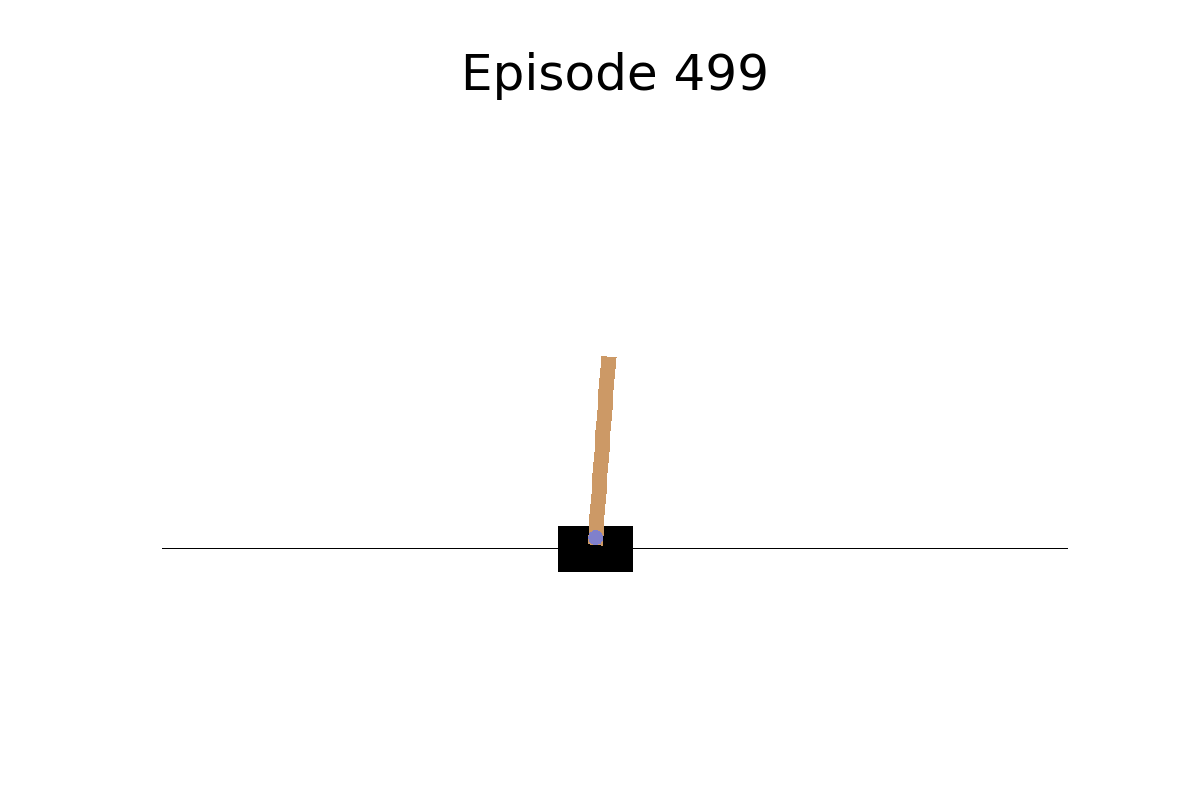
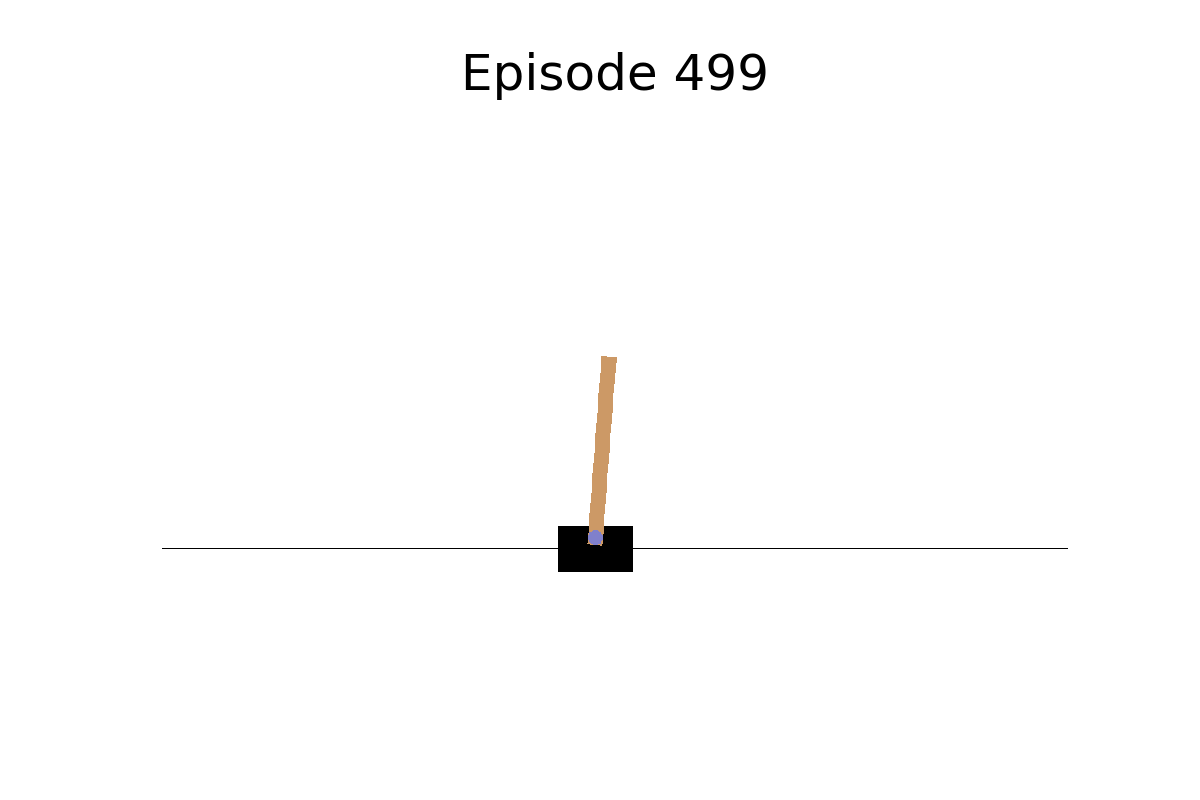
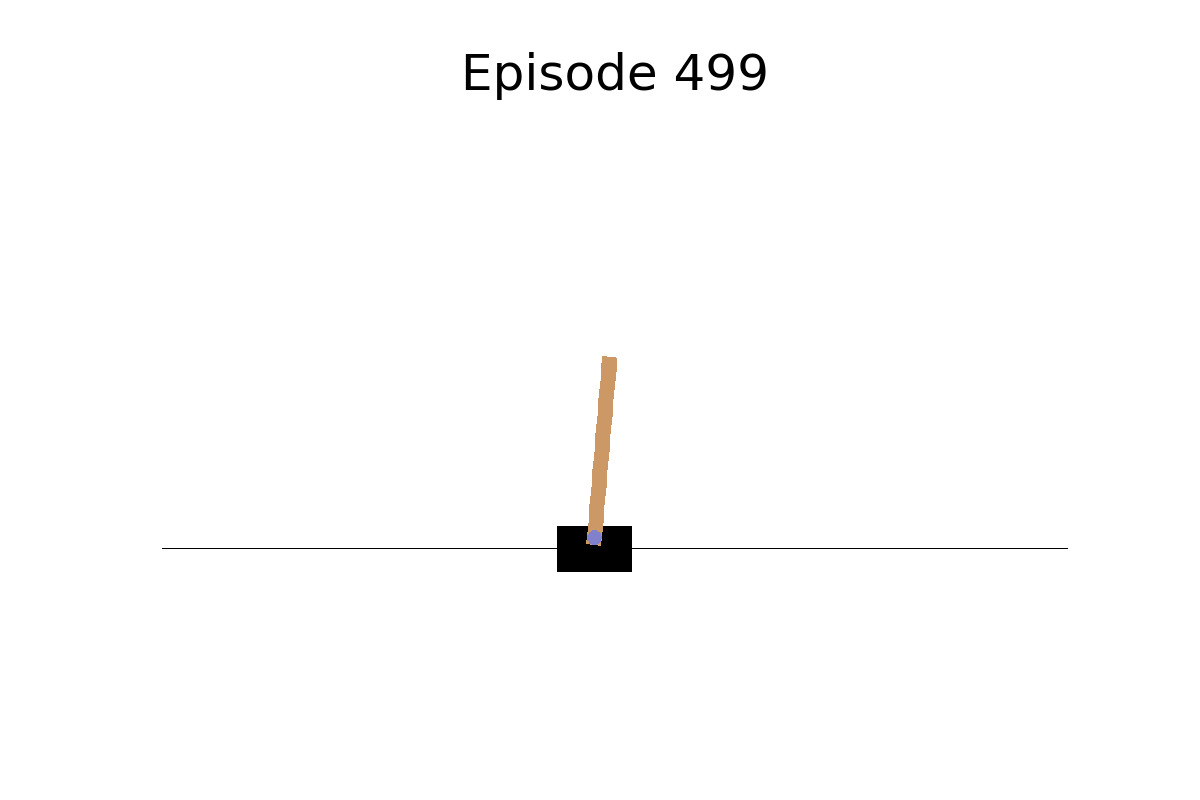
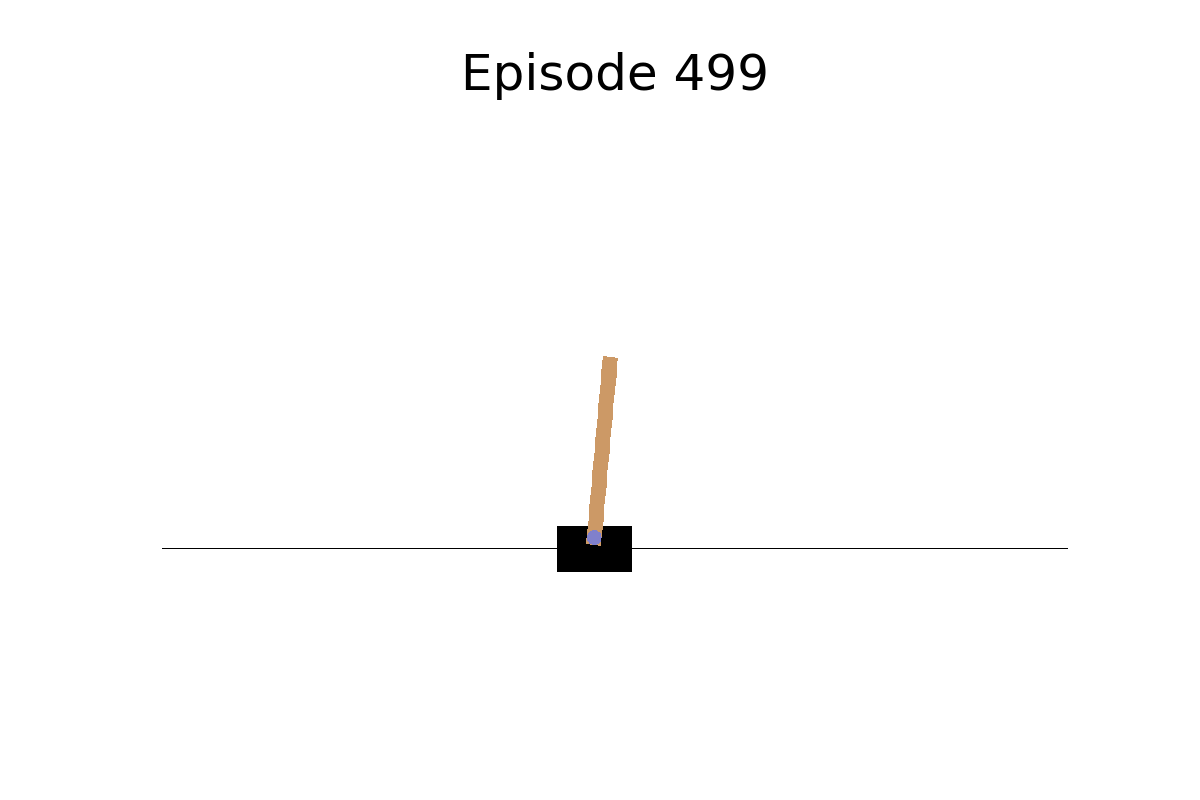
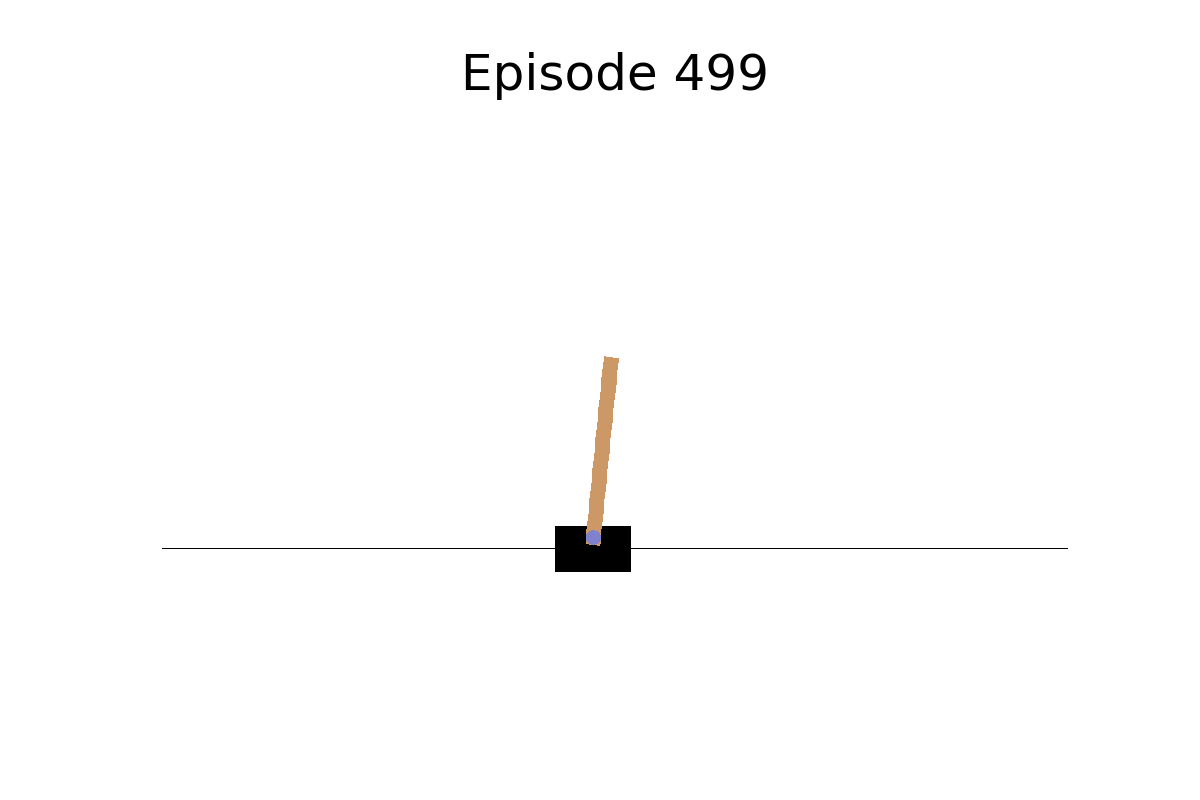
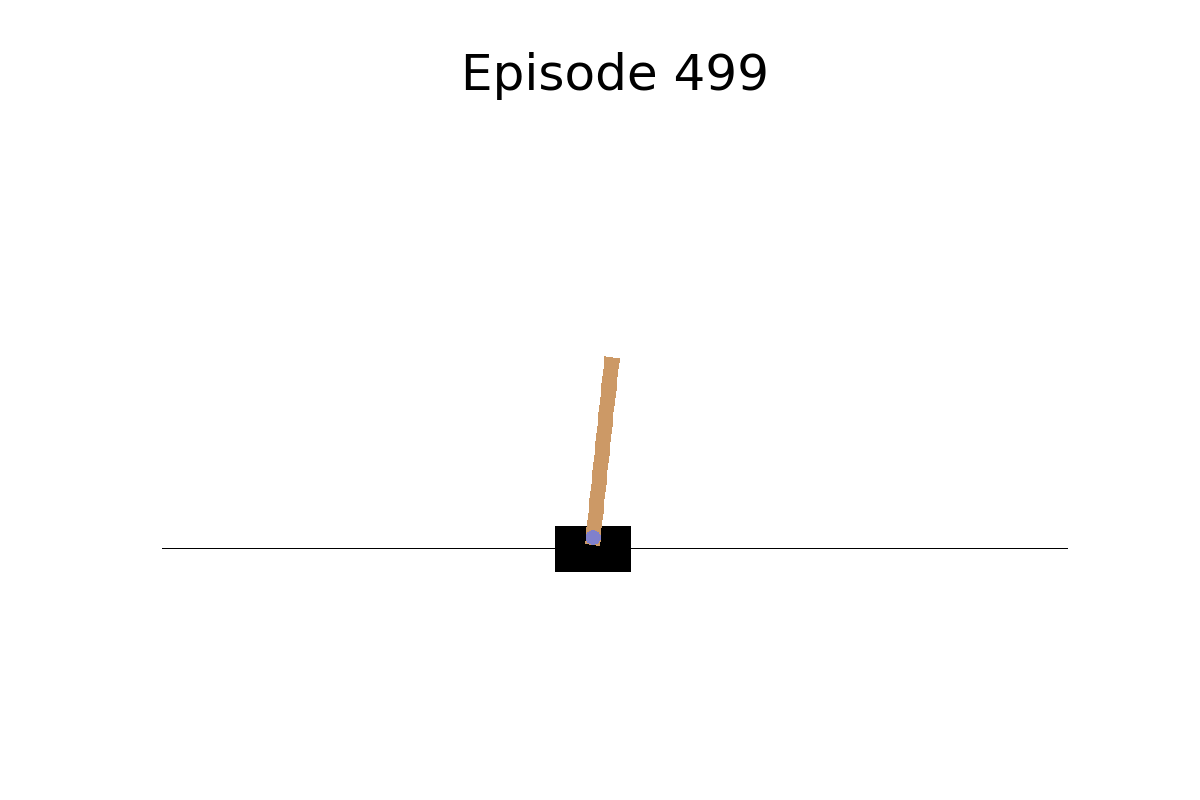
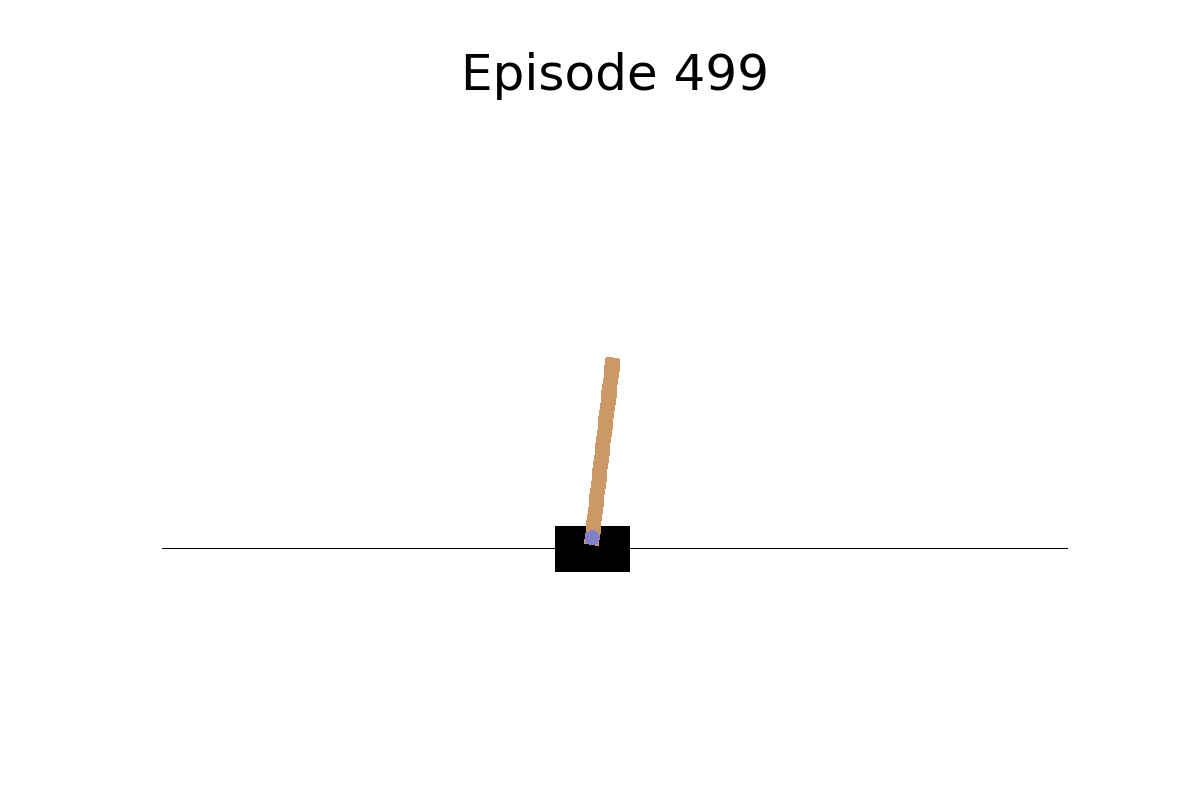
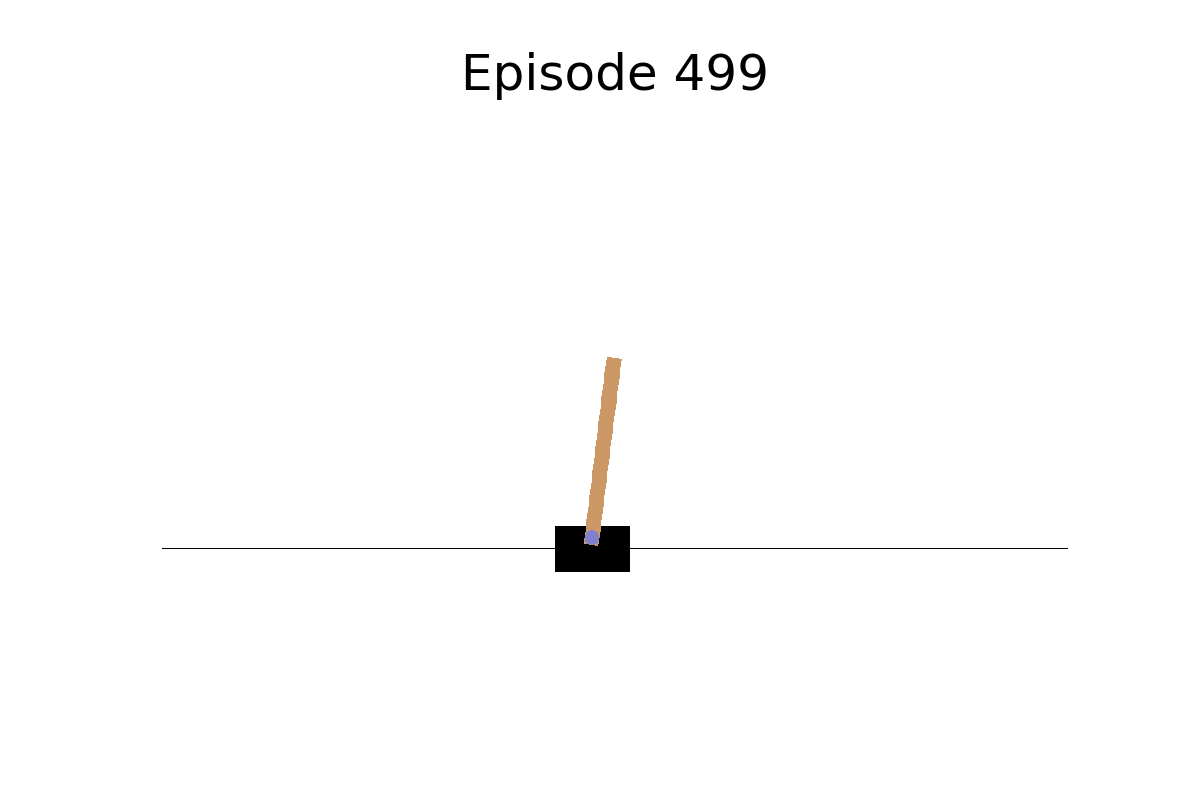
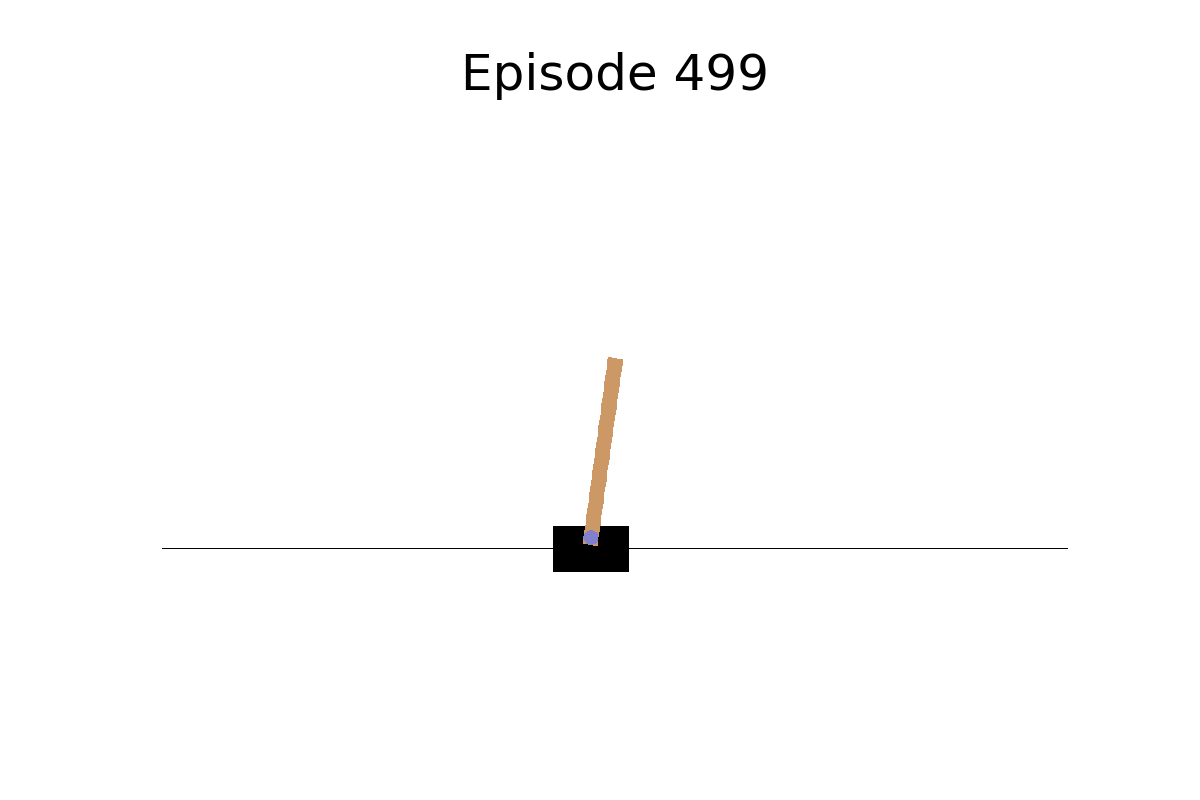
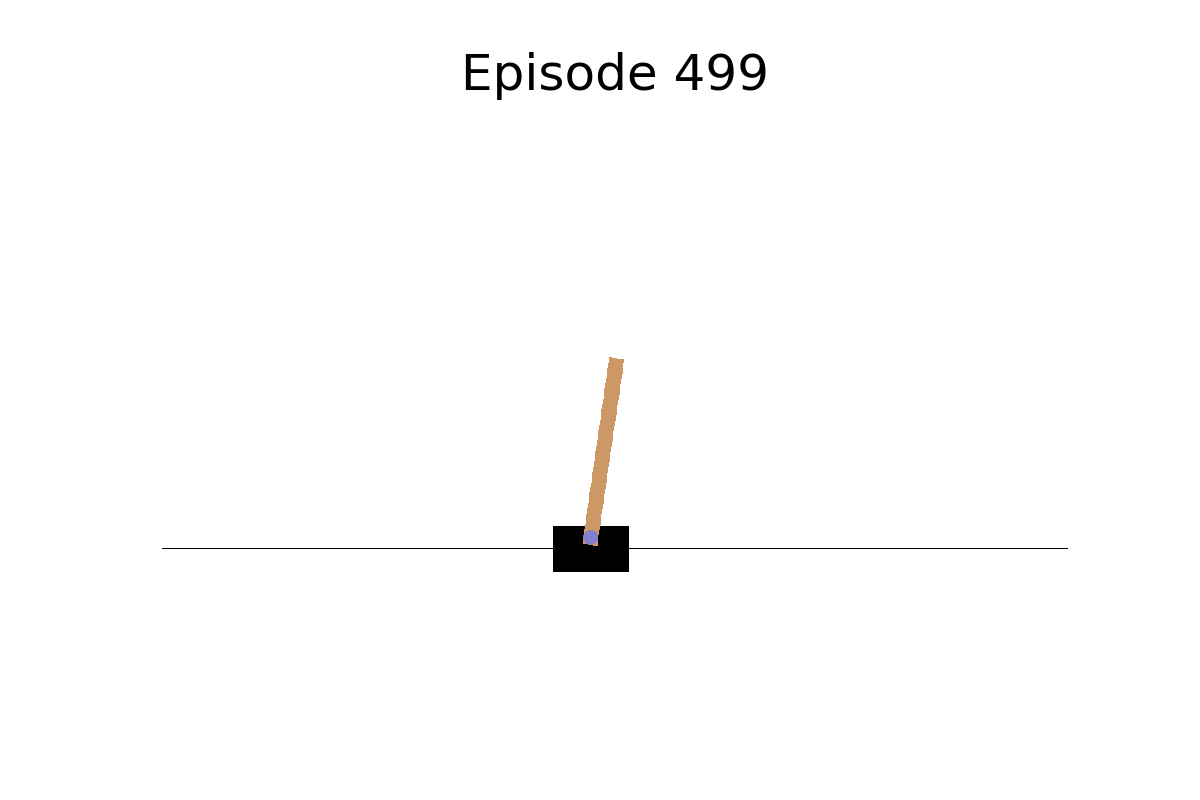
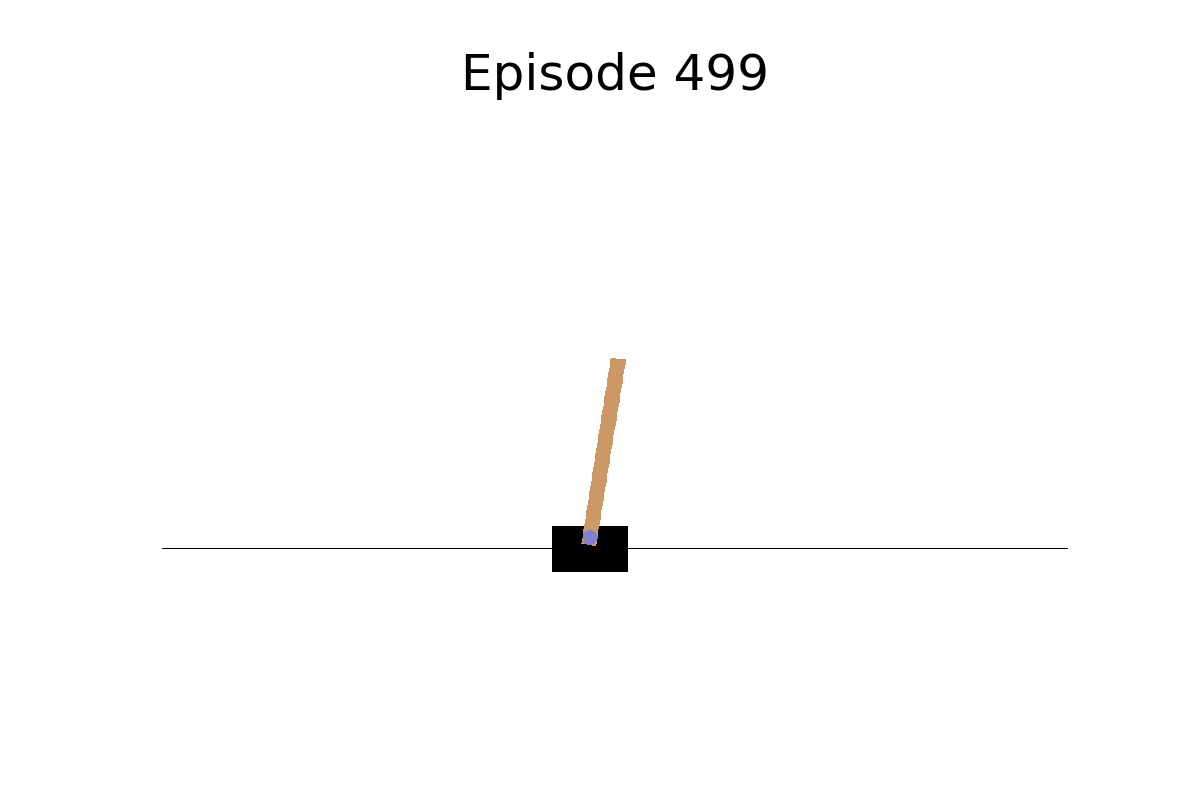
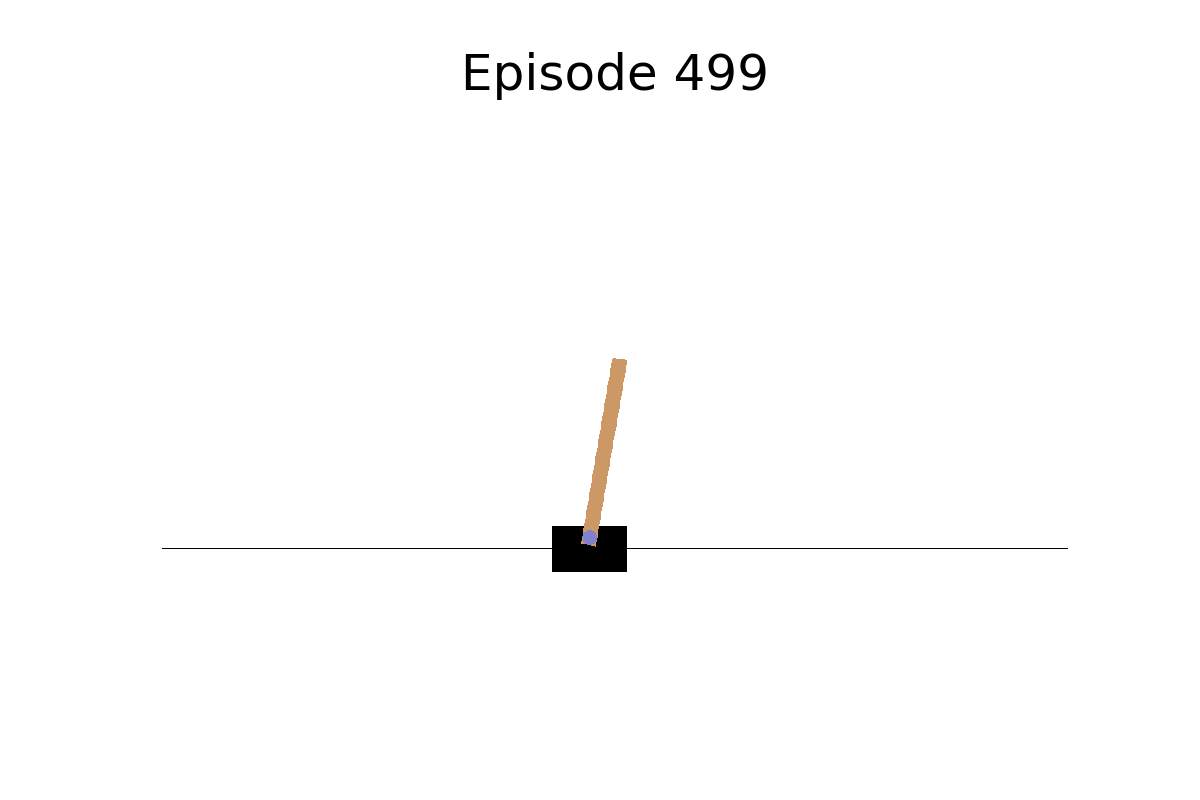
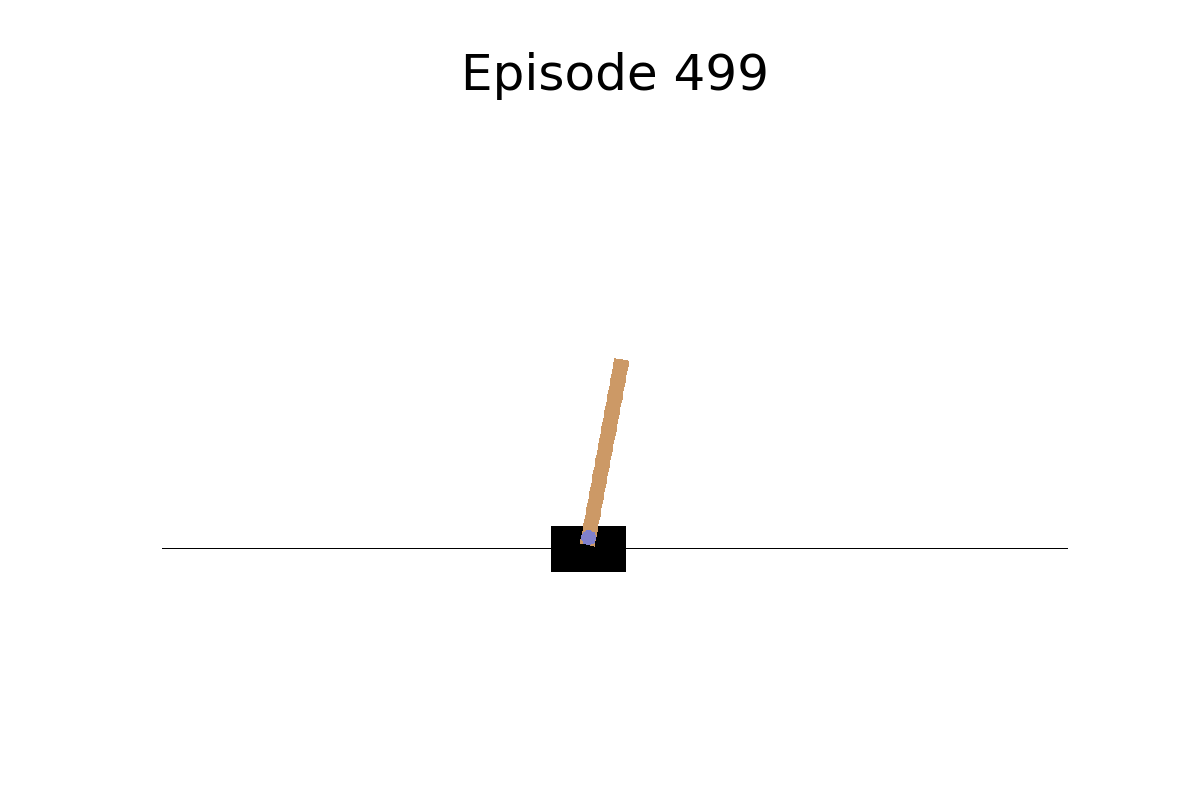
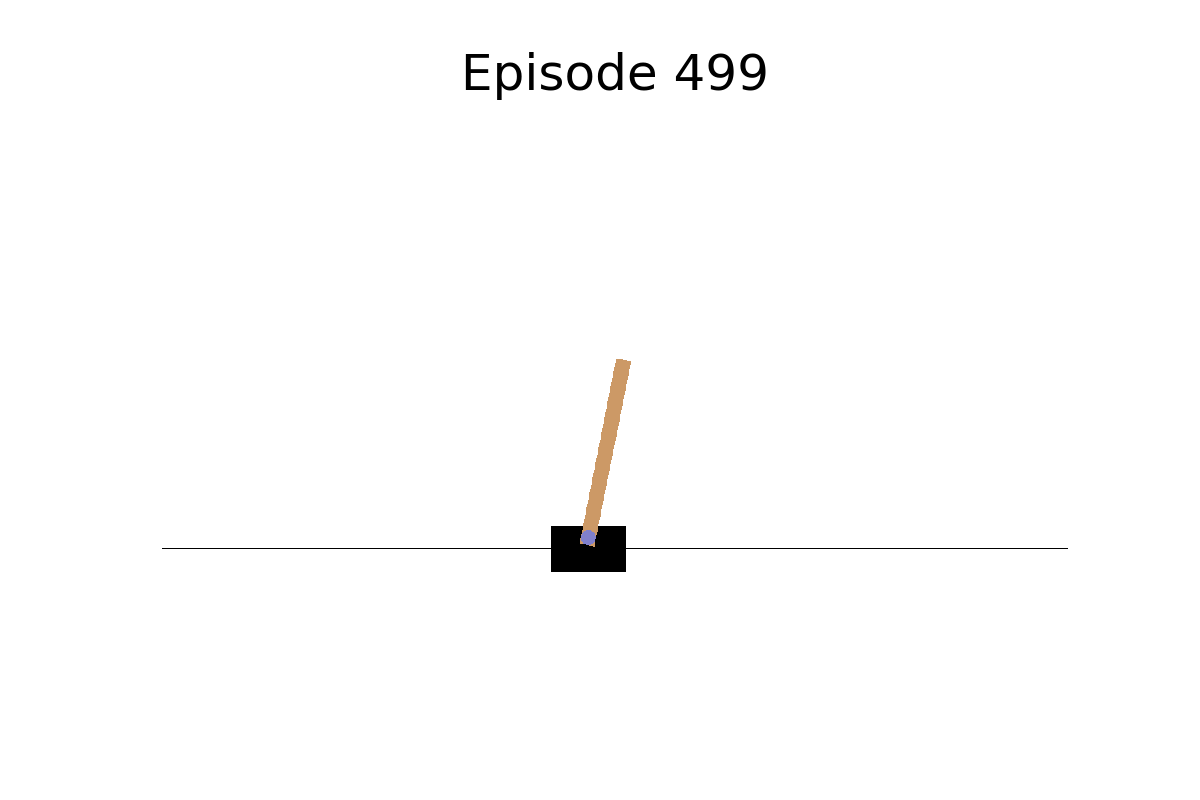
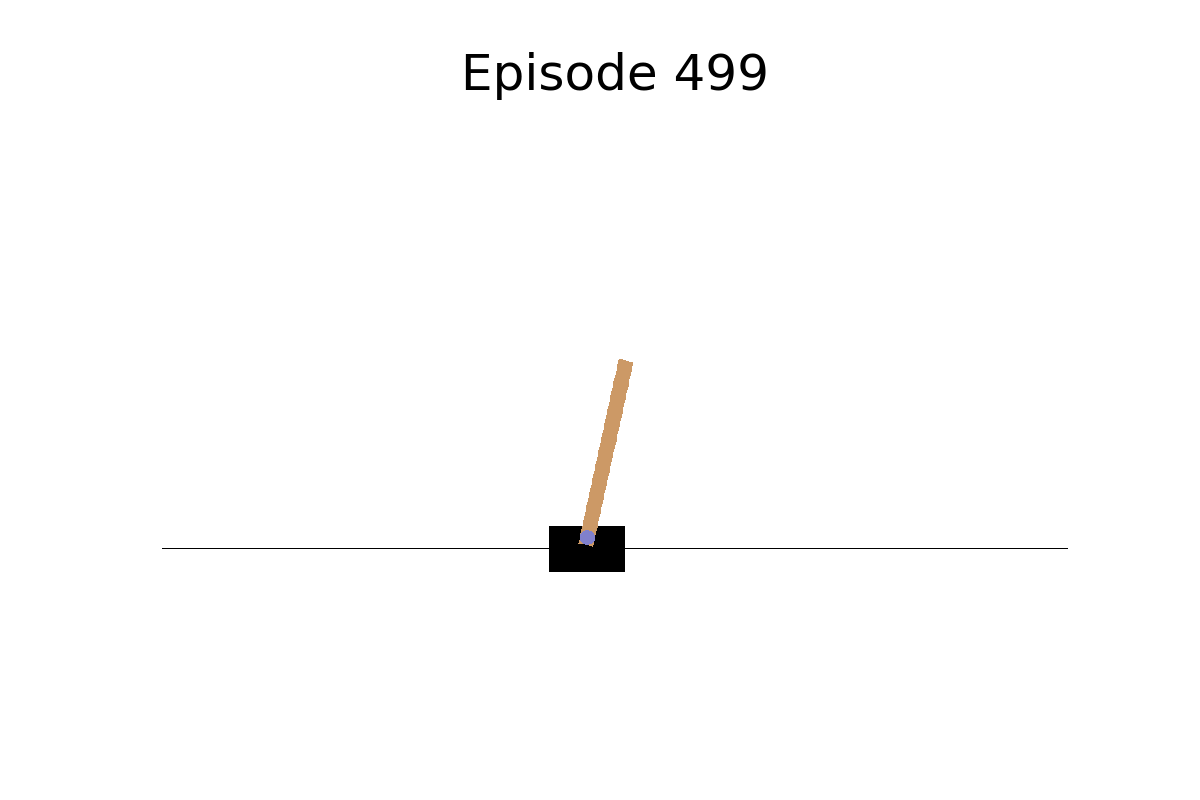

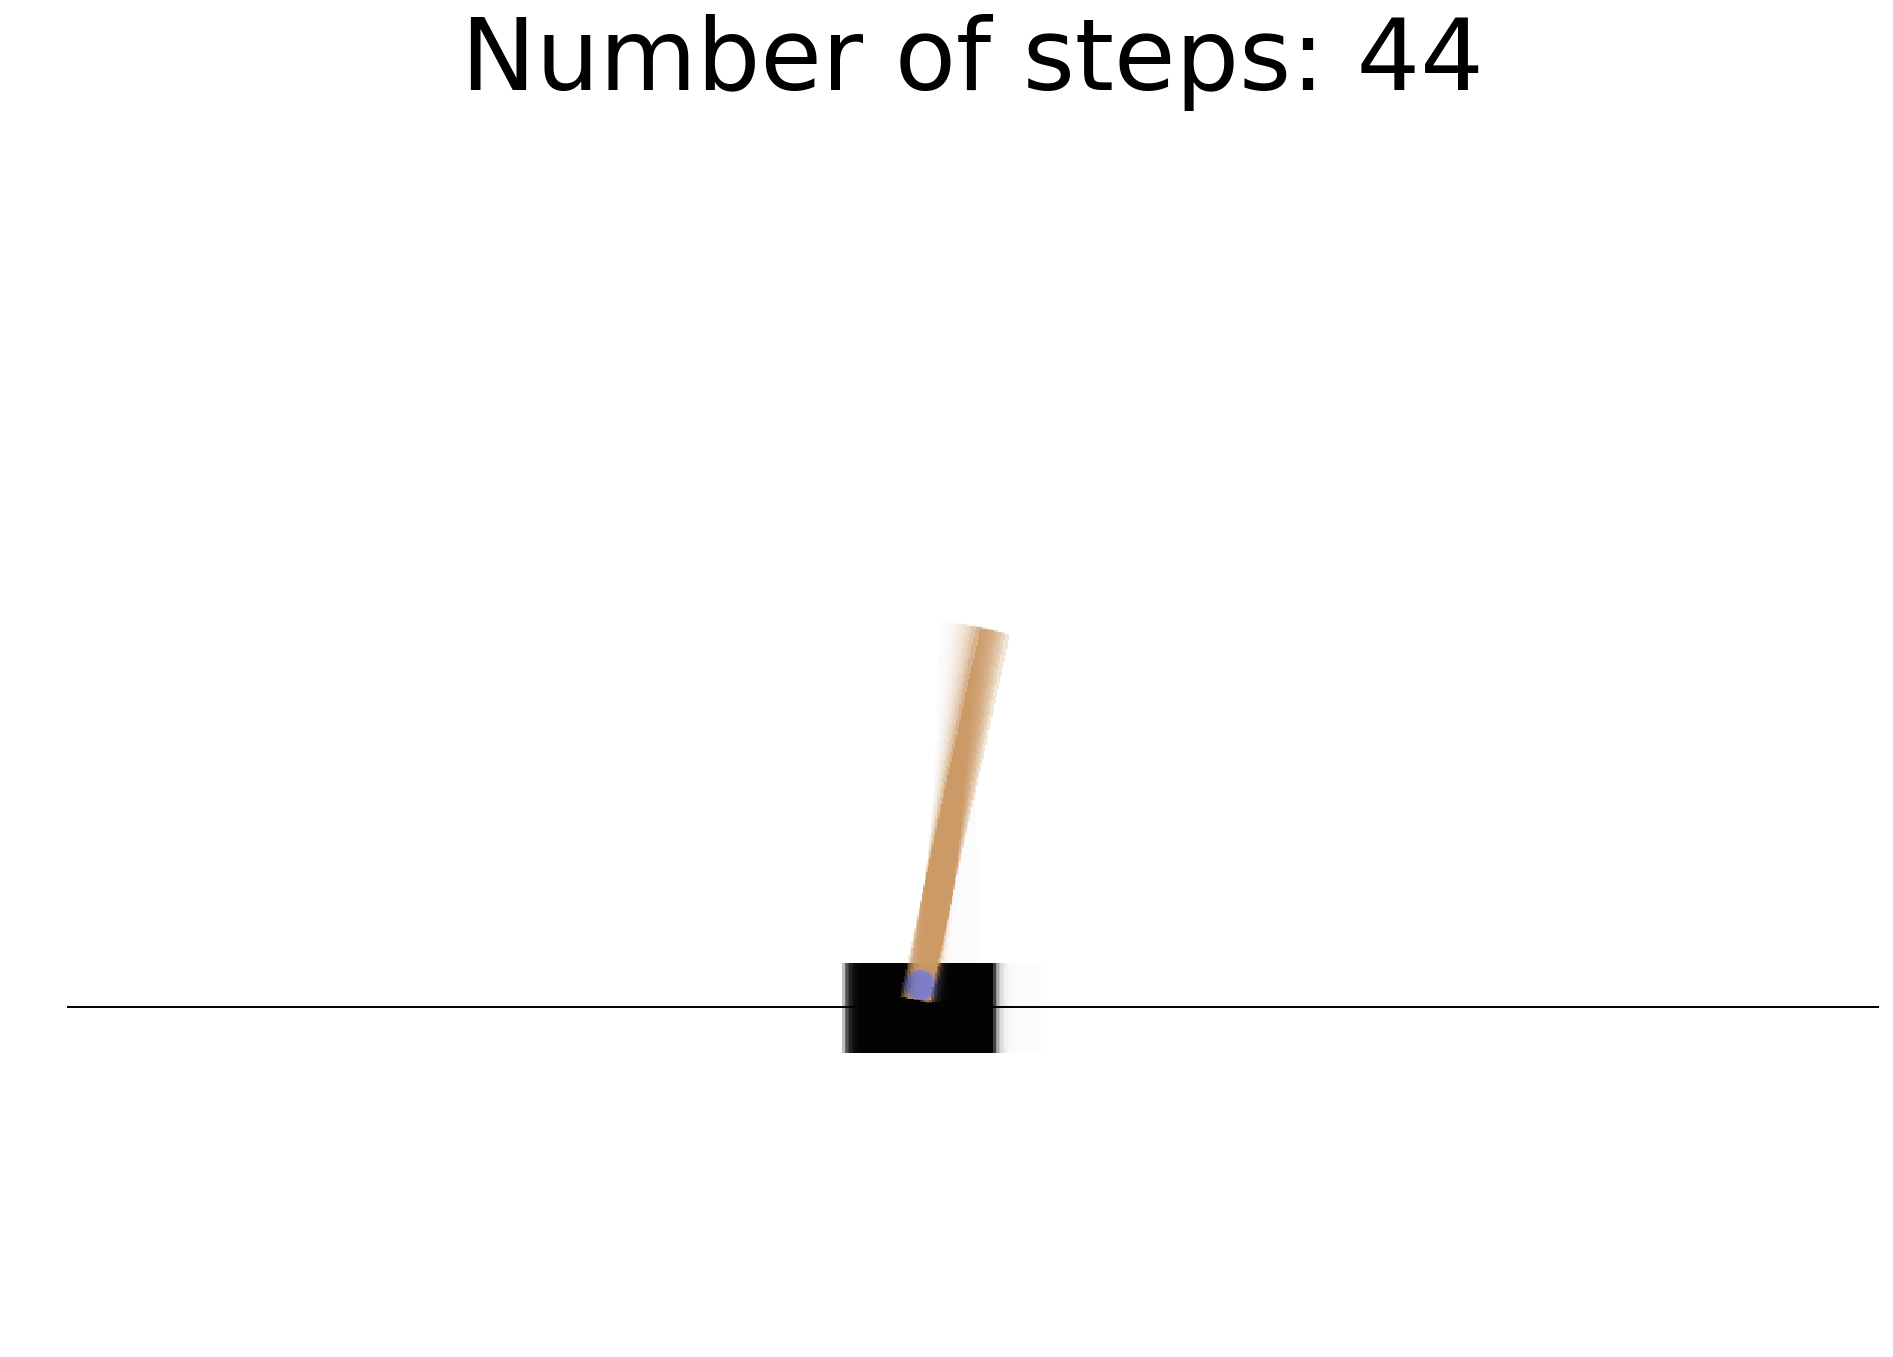

In [15]:
display_frames_as_gif(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

In [20]:
shadow_run[567]

{'actions': [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
 'states': [array([ 0.03926236, -0.20179164,  0.03274187,  0.26852928]),
  array([ 0.03522653, -0.39736518,  0.03811245,  0.57135676]),
  array([ 0.02727923, -0.20279783,  0.04953959,  0.29092001]),
  array([ 0.02322327, -0.39858987,  0.05535799,  0.59880645]),
  array([ 0.01525147, -0.20428438,  0.06733412,  0.32406162]),
  array([ 0.01116578, -0.40029726,  0.07381535,  0.63719595]),
  array([ 0.00315984, -0.20627809,  0.08655927,  0.36864171]),
  array([-0.00096572, -0.40251646,  0.0939321 ,  0.68731387]),
  array([-0.00901605, -0.20881518,  0.10767838,  0.42561826]),
  array([-0.01319236, -0.40528445,  0.11619075,  0.75021163]),
  array([-0.02129804, -0.60180088,  0.13119498,  1.07708202]),
  array([-0.03333406, -0.40863277,  0.15273662,  0.82828067]),
  array([-0.04150672, -0.60547605,  0.16930223,  1.16483841]),
  array([-0.05361624, -0.41291298,  0.192599  ,  0.92966096]),
  array([-0.0618745 , -0.61003943,  0.21119222,  

			*** Episode 10 at Total Seconds 1.981913***
                         Average Reward for last 10 steps: 18.700000
                         Average Reward for all steps: 18.090909
                         Epsilon: 0.7393994050663039, Frames Total :199
                         Solved 0 Times
                      
			*** Episode 20 at Total Seconds 2.967235***
                         Average Reward for last 10 steps: 18.400000
                         Average Reward for all steps: 18.238095
                         Epsilon: 0.6168134803645315, Frames Total :383
                         Solved 0 Times
                      
			*** Episode 30 at Total Seconds 3.788847***
                         Average Reward for last 10 steps: 13.800000
                         Average Reward for all steps: 16.806452
                         Epsilon: 0.5385944288792581, Frames Total :521
                         Solved 0 Times
                      
			*** Episode 40 at Total Seconds 4.652504***
     

			*** Episode 270 at Total Seconds 44.089573***
                         Average Reward for last 10 steps: 21.800000
                         Average Reward for all steps: 16.918819
                         Epsilon: 0.01908133731109645, Frames Total :4585
                         Solved 0 Times
                      
			*** Episode 280 at Total Seconds 45.323091***
                         Average Reward for last 10 steps: 10.100000
                         Average Reward for all steps: 16.676157
                         Epsilon: 0.018208920778278976, Frames Total :4686
                         Solved 0 Times
                      
			*** Episode 290 at Total Seconds 48.424301***
                         Average Reward for last 10 steps: 25.400000
                         Average Reward for all steps: 16.975945
                         Epsilon: 0.016367592551359975, Frames Total :4940
                         Solved 0 Times
                      
			*** Episode 300 at Total Seconds 50

			*** Episode 530 at Total Seconds 130.664086***
                         Average Reward for last 10 steps: 35.200000
                         Average Reward for all steps: 20.551789
                         Epsilon: 0.010016215648644577, Frames Total :10913
                         Solved 0 Times
                      
			*** Episode 540 at Total Seconds 135.244150***
                         Average Reward for last 10 steps: 32.400000
                         Average Reward for all steps: 20.770795
                         Epsilon: 0.010011727971812536, Frames Total :11237
                         Solved 0 Times
                      
			*** Episode 550 at Total Seconds 141.142021***
                         Average Reward for last 10 steps: 39.500000
                         Average Reward for all steps: 21.110708
                         Epsilon: 0.01000790090051098, Frames Total :11632
                         Solved 0 Times
                      
			*** Episode 560 at Total Seco

			*** Episode 790 at Total Seconds 248.485523***
                         Average Reward for last 10 steps: 21.800000
                         Average Reward for all steps: 24.096081
                         Epsilon: 0.010000004696098326, Frames Total :19060
                         Solved 0 Times
                      
			*** Episode 800 at Total Seconds 252.879911***
                         Average Reward for last 10 steps: 35.200000
                         Average Reward for all steps: 24.234707
                         Epsilon: 0.010000003302672604, Frames Total :19412
                         Solved 0 Times
                      
			*** Episode 810 at Total Seconds 257.007150***
                         Average Reward for last 10 steps: 34.400000
                         Average Reward for all steps: 24.360049
                         Epsilon: 0.01000000234136015, Frames Total :19756
                         Solved 0 Times
                      
			*** Episode 820 at Total Seco

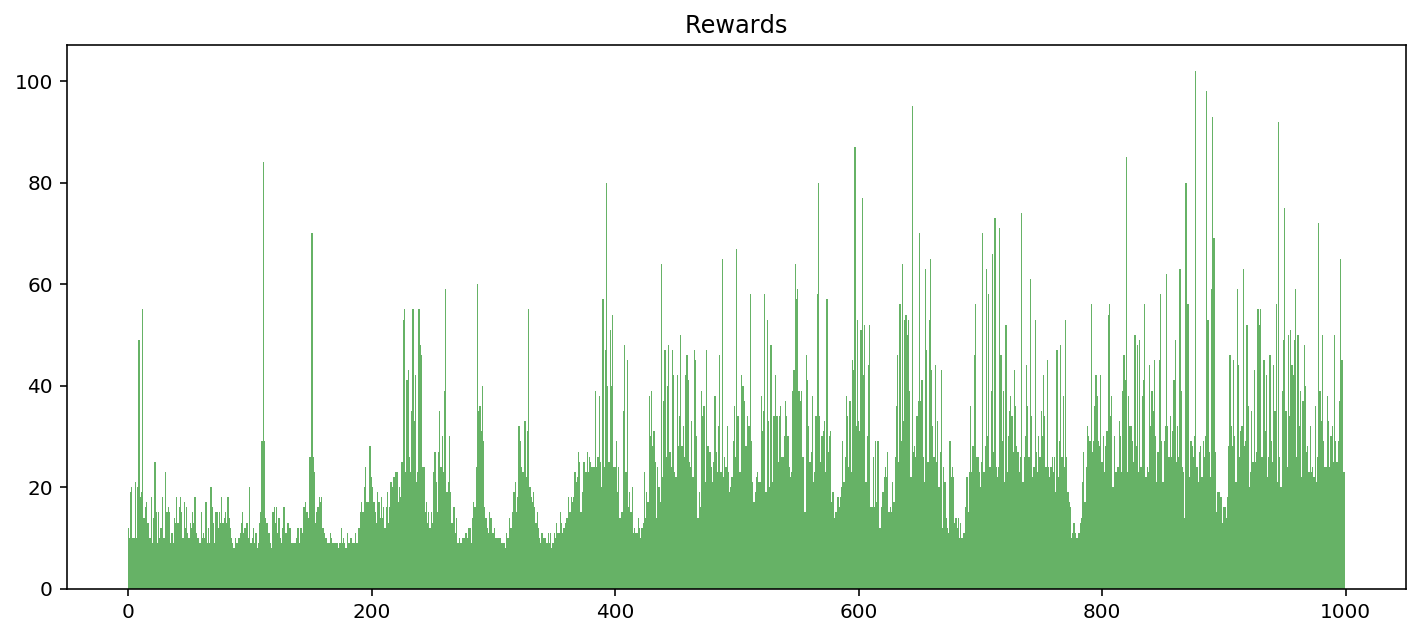


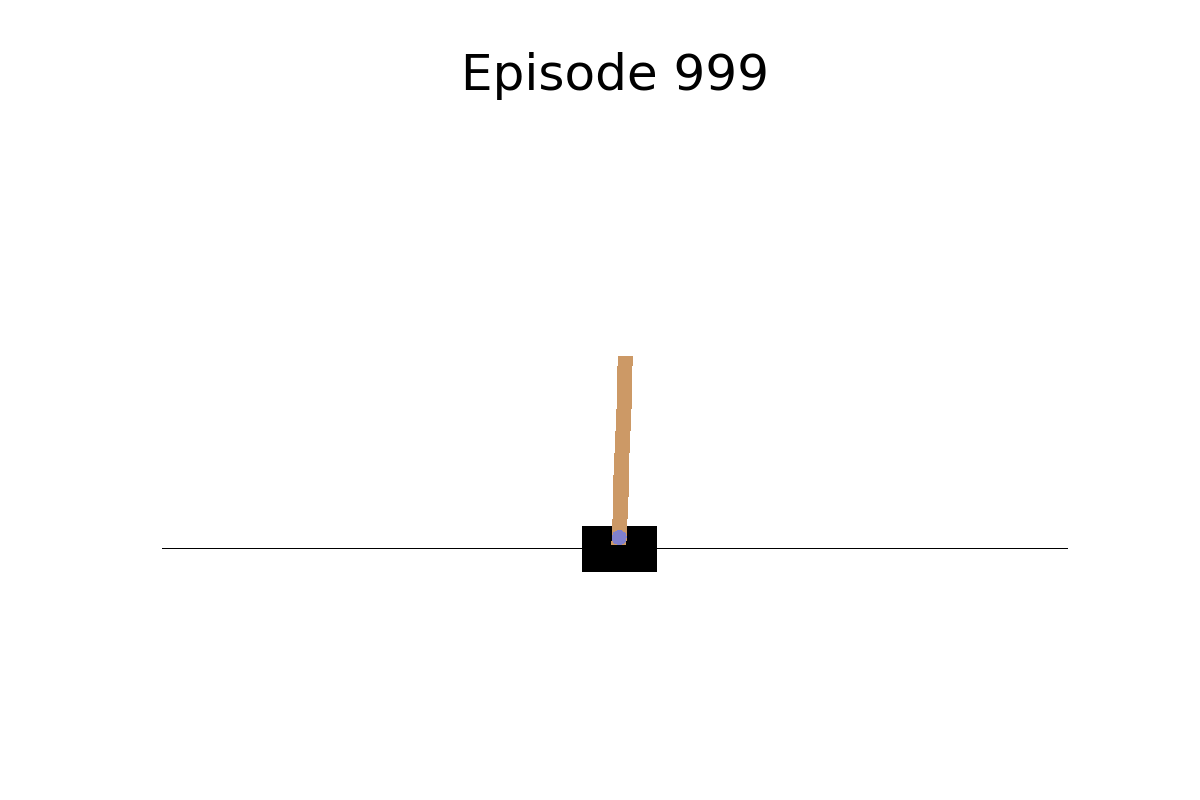
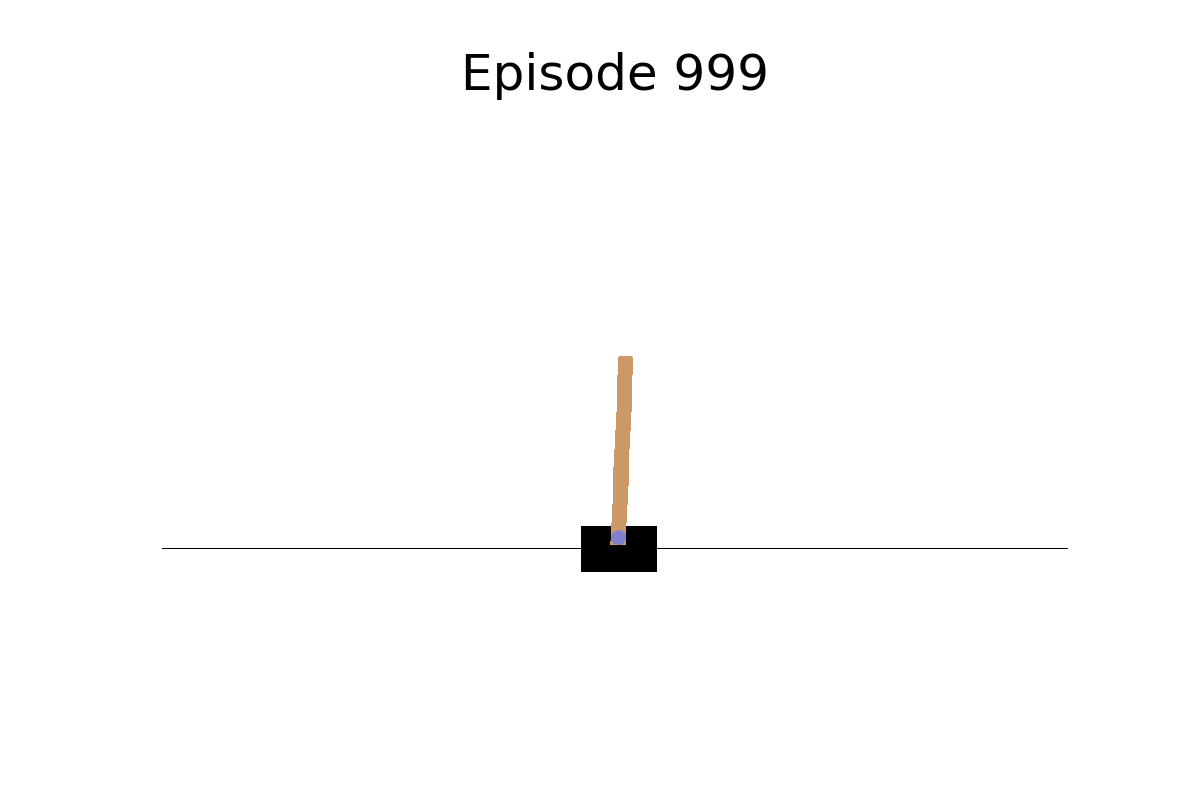
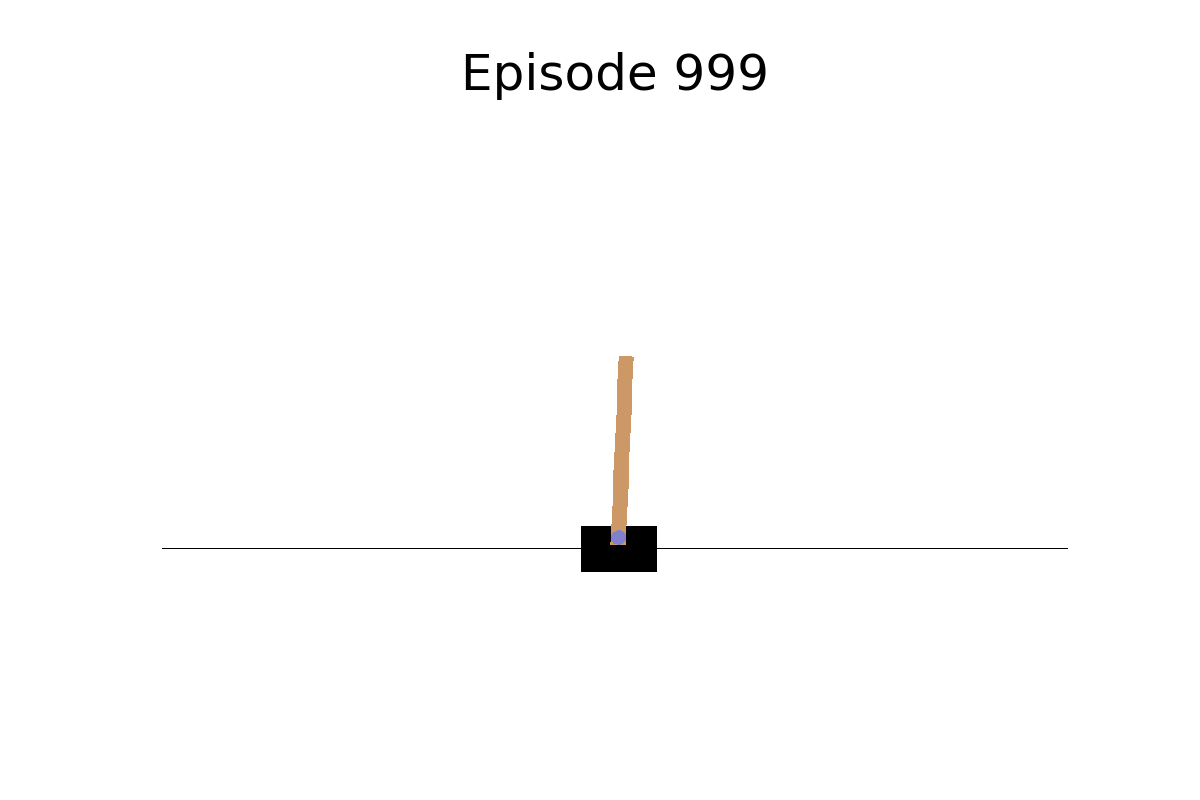
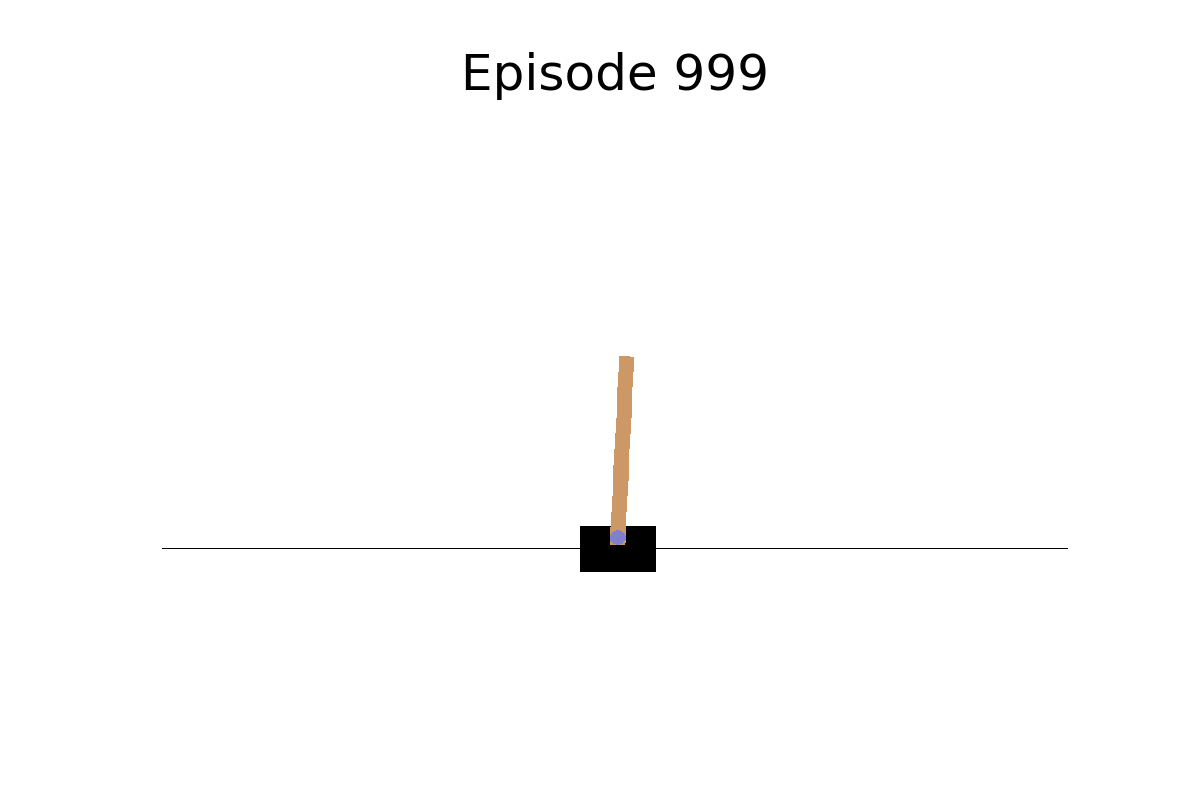
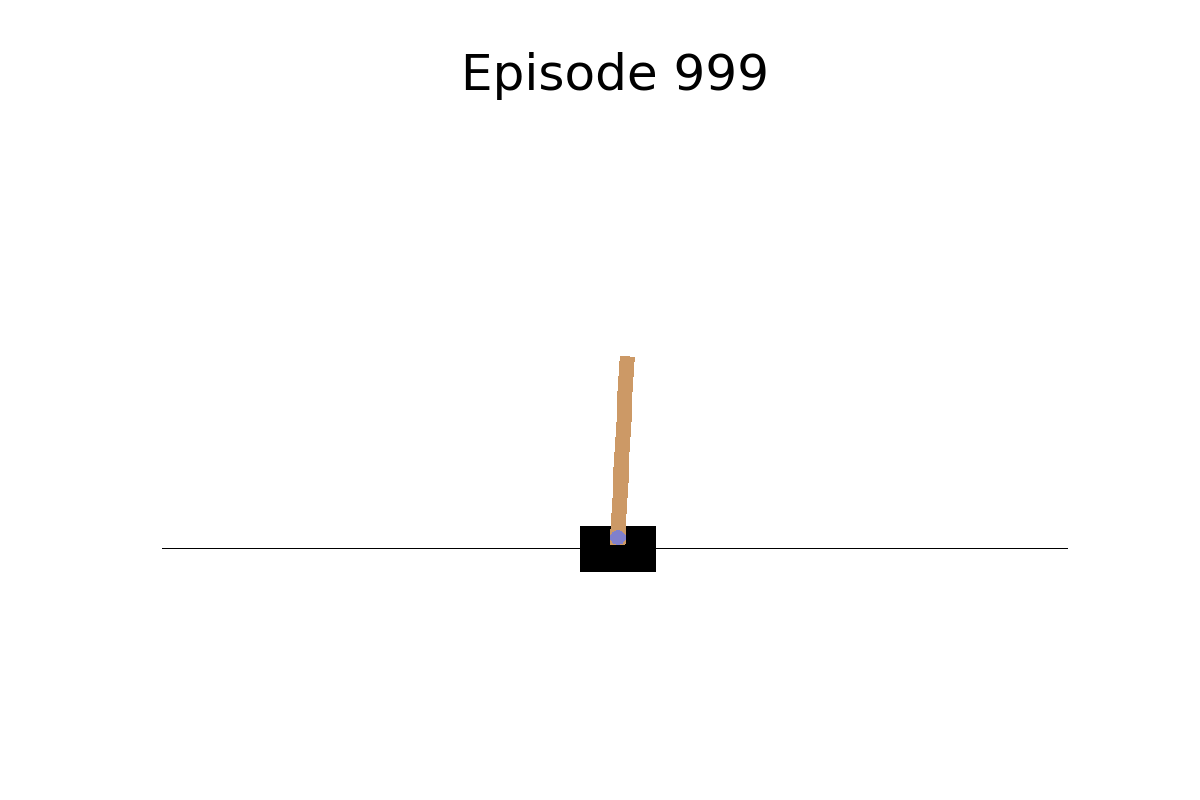
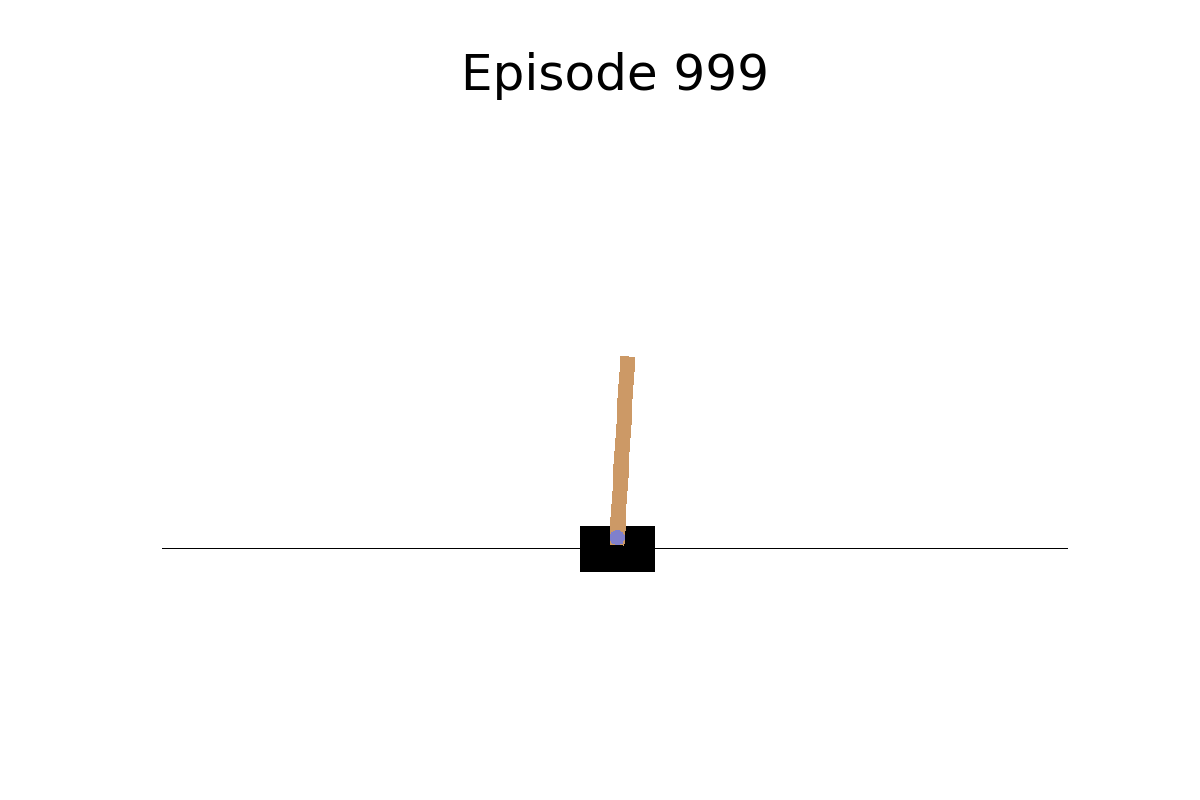
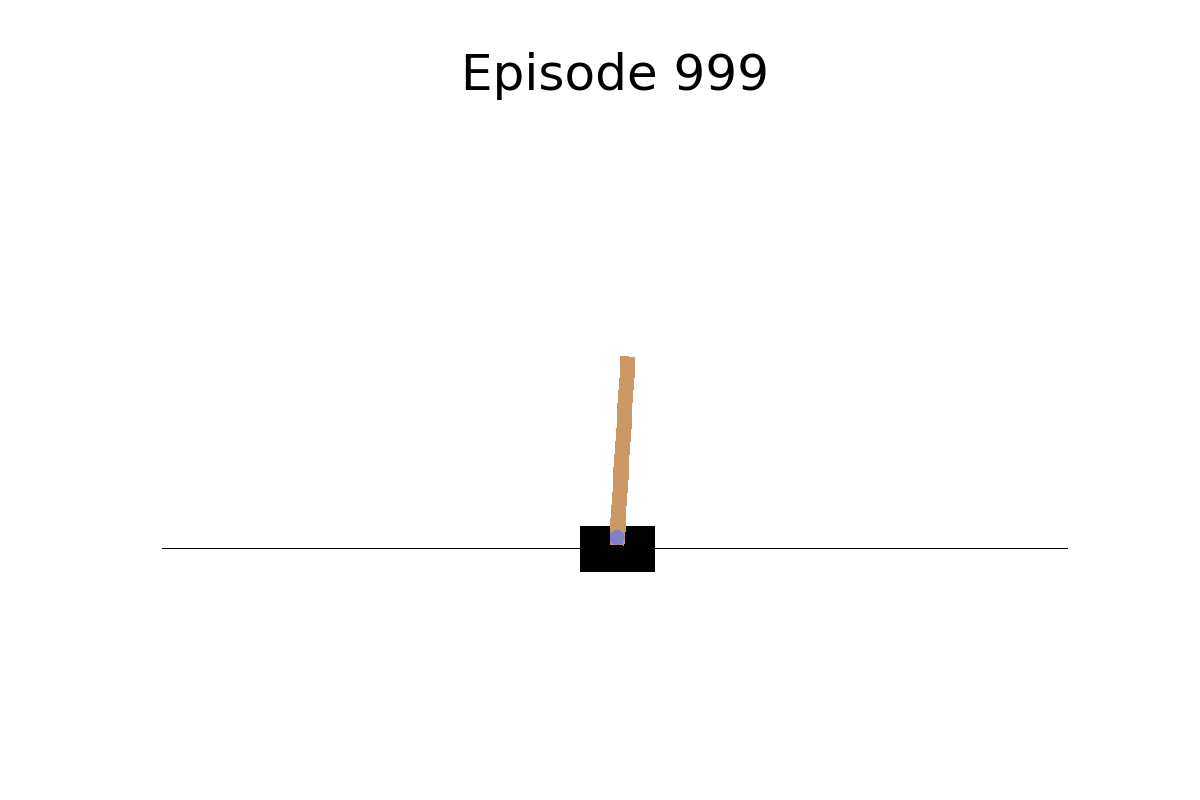
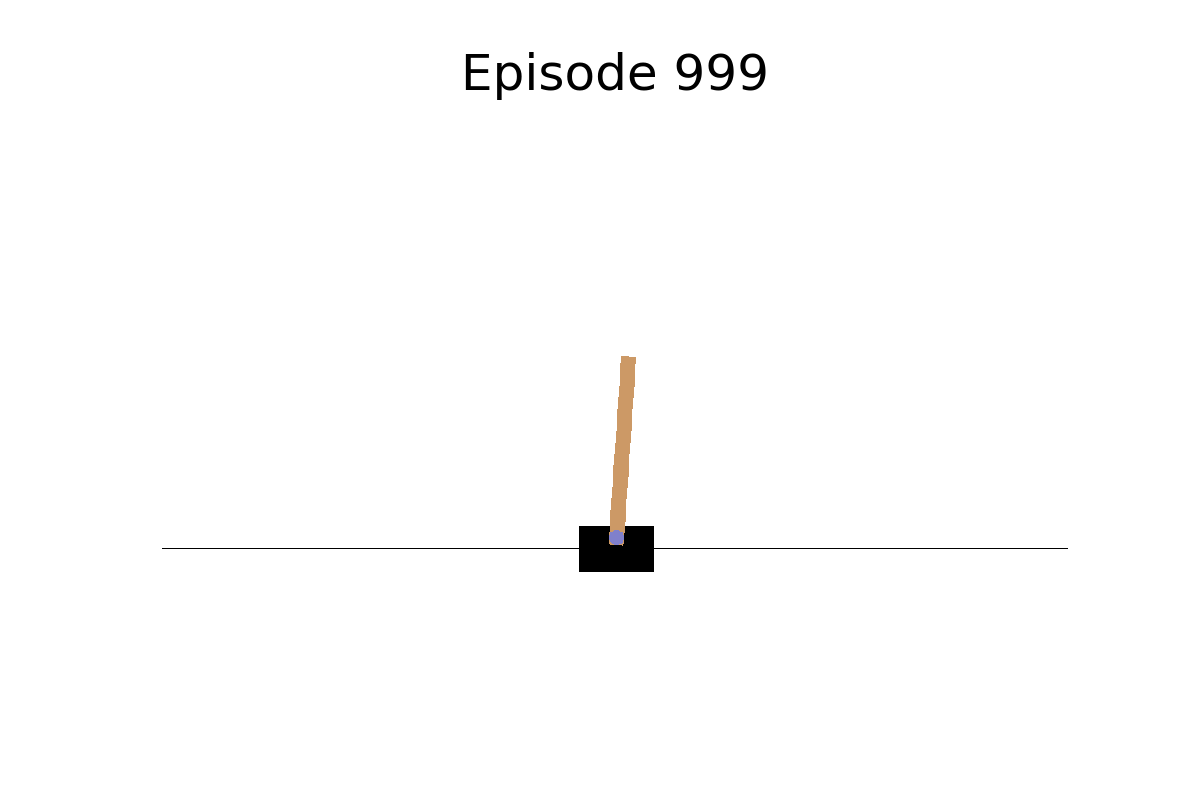
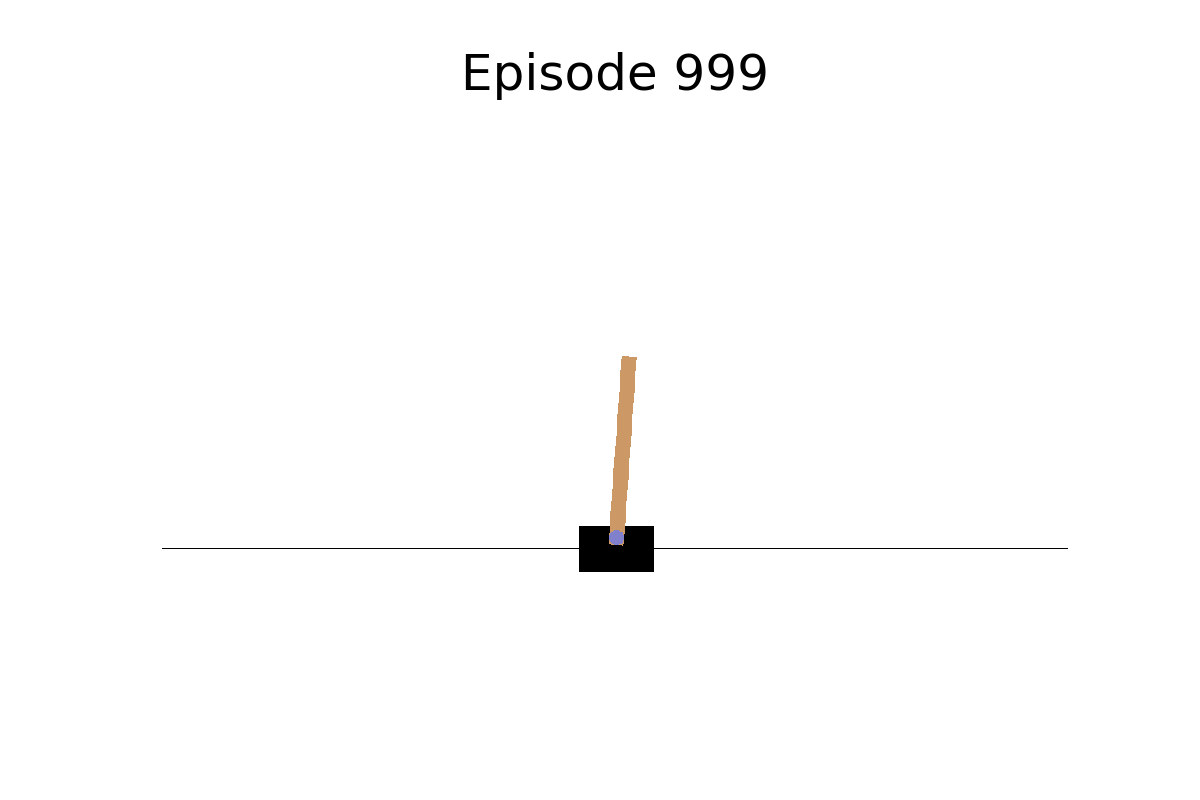
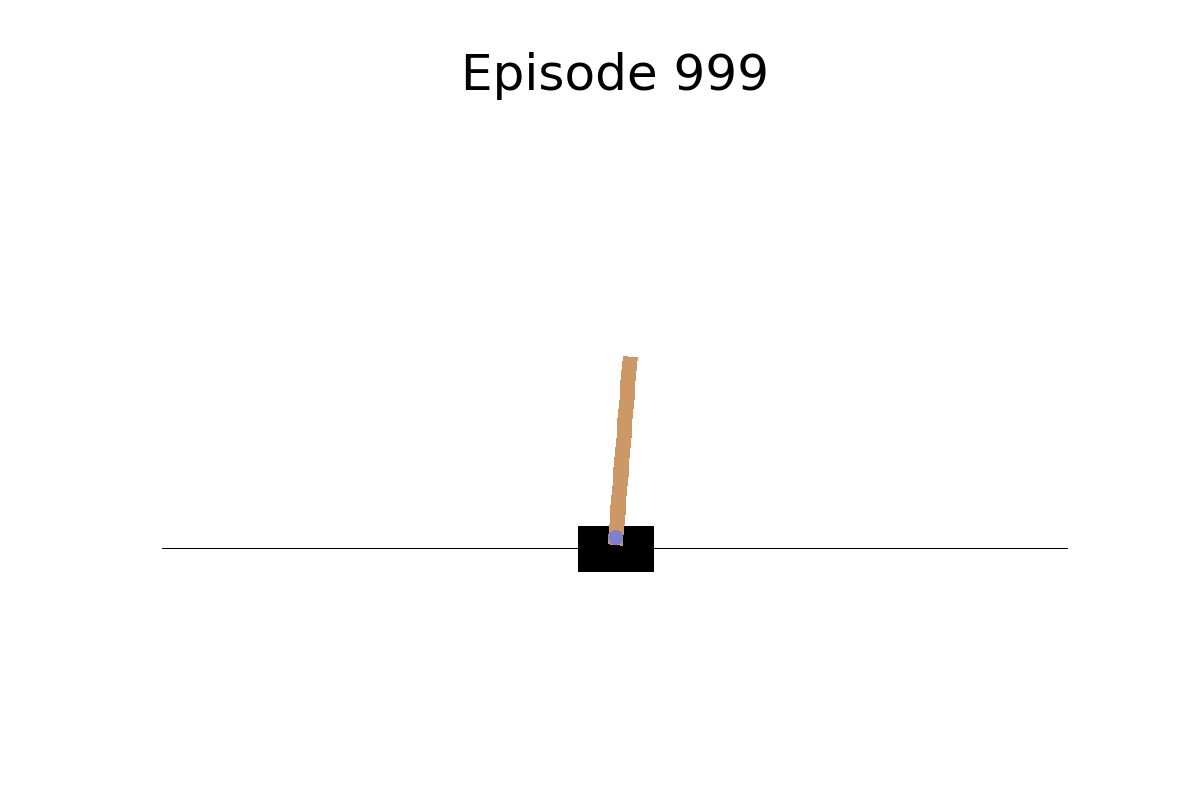
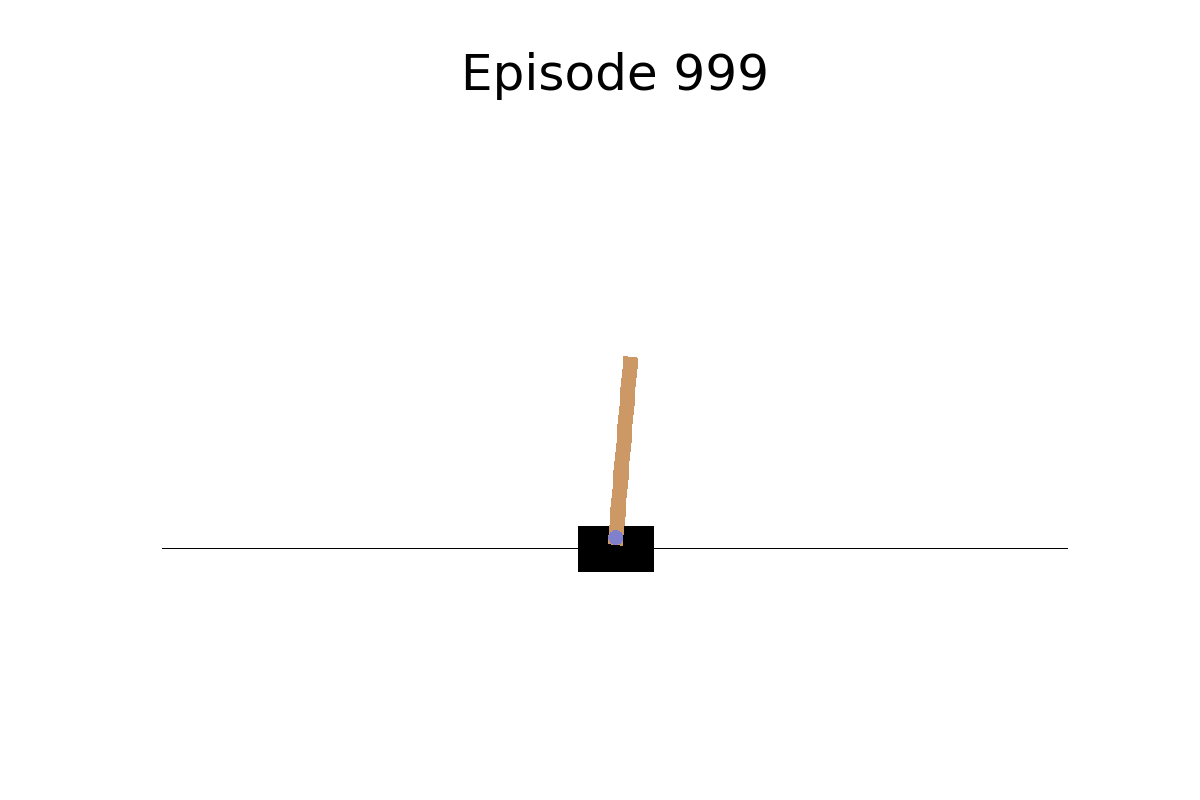
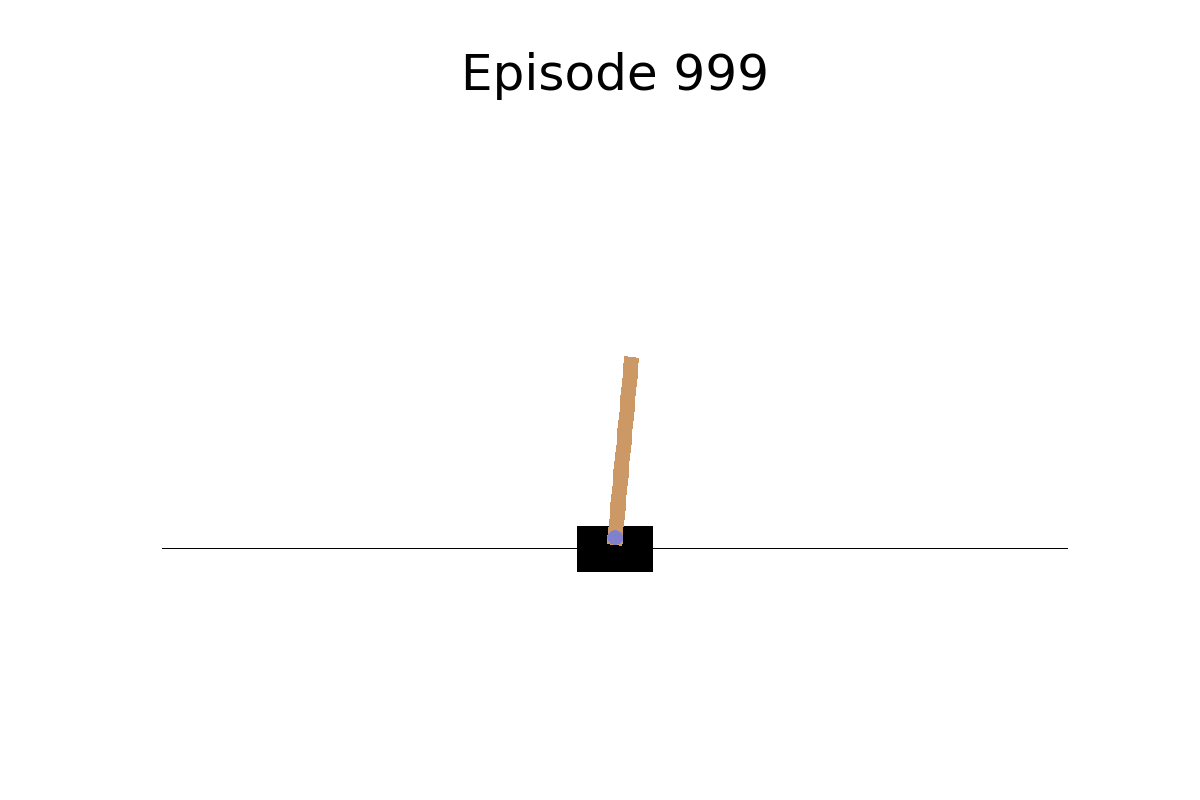
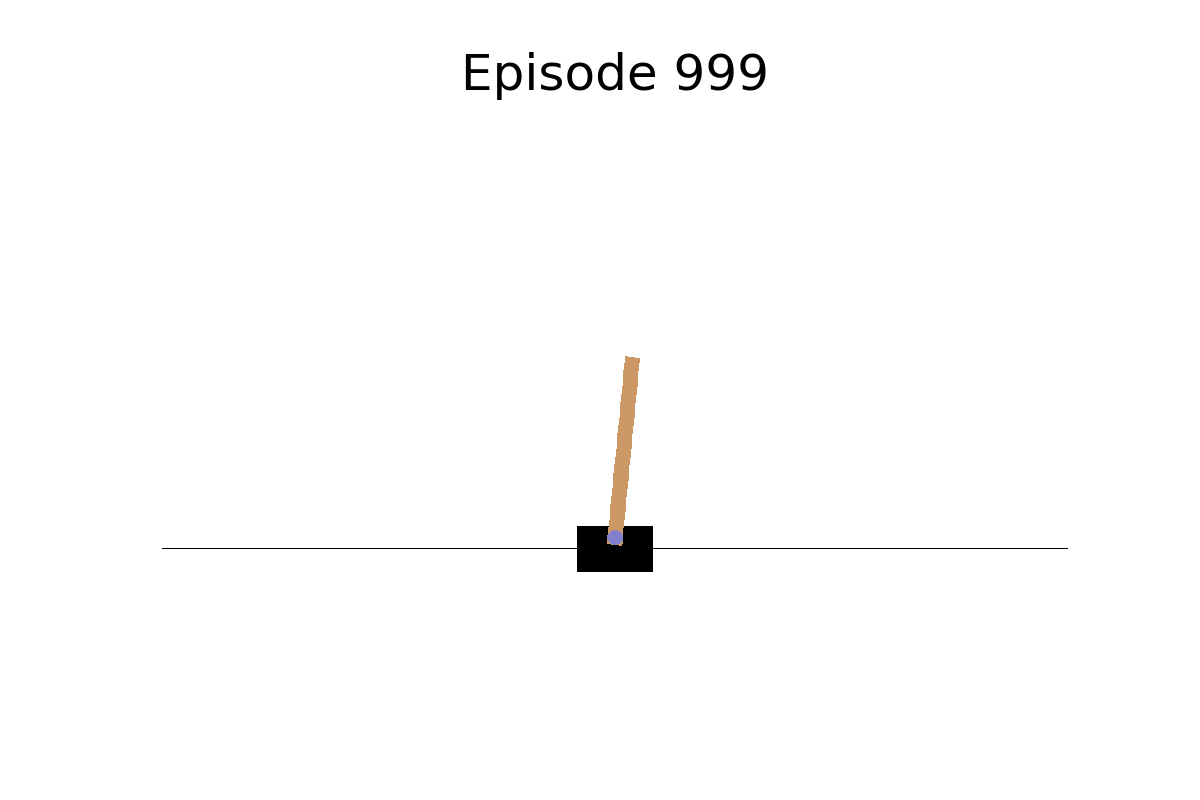
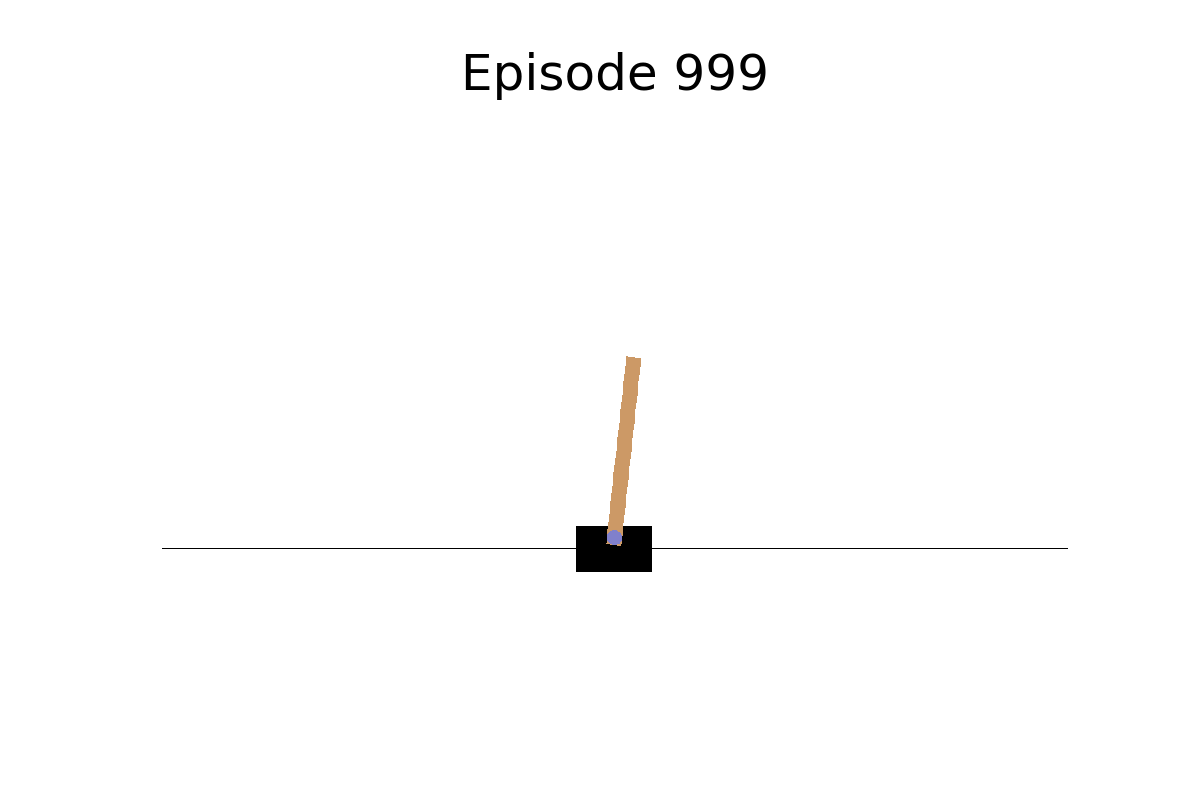
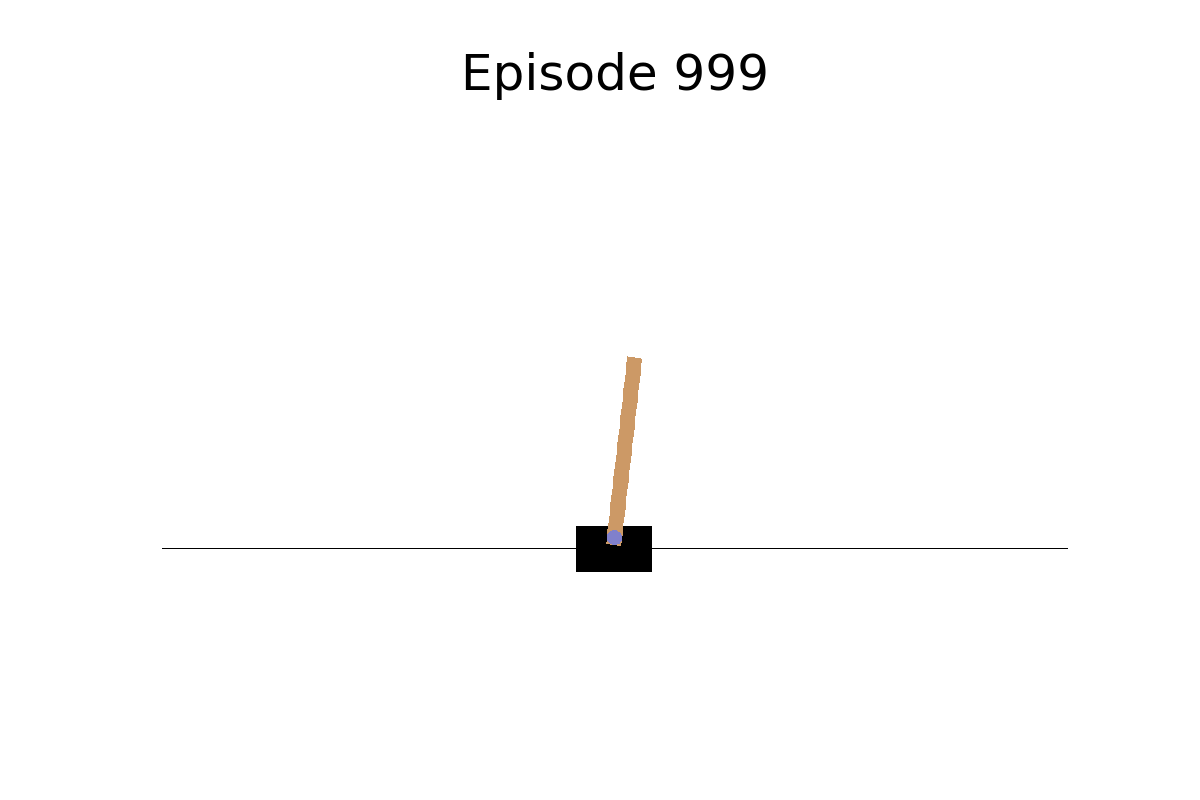
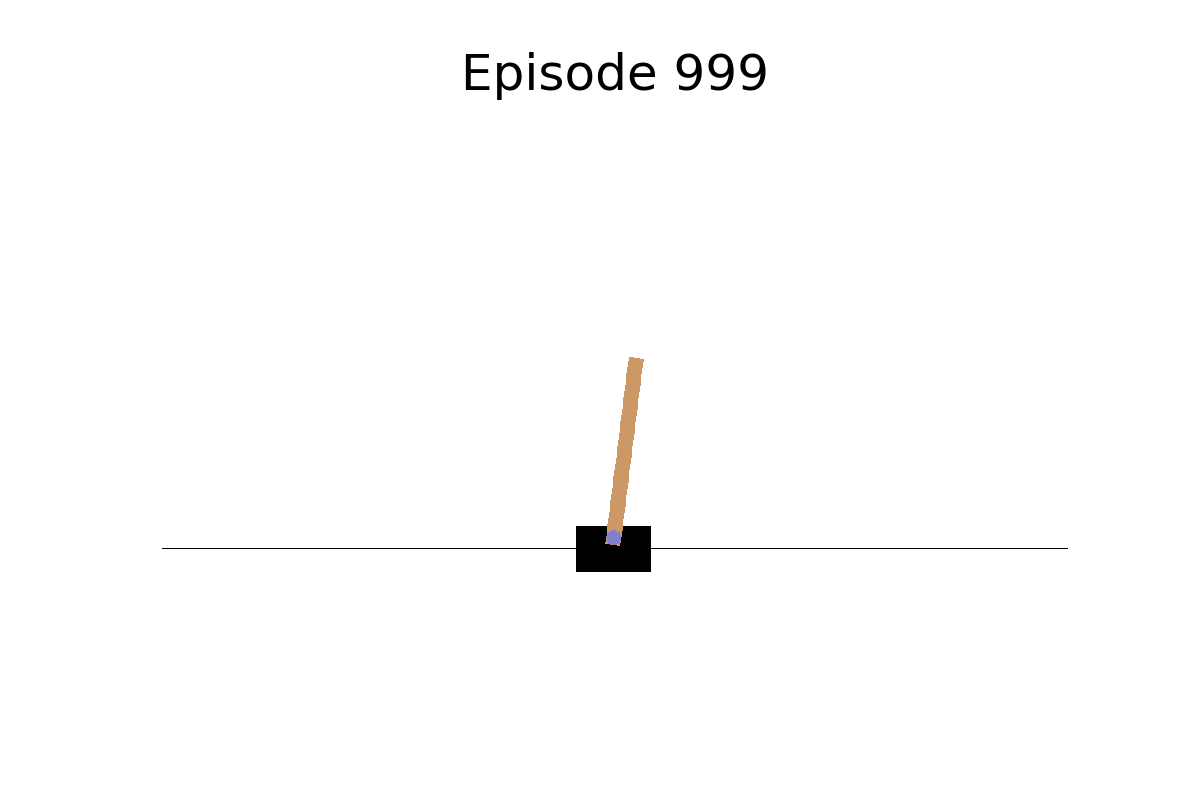
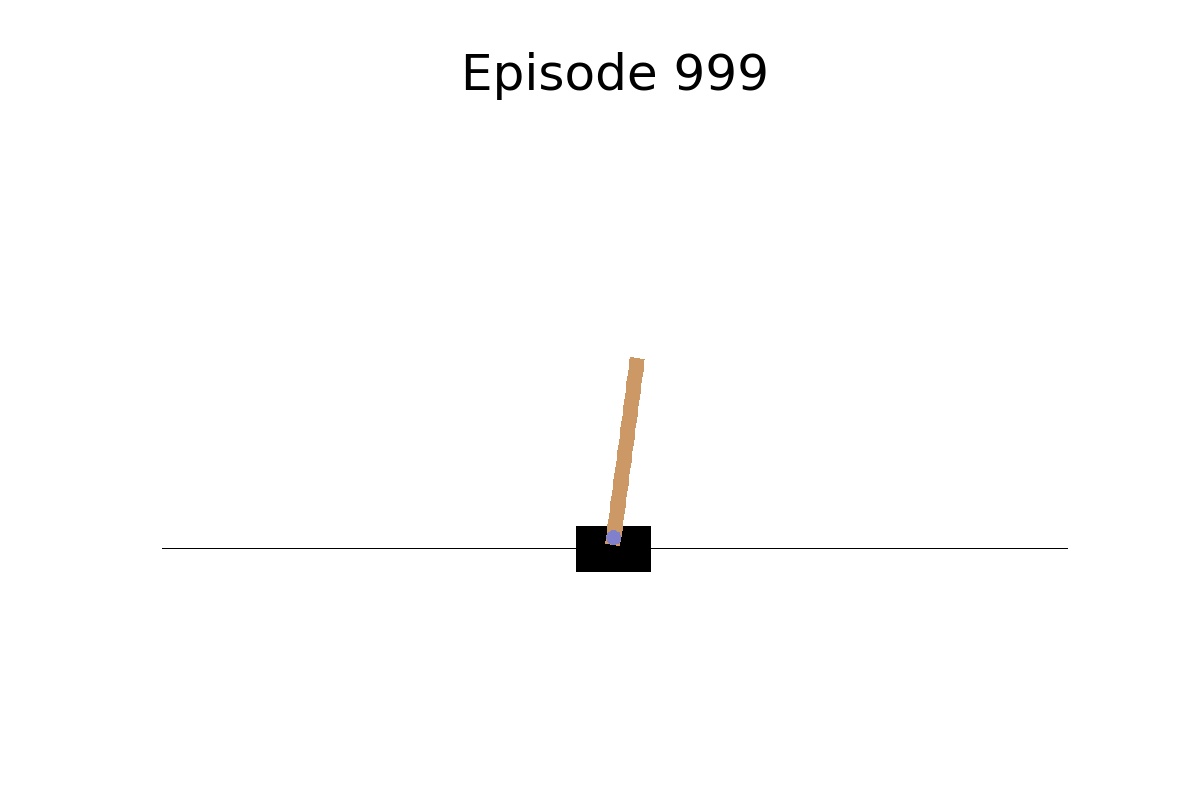
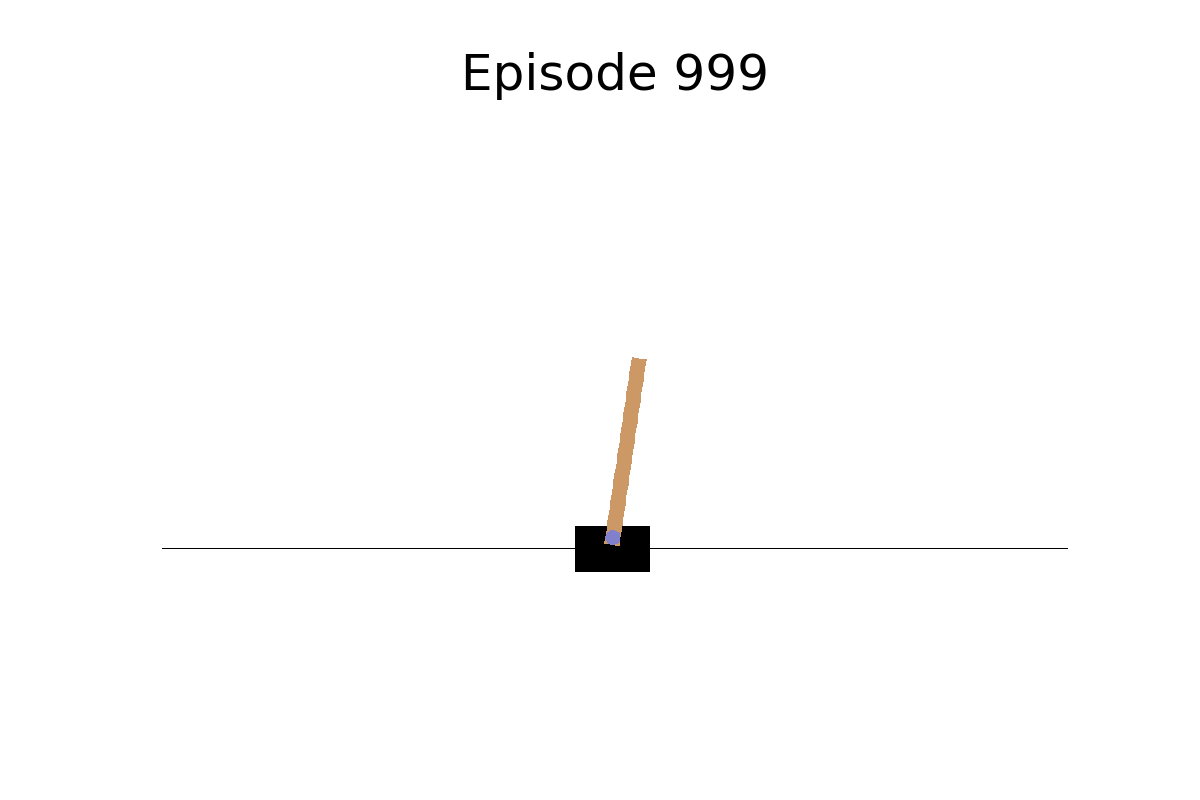
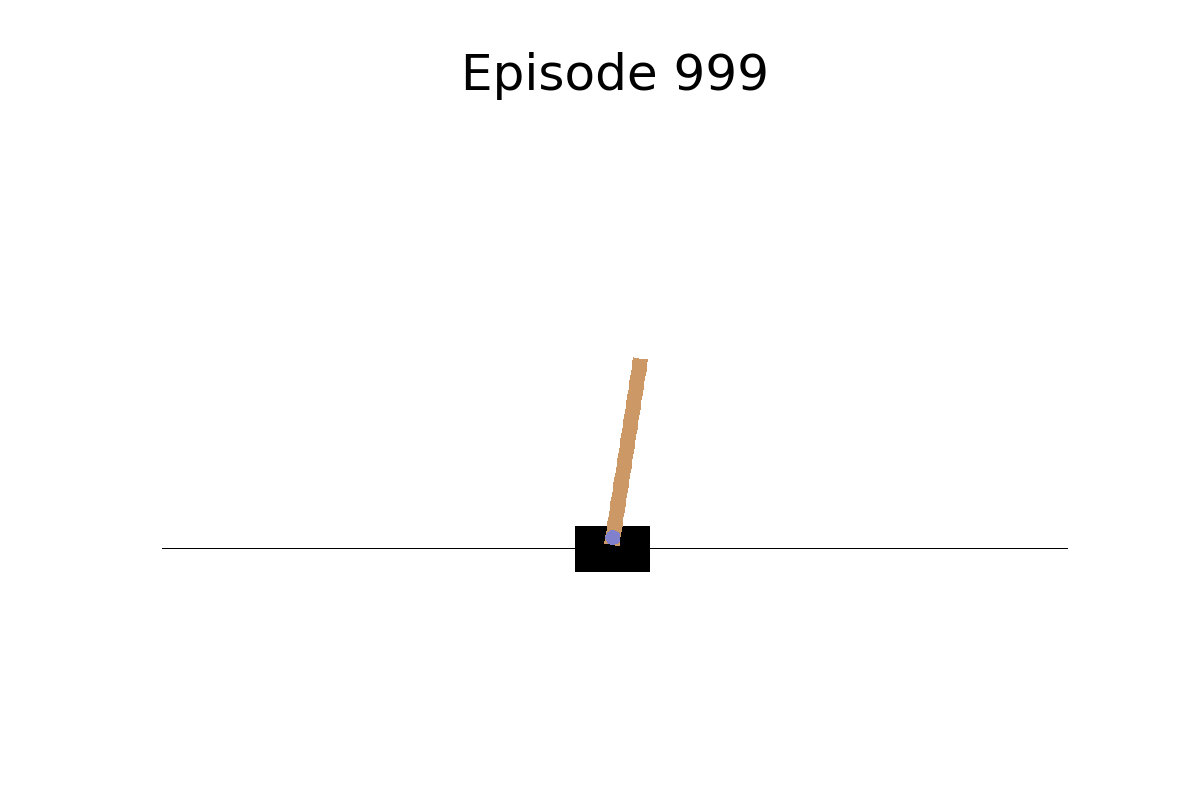
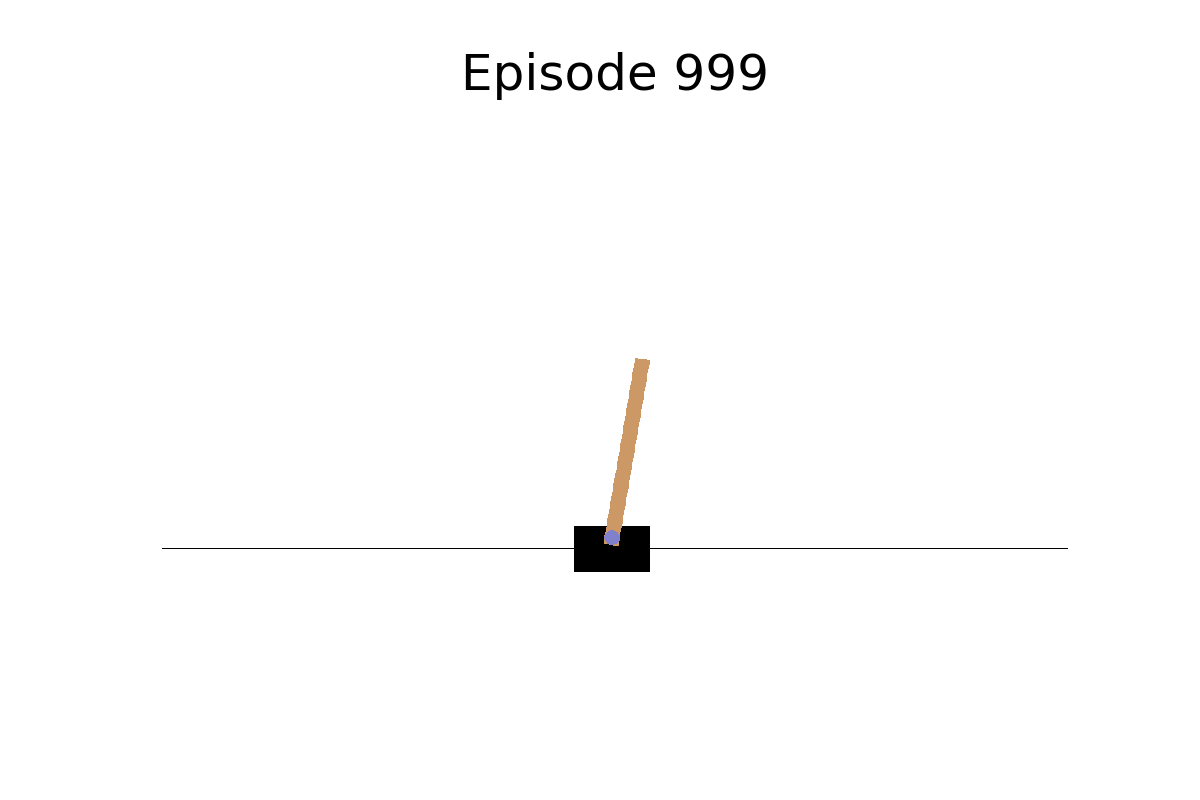
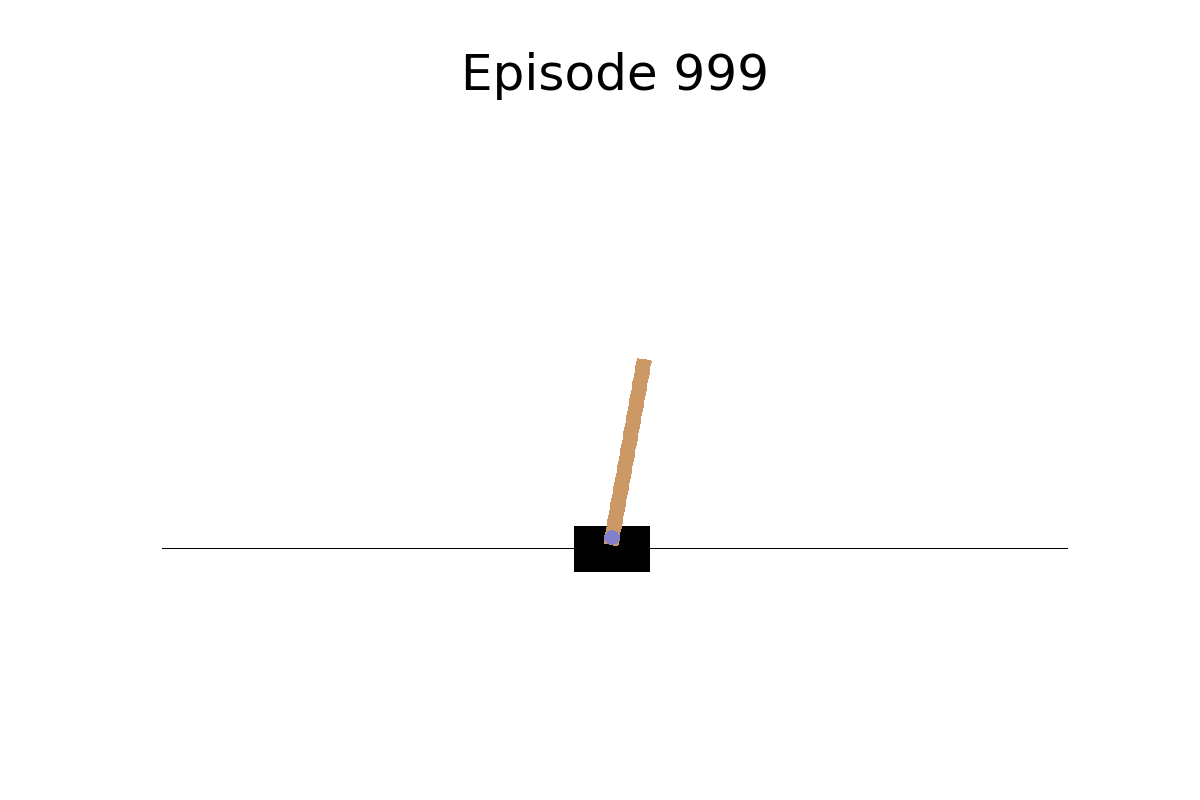
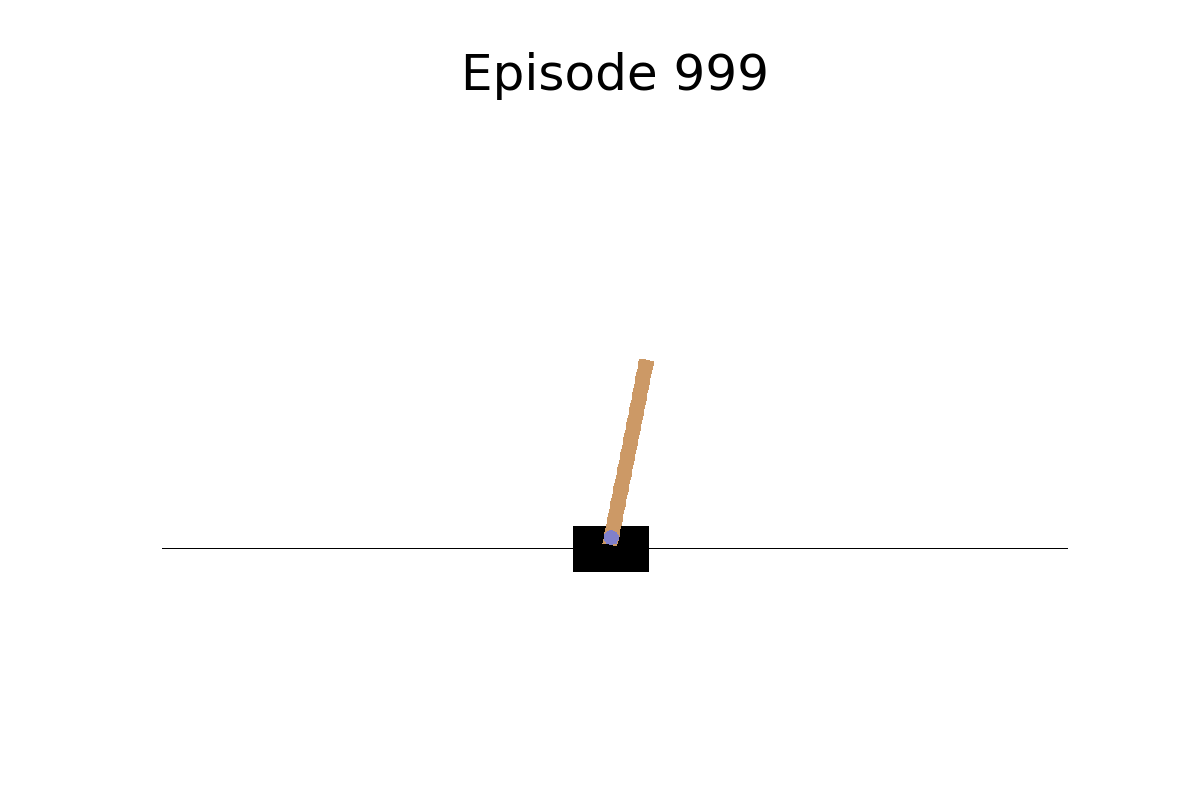
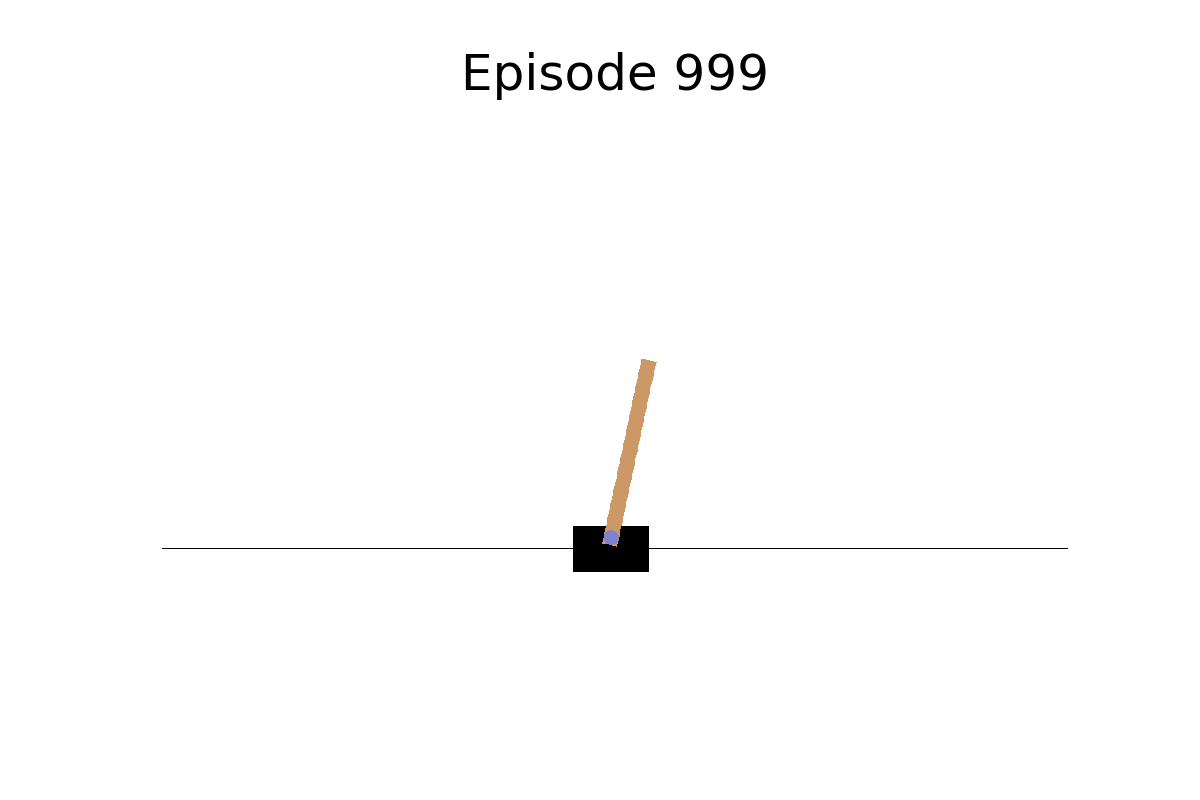

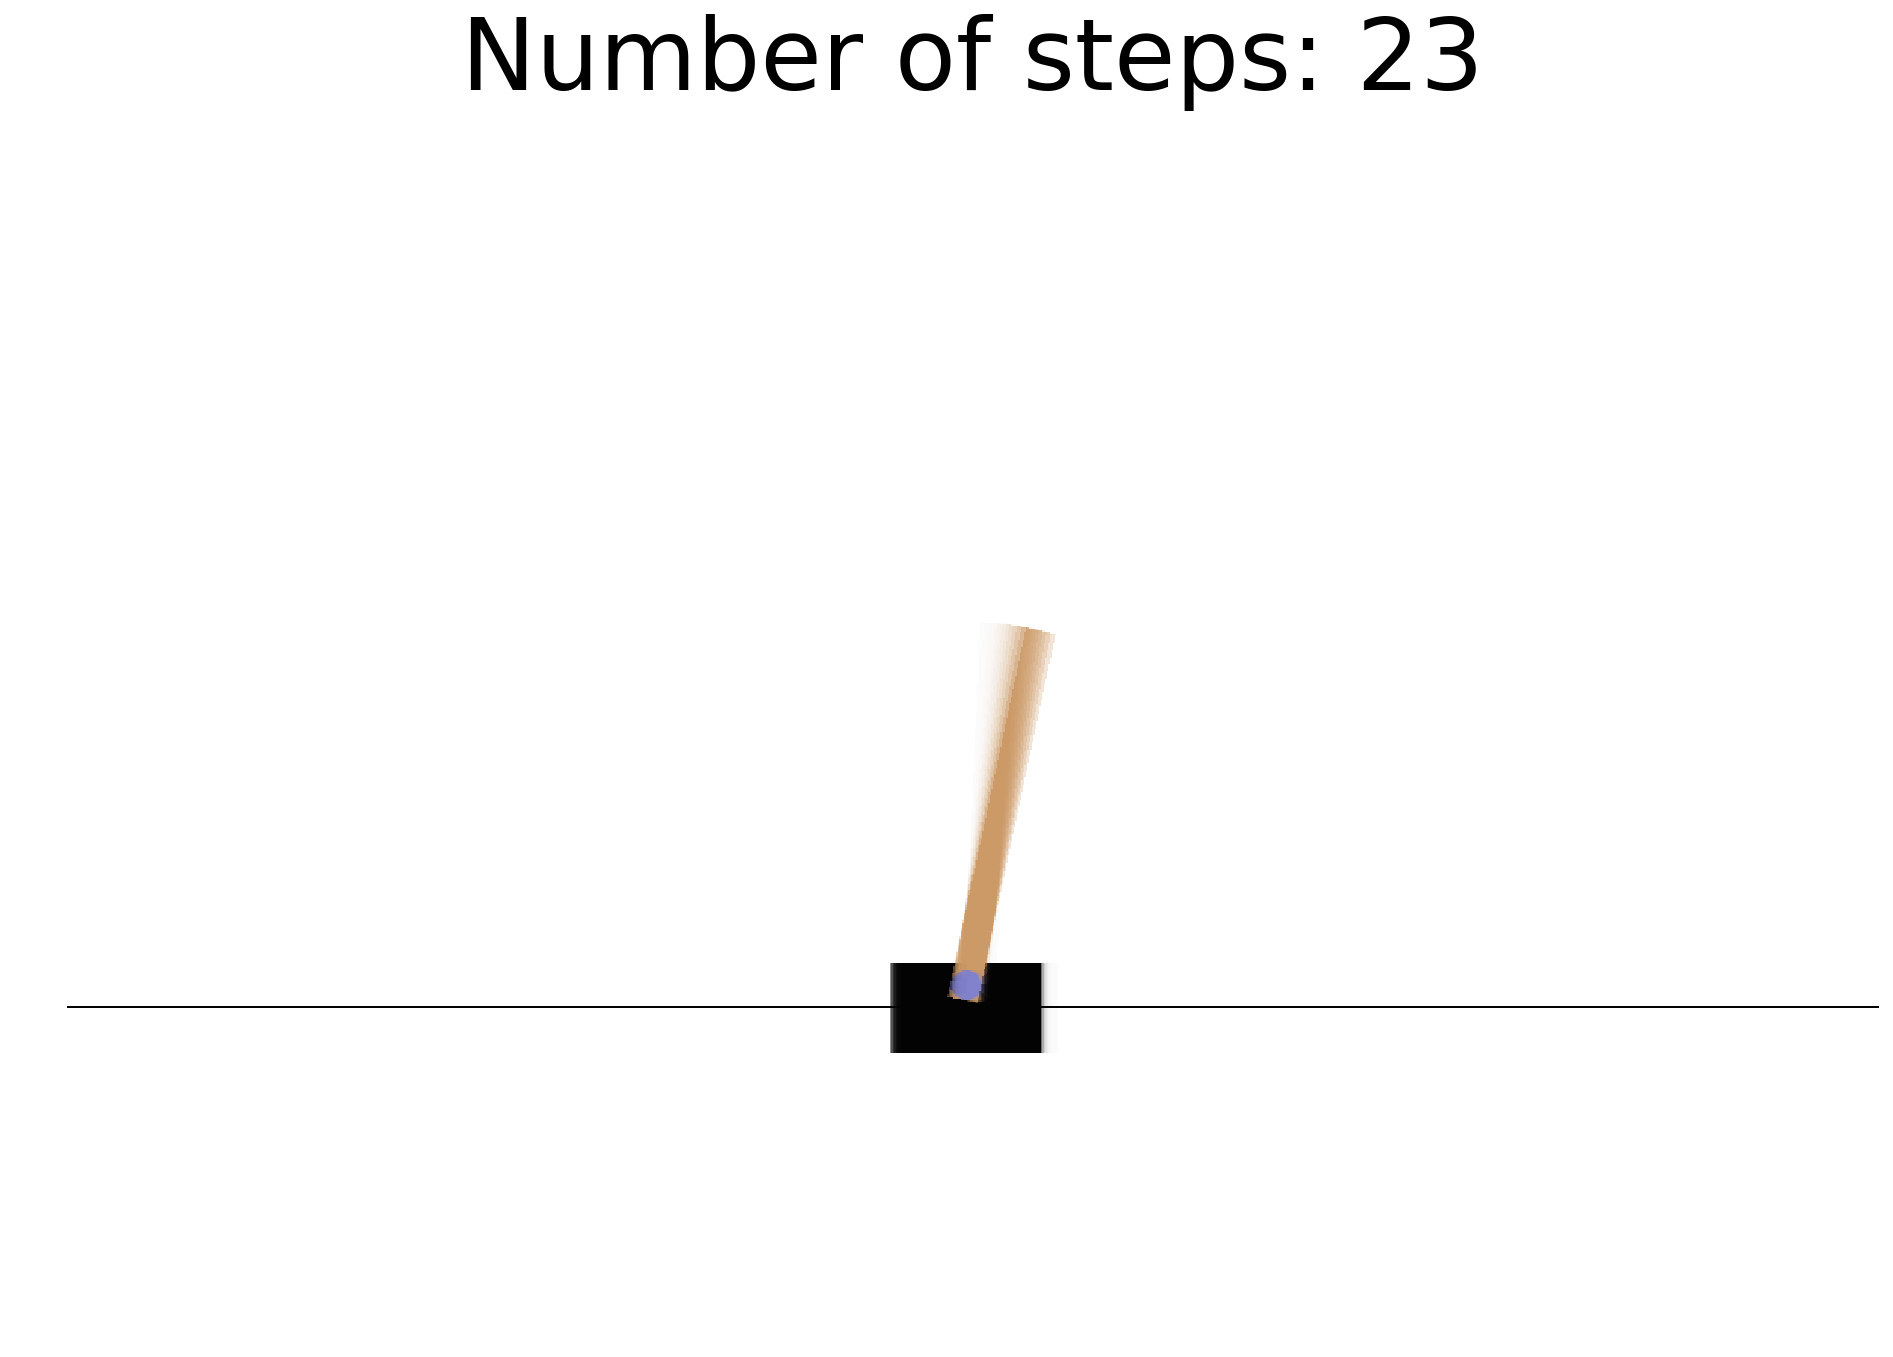

In [4]:
#Modified this code from https://nbviewer.jupyter.org/github/patrickmineault/
#xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb




%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

from time import time
import gym
import math
%config InlineBackend.figure_format = 'retina'

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
Tensor = torch.Tensor

env = gym.make('CartPole-v0')

###### PARAMS ######
learning_rate = 0.02
num_episodes = 1000
gamma = 0.85

egreedy = 0.9
egreedy_final = 0.01
egreedy_decay = num_episodes
report_interval = 10

score_to_solve = 195
solved = 0
####################

inputs = env.observation_space.shape[0]
outputs = env.action_space.n

def gif_maker(frames, title = ""):
    plt.figure(figsize=(frames[0].shape[1] / 72.0,
               frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    plt.title(title, fontdict={'fontsize': 50, 'fontweight': 'medium'})
    

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(),
                                   animate, 
                                   frames = len(frames),
                                   interval=50)
                                   
    display(display_animation(anim, default_mode='loop'))

def display_frames(episode):
    plt.figure(figsize=(shadow_run[episode]["shots"][0].shape[1] / 72.0,
                        shadow_run[episode]["shots"][0].shape[0] / 72.0))
    
    for i in shadow_run[episode]["shots"]:
        plt.imshow(i, alpha = .25)
    plt.axis('off');
    plt.title("Number of steps: {}".format(shadow_run[episode]["steps"]),
              fontdict={'fontsize': 50, 'fontweight': 'medium'});

# Torch Template
def calculate_epsilon(steps_done):
    epsilon = egreedy_final + (egreedy - egreedy_final) * \
              math.exp(-1. * steps_done / egreedy_decay )
    return epsilon

#Code Borrowed heavily from Atamai Udemy Course
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(inputs,outputs)
        
    def forward(self, x):
        output = self.linear1(x)
        return output
    
class QNet_Agent(object):
    def __init__(self):
        self.nn = NeuralNetwork().to(device)

        self.loss_func = nn.MSELoss()
        #self.loss_func = nn.SmoothL1Loss()
        
        self.optimizer = optim.Adam(params=self.nn.parameters(), lr=learning_rate)
        #self.optimizer = optim.RMSprop(params=mynn.parameters(), lr=learning_rate)
        
    def select_action(self,state,epsilon):
        
        random_for_egreedy = torch.rand(1)[0]
        
        if random_for_egreedy > epsilon:      
            
            with torch.no_grad():
                
                state = Tensor(state).to(device)
                action_from_nn = self.nn(state)
                action = torch.max(action_from_nn,0)[1]
                action = action.item()        
        else:
            action = env.action_space.sample()
        
        return action
    
    def optimize(self, state, action, new_state, reward, done):
        
        state = Tensor(state).to(device)
        new_state = Tensor(new_state).to(device)
        
        reward = Tensor([reward]).to(device)
        
        if done:
            target_value = reward
        else:
            new_state_values = self.nn(new_state).detach()
            max_new_state_values = torch.max(new_state_values)
            target_value = reward + gamma * max_new_state_values
        
        predicted_value = self.nn(state)[action]
        
        loss = self.loss_func(predicted_value, target_value)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
qnet_agent = QNet_Agent()

steps_total = []
frames_total = 0 
shadow_run = {}
start_time = time()


for episode in range(num_episodes):
    # Episode Initializations
    state = env.reset()
    shadow_run[episode] = {}
    actions, states, shots = [], [], []
    step = 0

    while True:
        step += 1
        frames_total += 1
        
        epsilon = calculate_epsilon(frames_total)
        
        #action = env.action_space.sample()
        action = qnet_agent.select_action(state, epsilon)
        
        new_state, reward, done, info = env.step(action)
        rendered = env.render(mode = 'rgb_array')
        
        # Agent Optimize
        qnet_agent.optimize(state, action, new_state, reward, done)

        # Store states for step
        actions.append(action)
        states.append(new_state)
        shots.append(rendered)
                  
        if done:
            steps_total.append(step)
            shadow_run[episode]["actions"] = actions
            shadow_run[episode]["states"] = states
            shadow_run[episode]["shots"] = shots
            shadow_run[episode]["steps"] = step
            
            if step >= score_to_solve: solved += 1
            
            if episode % report_interval == 0 and episode != 0:
                print("""\t\t\t *** Episode {} at Total Seconds {:2f}***
                         Average Reward for last {} steps: {:2f}
                         Average Reward for all steps: {:2f}
                         Epsilon: {}, Frames Total :{}
                         Solved {} Times
                      """.format(episode,
                           (time() - start_time),
                           str(report_interval),
                           sum(steps_total[-report_interval:])/report_interval,
                           sum(steps_total)/len(steps_total),
                           epsilon,
                           frames_total,
                           solved))
                    
            break
        
        state = new_state

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(steps_total)), 
        steps_total, 
        alpha=0.6, 
        color='green',
        width= 1)
plt.show()

env.close()
env.env.close()

gif_maker(shadow_run[num_episodes - 1]["shots"], "Episode {}".format(num_episodes - 1))
display_frames(num_episodes-1)

In [3]:
step

20